In [284]:
%matplotlib inline
import re
import os
import sys
#for plotting
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import random as r

import matplotlib.ticker as ticker  

In [1317]:
#Global plot parameters
sfont = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **sfont)

g_marker_size=12
g_label_size=16

colors = ['#CCCCCC','#fc8d59','#fee08b','#e6f598','#99d594','#d53e4f', '#3288bd','#b15928','#ffff99']

ls = [{'markersize':22,'marker':'s','linestyle':'-','color':'red','makeredgecolor':'red','makerfacecolor':'None','markersize':g_marker_size},
      {'marker':'^','linestyle':'-','color':'#a6cee3'},
      {'marker':'x','linestyle':'-','color':'#1f78b4'},
      {'marker':'o','linestyle':'-','color':'#b2df8a'},
      {'marker':'D','linestyle':'-','color':'#33a02c'},
      {'marker':'2','linestyle':'-','color':'#fb9a99'},
      {'marker':'<','linestyle':'--','color':'#e31a1c'},
      {'marker':'^','linestyle':'--','color':'#fdbf6f'},
      {'marker':'.','linestyle':'--','color':'#ff7f00'},
      {'marker':'s','linestyle':'--','color':'#cab2d6'},
      {'marker':'*','linestyle':'--','color':'#6a3d9a'},
      {'marker':'*','linestyle':'-','color':'#b15928'},
      {'marker':'|','linestyle':'--','color':'#ffff99'},
      {'marker':'s','linestyle':'--','color':'red'},
      {'marker':'o','linestyle':'-','color':'#1f78b4','makeredgecolor':'#1f78b4','makerfacecolor':'None','markersize':g_marker_size}
     ]

# ls = ['b^-', 'gx-', 'yo-', 'cD-', 'm2-', 'rs-', 'g<--', 'r^--', 'g^--', 'c^-', 'm^-', 'y^--' ]
ls_dict = {'HSTORE':ls[14],'OCC':ls[8],'SILO':ls[7],'QUECC':ls[0],'NOWAIT':ls[2],
           'TIMESTAMP':ls[4],'WAITDIE':ls[1],'MVCC':ls[9],'QUECC-50':ls[3],
           'QUECC-25':ls[10], 
           'QUECC-100':ls[0],
           'QUECC-10K':ls[3],
           'QUECC-80K':ls[0],
           'QUECC-160K':ls[7],
           'FOEDUS-MOCC':ls[10],
           'FOEDUS-MOCC-REF':ls[10],
           'MICA':ls[8],
           'CICADA':ls[8],
           'TICTOC':ls[4],
           'NO_WAIT':ls[2],
           'WAIT_DIE':ls[1],
           'ERMIA-SI_SSN-REF':ls[3],
           'ERMIA-SI_SSN':ls[3],
           'CALVIN':ls[10],
           'CALVIN-200':ls[7],
           'QUECC-D':ls[0],
           'SPT':{'marker':'s','linestyle':'-','color':'#e31a1c'},
           'MPT':{'marker':'o','linestyle':'-','color':'#ffcc00'},
           'LADS':ls[14]
          }

def fix_lgd_label(label):
    if label == 'FOEDUS-MOCC-REF':
        return 'FOEDUS-MOCC';
    if label == 'ERMIA-SI_SSN-REF':
        return 'ERMIA-SI_SSN'
    if label == 'MICA':
        return 'CICADA'
    if label == 'QUECC':
        return 'Q-Store'
    if label == 'QUECC-10K':
        return 'Q-Store-10K'
    if label == 'QUECC-80K':
        return 'Q-Store-80K'
    if label == 'QUECC-160K':
        return 'Q-Store-160K'
    return label

ls_dict_lat = {'PT25-Lat99\'tile':{'marker':'^','linestyle':'--','color':'#a6cee3'}, 
               'PT25-AVG-Lat':{'marker':'^','linestyle':'-.','color':'#1f78b4'},
               'PT25-tput':{'marker':'^','linestyle':'-','color':'#b2df8a'},
               'PT50-Lat99\'tile':{'marker':'o','linestyle':'--','color':'#b15928'},
               'PT50-AVG-Lat':{'marker':'o','linestyle':'-.','color':'#fb9a99'},
               'PT50-tput':{'marker':'o','linestyle':'-','color':'#ff7f00'},
               'PT75-Lat99\'tile':{'marker':'x','linestyle':'--','color':'#fdbf6f'}, 
               'PT75-AVG-Lat':{'marker':'x','linestyle':'-.','color':'#ffff99'},
               'PT75-tput':{'marker':'x','linestyle':'-','color':'#cab2d6'}, 
               'PT100-Lat99\'tile':{'marker':'s','linestyle':'--','color':'#33a02c'}, 
               'PT100-AVG-Lat':{'marker':'s','linestyle':'-.','color':'#e31a1c'},
               'PT100-tput':{'marker':'s','linestyle':'-','color':'red'},
               'QUECC-25-Lat99\'tile':{'marker':'^','linestyle':'--','color':'#a6cee3'}, 
               'QUECC-25-AVG-Lat':{'marker':'^','linestyle':'-.','color':'#1f78b4'},
               'QUECC-25':{'marker':'^','linestyle':'-','color':'#b2df8a'},
               'QUECC-50-Lat99\'tile':{'marker':'o','linestyle':'--','color':'#b15928'},
               'QUECC-50-AVG-Lat':{'marker':'o','linestyle':'-.','color':'#fb9a99'},
               'QUECC-50':{'marker':'o','linestyle':'-','color':'#ff7f00'},
               'QUECC-75-Lat99\'tile':{'marker':'x','linestyle':'--','color':'#fdbf6f'}, 
               'QUECC-75-AVG-Lat':{'marker':'x','linestyle':'-.','color':'#ffff99'},
               'QUECC-75':{'marker':'x','linestyle':'-','color':'#cab2d6'}, 
               'SPT-Lat99\'tile':{'marker':'s','linestyle':'--','color':'#33a02c'}, 
               'SPT-AVG-Lat':{'marker':'s','linestyle':'-.','color':'#e31a1c'},
               'MPT-Lat99\'tile':{'marker':'x','linestyle':'-.','color':'#ffff99'}, 
               'MPT-AVG-Lat':{'marker':'o','linestyle':'-.','color':'#ffcc00'},
               'SPT':{'marker':'s','linestyle':'-','color':'#e31a1c'},
               'MPT':{'marker':'o','linestyle':'-','color':'#ffcc00'},
#                'QUECC':{'marker':'s','linestyle':'-','color':'red'},
               'QUECC':ls[0],'NOWAIT':ls[2],
               'TIMESTAMP':ls[4],'WAITDIE':ls[1],'MVCC':ls[9],'QUECC-50':ls[3],
               'NO_WAIT':ls[2],
               'WAIT_DIE':ls[1],
               'CALVIN':ls[10],
               'CALVIN-200':ls[7],
               'QUECC-':ls[0],
               
          }

In [543]:
# Function defs
def extract_from_file(_fname):
    res = {}
    with open(_fname,'r') as of:
        res['has_data_fixed_mode'] = False
        res['has_data_normal_mode'] = False
        for line in of:
            
            cline = line.strip()
            #extract thread_cnt
            m = re.search('g_thread_cnt\s+(\d+)', cline)
            if m:
                res['g_thread_cnt'] = m.group(1)
            #extraxct zipf_theta
            m = re.search('g_zipf_theta\s+(\d+\.\d+)', cline)
            if m:
                res['g_zipf_theta'] = m.group(1)      
                
            m = re.search('g_req_per_query\s+(\d+)', cline)
            if m:
                res['g_req_per_query'] = m.group(1)    

            m = re.search('g_txn_write_perc\s+(\d+.\d+)', cline)
            if m:
                res['g_txn_write_perc'] = m.group(1)    

            m = re.search('g_mpr\s+(\d+.\d+)', cline)
            if m:
                res['g_mpr'] = m.group(1)    
                
            m = re.search('g_max_txn_per_part\s+(\d+)', cline)
            if m:
                res['g_max_txn_per_part'] = m.group(1)    
                
            m = re.search('g_part_cnt\s+(\d+)', cline)
            if m:
                res['g_part_cnt'] = m.group(1)    
                

            #extract from Pass
            m = re.search('PASS!,(.+)', cline)
#             SimTime=26.737377,total_time=26.737377,pt_time=13.400466,et_time=13.336911,
#             total_tput=625030.625000,pt_tput=1247096.875000,et_tput=1253039.750000, 
#             txn_cnt=16711680
            if m:        
#                 print(m.group(1))
                res['has_data_fixed_mode'] = True
                sline = m.group(1).split(',')
                for a in sline:
                    asline = a.strip().split('=')
#                     if asline[0] == 'SimTime':                        
#                         print(asline[1])
                    if asline[0] == 'total_time':
#                         print('====='+asline[0]+'='+asline[1])
                        res['total_time'] = asline[1];
                    if asline[0] == 'pt_time':
                        res[asline[0]] = asline[1];
                    if asline[0] == 'et_time':
                        res[asline[0]] = asline[1];
                    if asline[0] == 'total_tput':
                        res[asline[0]] = asline[1];
                    if asline[0] == 'pt_tput':
                        res[asline[0]] = asline[1];
                    if asline[0] == 'et_tput':
                        res[asline[0]] = asline[1];
                    if asline[0] == 'txn_cnt':
                        res[asline[0]] = asline[1];
            
            #extract from summary
            m = re.search('(\[summary\]) (.+)', cline)
            if m:
                res['has_data_normal_mode'] = True
                sline = m.group(2).split(',')
                for i, a in enumerate(sline):
#                     print(i,a)
                    asline = a.split('=')
                    if asline[0] == 'total_runtime':
                        res[asline[0]] = asline[1]
                    if asline[0] == 'tput':
                        res[asline[0]] = asline[1]
                    if asline[0] == 'virt_mem_usage':
                        res[asline[0]] = asline[1]
                    if asline[0] == 'phys_mem_usage':
                        res[asline[0]] = asline[1]
                    if asline[0] == 'local_txn_start_cnt':
                        res[asline[0]] = asline[1]
                    if asline[0] == 'local_txn_abort_cnt':
                        res[asline[0]] = asline[1]
                    if asline[0] == 'total_txn_abort_cnt':
                        res[asline[0]] = asline[1]
                    if asline[0] == 'local_txn_commit_cnt':
                        res[asline[0]] = asline[1]
                    if asline[0] == 'unique_txn_abort_cnt':
                        res[asline[0]] = asline[1]
                    if asline[0] == 'fscl_avg':
                        res[asline[0]] = asline[1]                         
                    ms= re.search('fscl\d+', asline[0])
                    if ms:
                        res[asline[0]] = asline[1]  
                        
#                         print(a)
#                 print(sline[0])
#                 print(sline[1])
#                 print(sline[2])
#     print(res)
    if not res['has_data_fixed_mode']:
        res['total_time'] = '0.0';
        res['pt_time'] = '0.0';
        res['et_time'] = '0.0';
        res['total_tput'] = '0.0';
        res['pt_tput'] = '0.0';
        res['et_tput'] = '0.0';
        res['txn_cnt'] = '0';        
    if not res['has_data_normal_mode']:
        res['total_runtime'] = '0.0';
        res['tput'] = '0';
        res['virt_mem_usage'] = '0';
        res['phys_mem_usage'] = '0';
        
        
    return res;


def parse_directory(directory):
    resFiles = os.listdir(directory)
    data = {
            'cc_alg':[],
            'vm':[],
            'worker_cnt':[],
            'tput':[],
            'pa_cnt':[],
            'pa_strict':[],
            'total_tput':[],
            'commit_strategy':[],
            'batch_size':[],
            'req_cnt':[],
            'mpr':[],
            'total_txn_cnt':[],
            'txn_per_part':[],
            'part_cnt':[],
            'rec_size':[],
            'write_perc':[],
            'pay_perc':[],
            'pt_perc':[],
            'pt_cnt':[],
            'pt_time':[],
            'pt_tput':[],
            'et_cnt':[],
            'et_tput':[],
            'et_time':[],
            'total_runtime':[],
            'total_time':[],
            'trial_no':[],
            'total_txn_abort_cnt':[],
            'local_txn_commit_cnt':[],
            'local_txn_abort_cnt':[],
            'local_txn_start_cnt':[],
            'unique_txn_abort_cnt':[],
            'seq_no':[],            
            'virt_mem_usage':[],
            'phys_mem_usage':[],
            'fscl10':[],
            'fscl25':[],
            'fscl50':[],
            'fscl75':[],
            'fscl90':[],
            'fscl95':[],
            'fscl99':[],
            'fscl100':[],
            'fscl_avg':[],
            'zipf_theta':[]
           }
    # dfcols = ['cc_alg', 'w_cnt', 'tput', 'trial_no', 'seq_no', 'zipf_theta']
    for fname in resFiles:
    #     m = re.search("(pt6_)?([A-Za-z]+)_(c|s)_t(\d+)_(\d+)(_(\d+))?.txt",fname)
#         regex = "pa?(\d+)_?([A-Za-z]+)_pt(\d+)_et(\d+)_(\d+)_([A-Za-z]+)_(c|s)_t(\d+)_(\d+)(_(\d+))?.txt"
#         regex = "(pa(\d+)_)?([A-Za-z]+)_pt(\d+)_et(\d+)_(\d+)_?(pptstrict|pptnonstrict)_([A-Za-z]+)_(c|s)_t(\d+)_(\d+)(_(\d+))?.txt"
#         regex = "(pa?(\d+)_)?([A-Za-z]+|\d+)_pt(\d+)_et(\d+)_(\d+)_?(pptstrict|pptnonstrict)?_([A-Za-z]+)_(c|s)_t(\d+)_(\d+)(_(\d+))?.txt"
        regex = "(pa(\d+)_)([A-Za-z]+|\d+)_pt(\d+)_et(\d+)_(\d+)_?(pptstrict|pptnonstrict)?_([A-Za-z]+)_(c|s)_t(\d+)_(\d+)(_(\d+))?.txt"
        rsize_re = "(\d+)Brec_.+"
        rsize_m = re.search(rsize_re,fname)
        payp_re = "payp(\d+)_.+"
        payp_m = re.search(payp_re,fname)
        m = re.search(regex,fname)
        wthd_cnt = 0
        extracted_data = {}
        cc_alg = ''
        trial_num = 0
        seq_num = 0
        theta = 0.0
        pt_prec = 0
        pa_cnt = 0
        pa_s = False
#         print(fname)
        if m:
            try:
#                 print(fname)
                pa_cnt = int(m.group(2)) if m.group(2) else 0
                comm_strat = m.group(3)
                pt_cnt = int(m.group(4))
                et_cnt = int(m.group(5))
                pt_perc = int(m.group(6))
                if m.group(7) == 'pptstrict':
                    pa_s = True
                cc_alg = m.group(8)
                trial_num = m.group(10)
                seq_num = m.group(11)  
                core_cnt = int(m.group(13))
                e_data = extract_from_file(directory+'/'+fname)
                w_thd = int(e_data['g_thread_cnt'])
                if rsize_m:
                    rec_size = int(rsize_m.group(1))
                else: 
                    rec_size = 0
                data['rec_size'].append(rec_size)
                
                if payp_m:
                    payp = float(int(payp_m.group(1))/100)
                else:
                    payp = 0.0
                data['pay_perc'].append(payp)
                
        #         nodemal mode
                if (comm_strat == 'NOCOMSTRAT'):        
                    if (cc_alg == 'QUECC' and q_pipelined):
                        data['worker_cnt'].append(int(e_data['g_thread_cnt'])*2)
                    else:
                        data['worker_cnt'].append(int(e_data['g_thread_cnt']))

                if (cc_alg == 'QUECC' and q_pipelined):
                    data['worker_cnt'].append(pt_cnt+et_cnt)
                else:
                    data['worker_cnt'].append(int(e_data['g_thread_cnt']))


                #fixed-mode

        #         if (pt_perc == 100):
        #             data['worker_cnt'].append(pt_cnt)
        #         else:
        #             data['worker_cnt'].append(pt_cnt+et_cnt)
        #         data['worker_cnt'].append(int(e_data['g_thread_cnt']))
                data['cc_alg'].append(cc_alg)
                data['vm'].append(core_cnt)
                data['commit_strategy'].append(comm_strat)  
                try:
                    data['batch_size'].append(int(comm_strat))
                except ValueError:
                    data['batch_size'].append(0)
                        

                if (e_data['has_data_fixed_mode']):
                    data['total_time'].append(float(e_data['total_time']))
                    data['total_tput'].append(float(e_data['total_tput']))
                    data['total_runtime'].append(float(0))
                    data['tput'].append(float(0))
                else:
                    data['total_runtime'].append(float(e_data['total_runtime']))
                    data['tput'].append(float(e_data['tput']))
                    data['total_time'].append(float(0))
                    data['total_tput'].append(float(0))            

                data['virt_mem_usage'].append(int(e_data['virt_mem_usage']))
                data['phys_mem_usage'].append(int(e_data['virt_mem_usage']))
                data['pa_cnt'].append(int(pa_cnt))
                data['pa_strict'].append(pa_s)
                data['pt_perc'].append(pt_perc)
                data['pt_cnt'].append(pt_cnt)
                data['pt_time'].append(float(e_data['pt_time']))
                data['pt_tput'].append(float(e_data['pt_tput']))
                data['et_cnt'].append(et_cnt)
                data['et_time'].append(float(e_data['et_time']))
                data['et_tput'].append(float(e_data['et_tput']))
                data['trial_no'].append(int(trial_num))
                pcnt = int(e_data['g_part_cnt']);
                tpp = int(e_data['g_max_txn_per_part'])
                data['total_txn_cnt'].append(pcnt*tpp)
                data['part_cnt'].append(pcnt)
                data['txn_per_part'].append(tpp)
                data['seq_no'].append(int(seq_num))
                data['req_cnt'].append(int(e_data['g_req_per_query']))
                data['mpr'].append(float(e_data['g_mpr']))
#                 data['write_perc'].append(float(e_data['g_txn_write_perc']))
                data['write_perc'].append((e_data['g_txn_write_perc']))
                data['zipf_theta'].append('{:.2f}'.format(float(e_data['g_zipf_theta'])))
                data['local_txn_start_cnt'].append(int(e_data['local_txn_start_cnt']))
                data['local_txn_abort_cnt'].append(int(e_data['local_txn_abort_cnt']))
                data['total_txn_abort_cnt'].append(int(e_data['total_txn_abort_cnt']))
                data['local_txn_commit_cnt'].append(int(e_data['local_txn_commit_cnt']))
                data['unique_txn_abort_cnt'].append(int(e_data['unique_txn_abort_cnt']))
                data['fscl10'].append(float(e_data['fscl10']))  
                data['fscl25'].append(float(e_data['fscl25']))  
                data['fscl50'].append(float(e_data['fscl50']))  
                data['fscl75'].append(float(e_data['fscl75']))  
                data['fscl90'].append(float(e_data['fscl90']))  
                data['fscl95'].append(float(e_data['fscl95']))  
                data['fscl99'].append(float(e_data['fscl99']))  
                data['fscl100'].append(float(e_data['fscl100']))  
                data['fscl_avg'].append(float(e_data['fscl_avg'])) 
                
            except KeyError:
                print(fname)
    return data

def extract_from_file_cicada(_fname):
    res = {}    
    etput = 0.0
    eruntime = 0.0
    abort_cnt = 0
    avg_lat = '0'
    _95th_lat = '0'
    
    with open(_fname,'r') as of:        
        for line in of:            
            cline = line.strip()
            if (_fname.find('FOEDUS') == -1 and _fname.find('ERMIA') == -1):
                #dbx1000
                #extract thread_cnt
#                 m = re.search('g_batch_size\s+(\d+)', cline)
#                 if m:
#                     res['batch_size'] = m.group(1)
#                 else: 
#                     res['batch_size'] = '10368' # default batch_size
                    
                #extract from summary
                m = re.search('(\[summary\]) (.+)', cline)
                if m:
                    sline = m.group(2).split(',')
                    for i, a in enumerate(sline):
#                         print(i,a)
                        asline = a.split('=')
                        if asline[0].strip() == 'tput':
                            res[asline[0].strip()] = (float(asline[1].strip())/1000000)
                        else:
                            res[asline[0].strip()] = asline[1].strip()
                ml = re.search('inter-commit latency plan \(us\):\s+min=(\d+),\s+max=(\d+),\s+avg=(\d+);\s+50\-th=(\d+),\s+95\-th=(\d+),\s+99\-th=(\d+),\s+99\.9-th=(\d+)',cline)
                if ml:
                    avg_lat = ml.group(3)
                    _95th_lat = ml.group(5)
                    
            elif (_fname.find('FOEDUS') != -1):
                #foedus
                m = re.search('final result:(.+)', cline)
                if m:
                    m2 = re.search('<duration_sec_>(\d+\.\d+)<\/duration_sec_>', m.group(1))
                    if m2:
                        res['run_time'] = m2.group(1)
                    else:
                        res['run_time'] = '0.0'
                        
                    m2 = re.search('<MTPS>(\d+\.\d+)<\/MTPS>', m.group(1))
                    if m2:
                        res['tput'] = m2.group(1)
                    else:
                        res['tput'] = '0.0'
                        
                        # FOEDUS tracks multiple types of aborts, need to aggregate them all
#                     <race_aborts_>19292</race_aborts_>
#                     <lock_aborts_>0</lock_aborts_>
#                     <largereadset_aborts_>0</largereadset_aborts_>
#                     <insert_conflict_aborts_>0</insert_conflict_aborts_>
                    m2 = re.search('<race_aborts_>(\d+)<\/race_aborts_>', m.group(1))
                    if m2:
                        abort_cnt = abort_cnt + int(m2.group(1))
                
                    m2 = re.search('<lock_aborts_>(\d+)<\/lock_aborts_>', m.group(1))
                    if m2:
                        abort_cnt = abort_cnt + int(m2.group(1))
                        
                    m2 = re.search('<largereadset_aborts_>(\d+)<\/largereadset_aborts_>', m.group(1))
                    if m2:
                        abort_cnt = abort_cnt + int(m2.group(1))
                        
                    m2 = re.search('<insert_conflict_aborts_>(\d+)<\/insert_conflict_aborts_>', m.group(1))
                    if m2:
                        abort_cnt = abort_cnt + int(m2.group(1))
                    # txn_cnt == processed
                    m2 = re.search('<processed_>(\d+)<\/processed_>', m.group(1))
                    if m2:
                        res['txn_cnt'] = m2.group(1)
                    else:
                        res['txn_cnt'] = '0'
                        
                    res['batch_size'] = '0'

            elif (_fname.find('ERMIA') != -1):
                m = re.search('agg_throughput:\s+(\d+\.\d+e\+\d+|\d+\.?\d+)\s+ops\/sec',cline)
                if m:
                    etput = float(m.group(1))
#                     print(etput)
                    
                m = re.search('runtime:\s+(\d+\.\d+)\s+sec',cline)
                if m:
                    eruntime = float(m.group(1))
                
                m = re.search('agg_abort_rate:\s+(\d+\.\d+e\+\d+|\d+\.?\d+)\s+aborts\/sec',cline)
                if m:
                    abort_cnt =  int(float(m.group(1))*eruntime)
            else:
                res['tput'] = '0.0'
                res['run_time'] = '0.0'
                res['batch_size'] = '0'
                res['txn_cnt'] = '0'
                res['abort_cnt'] = '0'
                
    if (_fname.find('FOEDUS') != -1):
        res['abort_cnt'] = '{}'.format(abort_cnt)
                
    if (_fname.find('ERMIA') != -1):
        res['tput'] = '{:.5f}'.format(etput/1000000)                        
        res['run_time'] = '{:.5f}'.format(eruntime)                        
        res['txn_cnt'] = '{}'.format(int(etput*eruntime))
        res['abort_cnt'] = '{}'.format(abort_cnt)
        res['batch_size'] = '0'
    
    
    res['avg_lat']= avg_lat
    res['95th_lat']= _95th_lat                
#         print(res)
    return res;

def parse_directory_cicada(directory):
    resFiles = os.listdir(directory)
    data = {
            'cc_alg':[],
            'workload':[],
            'worker_cnt':[],
            'vm':[],
            'txn_cnt':[],
            'abort_cnt':[],
            'tput':[],
            'batch_size':[], #how to do batch_size
            'req_cnt':[],
#             'total_txn_cnt':[], # need to find a way to compute for all systems
            'rec_size':[],
            'write_perc':[],
            'pay_perc':[],
            'run_time':[],
            'seq_no':[],     
            'avg_lat':[],
            '95th_lat':[],
            'zipf_theta':[]
           }
    # dfcols = ['cc_alg', 'w_cnt', 'tput', 'trial_no', 'seq_no', 'zipf_theta']
    for fname in resFiles:
        if (fname.find("failed") != -1): continue

        regex = "alg@([a-z_\+\-A-Z]+)__"
        m = re.search(regex,fname)
        if m:
            data['cc_alg'].append(m.group(1))
        else: raise ValueError("CC_ALG cannot be parsed")
            
        regex = "bench@([a-z_A-Z]+)__"
        m = re.search(regex,fname)
        if m:
            data['workload'].append(m.group(1))
        else: raise ValueError("worload cannot be parsed")

        regex = "read_ratio@(\d+\.\d+)__"
        m = re.search(regex,fname)
        if m:
#             data['write_perc'].append((1-float(m.group(1))))
            data['write_perc'].append('{0:.2f}'.format((1-float(m.group(1)))))
        else:
            data['write_perc'].append('0.00')
            
            
        regex = "record_size@(\d+)__"
        m = re.search(regex,fname)
        if m:
            data['rec_size'].append((int(m.group(1))))
        else:
            data['rec_size'].append(0)
       
        regex = "batch_size@(\d+)__"
        m = re.search(regex,fname)
        if m:
            data['batch_size'].append((int(m.group(1))))
        else:
            data['batch_size'].append(0)
            
        regex = "req_per_query@(\d+)__"
        m = re.search(regex,fname)
        if m:
            data['req_cnt'].append((int(m.group(1))))
        else:
            data['req_cnt'].append(0)
            
        regex = "seq@(\d+)__"
        m = re.search(regex,fname)
        if m:
            data['seq_no'].append((int(m.group(1))))
        else: raise ValueError("seq cannot be parsed")
            
            
        regex = "thread_count@(\d+)__"
        m = re.search(regex,fname)
        if m:
            data['worker_cnt'].append((int(m.group(1))))
            data['vm'].append((int(m.group(1))))
        else:
            data['worker_cnt'].append(0)
            data['vm'].append(0)
            
        regex = "zipf_theta@(\d+\.\d+)_?_?"
        m = re.search(regex,fname)
        if m:
            data['zipf_theta'].append((m.group(1)))
        else:
            data['zipf_theta'].append('0')
            
       
        extracted_data = {}
        e_data = extract_from_file_cicada(directory+'/'+fname)
#         print(e_data)
        data['run_time'].append(float(e_data['run_time']))
        data['avg_lat'].append(float(e_data['avg_lat']))
        data['95th_lat'].append(float(e_data['95th_lat']))
    
        data['tput'].append(float(e_data['tput']))
#         data['batch_size'].append(int(e_data['batch_size']))   
        data['txn_cnt'].append(int(e_data['txn_cnt']))   
        data['abort_cnt'].append(int(e_data['abort_cnt']))   
            
    return data
                
def view_planner_from_file(_fname):
    res = {}
    with open(_fname,'r') as of:
        for line in of:
            cline = line.strip()
            m = re.search('(\[summary\]) (.+)', cline)
            if m:
                sline = m.group(2).split(',')
                for i, a in enumerate(sline):
                    mq = re.search('quecc\_plan(\d+)\_(\w+)=(-?\d+\.?\d*|-?nan)', a)
                    if mq:
                        if mq.group(3) == '-nan' or mq.group(3) == 'nan':
                            v = 0.0
                        else:
                            v = float(mq.group(4))

                        row = [mq.group(1), mq.group(2), v]
                        key = mq.group(2)
                        if key in res.keys():
                            res[mq.group(2)].append(v)
                        else:
                            res[mq.group(2)] =[v]
#                         print(row)
#                         print(a)
#                 print(sline[0])
#                 print(sline[1])
#                 print(sline[2])
#     print(res)
    return res;

def plot_planner_times(df):
    # Create the general blog and the "subplots" i.e. the bars
    f, ax1 = plt.subplots(1, figsize=(16,5))

    # Set the bar width
    bar_width = 0.40

#     colors = ['#d7191c','#fdae61','#abdda4','#2b83ba']


    # positions of the left bar-boundaries
    bar_l = [i-(bar_width) for i in range(len(df['plan_idle_time']))]

    # positions of the x-axis ticks (center of the bars as bar labels)
    # tick_pos = [(i-1)+(bar_width/2) for i in bar_l]

    # Create a bar plot, in position bar_1
    
    
    ax1.bar(bar_l,
        df['wt_hl_plan_time'],
        # set the width
        width=bar_width,
        # with the label pre score
        label='Other unmeasured times',
        # with alpha 0.5
#         alpha=0.5,
        # with color
        color='#000000')

        
    ax1.bar(bar_l,
            df['plan_idle_time'],
            # set the width
            width=bar_width,
            # with the label pre score
            label='Idle time',
            # with alpha 0.5
#             alpha=0.5,
            # with color
            color=colors[0])

    # Create a bar plot, in position bar_1
    all_df = df['plan_idle_time']
    ax1.bar(bar_l,
            # using the mid_score data
            df['plan_index_lookup_time'],
            # set the width
            width=bar_width,
            # with pre_score on the bottom
            bottom=all_df,
            # with the label mid score
            label='Index lookup time',
            # with alpha 0.5
#             alpha=0.5,
            # with color
            color=colors[1])
    all_df = df['plan_idle_time']+df['plan_index_lookup_time']    
    ax1.bar(bar_l,
            # using the mid_score data
            df['plan_copy_input_time'],
            # set the width
            width=bar_width,
            # with pre_score on the bottom
            bottom=all_df,
            # with the label mid score
            label='Copy inputs time',
            # with alpha 0.5
#             alpha=0.5,
            # with color
            color=colors[5])
    
    all_df = df['plan_idle_time']+df['plan_index_lookup_time']+df['plan_copy_input_time']
    ax1.bar(bar_l,
            # using the mid_score data
            df['plan_insert_eq_time'],
            # set the width
            width=bar_width,
            # with pre_score on the bottom
            bottom=all_df,
            # with the label mid score
            label='Insert into EQ time',
            # with alpha 0.5
#             alpha=0.5,
            # with color
            color=colors[6])
    
    all_df = df['plan_idle_time']+df['plan_index_lookup_time']+df['plan_copy_input_time']+df['plan_insert_eq_time']
    ax1.bar(bar_l,
            # using the mid_score data
            df['plan_txn_ctx_time'],
            # set the width
            width=bar_width,
            # with pre_score on the bottom
            bottom=all_df,
            # with the label mid score
            label='Update Txn. Context time',
            # with alpha 0.5
#             alpha=0.5,
            # with color
            color=colors[7])
    
    # Create a bar plot, in position bar_1
    all_df = df['plan_idle_time']+df['plan_index_lookup_time']+df['plan_copy_input_time']+df['plan_insert_eq_time']+df['plan_txn_ctx_time']
    proc_details = df['plan_index_lookup_time']+df['plan_copy_input_time']+df['plan_insert_eq_time']+df['plan_txn_ctx_time']
    ax1.bar(bar_l,
            # using the post_score data
            df['plan_txn_process_time']-proc_details,
            # set the width
            width=bar_width,
            # with pre_score and mid_score on the bottom
            bottom=all_df,
            # with the label post score
            label='Txn proc. time',
            # with alpha 0.5
#             alpha=0.5,
            # with color
            color=colors[2])
    
    all_df = (df['plan_idle_time']+df['plan_txn_process_time'])
    
    ax1.bar(bar_l,
            # using the post_score data
            df['plan_batch_delivery_time'],
            # set the width
            width=bar_width,
            # with pre_score and mid_score on the bottom
            bottom=all_df,
            # with the label post score
            label='Batch delivery time',
            # with alpha 0.5
#             alpha=0.5,
            # with color
            color=colors[3])
    
    all_df = (df['plan_idle_time']+df['plan_txn_process_time']+df['plan_batch_delivery_time'])
    
    ax1.bar(bar_l,
            # using the post_score data
            df['plan_wait_time'],
            # set the width
            width=bar_width,
            # with pre_score and mid_score on the bottom
            bottom=all_df,
            # with the label post score
            label='Wait-for executor time',
            # with alpha 0.5
#             alpha=0.5,
            # with color
            color=colors[4])
    
    

    # set the x ticks with names
    plt.xticks(bar_l,['PT_'+str(i) for i in range(len(df['plan_idle_time']))], rotation=45)

    # Set the label and legends
    ax1.set_ylabel("Run Time")
    ax1.set_xlabel("Planner threads")
    plt.grid(True)
    # plt.legend(loc='best')
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=2, mode="expand", borderaxespad=0.)
## end -- def plot_planner_times(df):

def plot_executor_times(df):
    # Create the general blog and the "subplots" i.e. the bars
    f, ax1 = plt.subplots(1, figsize=(16,5))

    # Set the bar width
    bar_width = 0.40

#     colors = ['#d7191c','#fdae61','#abdda4','#2b83ba']


    # positions of the left bar-boundaries
    bar_l = [i-(bar_width) for i in range(len(df['plan_idle_time']))]

    # positions of the x-axis ticks (center of the bars as bar labels)
    # tick_pos = [(i-1)+(bar_width/2) for i in bar_l]

    # Create a bar plot, in position bar_1
    
#     'exec_batch_part_proc_time', 'exec_batch_proc_time',
#        'exec_entry_deq_time', 'exec_eq_swtich_time', 'exec_idle_time',
#        'exec_mem_free_time', 'exec_txn_commit_time', 'exec_txn_proc_time',
#        'exec_txn_wait_time',

    ax1.bar(bar_l,
        df['wt_hl_exec_time'],
        # set the width
        width=bar_width,
        # with the label pre score
        label='Other unmeasured times',
        # with alpha 0.5
#         alpha=0.5,
        # with color
        color='#000000')

        
    ax1.bar(bar_l,
            df['exec_txn_proc_time'],
            # set the width
            width=bar_width,
            # with the label pre score
            label='Txn. Proc. time',
            # with alpha 0.5
#             alpha=0.5,
            # with color
            color=colors[0])

    # Create a bar plot, in position bar_1
    all_df = df['exec_txn_proc_time']
    ax1.bar(bar_l,
            # using the mid_score data
            df['exec_txn_index_lookup_time'],
            # set the width
            width=bar_width,
            # with pre_score on the bottom
            bottom=all_df,
            # with the label mid score
            label='Index lookup time',
            # with alpha 0.5
#             alpha=0.5,
            # with color
            color=colors[1])
    
    # Create a bar plot, in position bar_1
    all_df = df['exec_txn_proc_time']+df['exec_txn_index_lookup_time']
    ax1.bar(bar_l,
            # using the post_score data
            df['wt_pg_sync_exec_time'],
            # set the width
            width=bar_width,
            # with pre_score and mid_score on the bottom
            bottom=all_df,
            # with the label post score
            label='Wait-for PG ready',
            # with alpha 0.5
#             alpha=0.5,
            # with color
            color=colors[2])
    
    all_df = (df['exec_txn_proc_time']+df['exec_txn_index_lookup_time']+df['wt_pg_sync_exec_time'])
    
    ax1.bar(bar_l,
            # using the post_score data
            df['exec_eq_swtich_time'],
            # set the width
            width=bar_width,
            # with pre_score and mid_score on the bottom
            bottom=all_df,
            # with the label post score
            label='EQ switch time',
            # with alpha 0.5
#             alpha=0.5,
            # with color
            color=colors[3])
    
    all_df = (df['exec_txn_proc_time']+df['exec_txn_index_lookup_time']+df['wt_pg_sync_exec_time']+df['exec_eq_swtich_time'])
    
    ax1.bar(bar_l,
            # using the post_score data
            df['exec_eq_range_check_time'],
            # set the width
            width=bar_width,
            # with pre_score and mid_score on the bottom
            bottom=all_df,
            # with the label post score
            label='EQ range check time',
            # with alpha 0.5
#             alpha=0.5,
            # with color
            color=colors[4])
    
    all_df = (df['exec_txn_proc_time']+df['exec_txn_index_lookup_time']+df['wt_pg_sync_exec_time']+df['exec_eq_swtich_time']
             +df['exec_eq_range_check_time'])
    
    ax1.bar(bar_l,
            # using the post_score data
            df['exec_entry_deq_time'],
            # set the width
            width=bar_width,
            # with pre_score and mid_score on the bottom
            bottom=all_df,
            # with the label post score
            label='EQ entry deq time',
            # with alpha 0.5
#             alpha=0.5,
            # with color
            color=colors[5])

    # set the x ticks with names
    plt.xticks(bar_l,['ET_'+str(i) for i in range(len(df['plan_idle_time']))], rotation=45)
    plt.grid(True)
    # Set the label and legends
    ax1.set_ylabel("Run Time")
    ax1.set_xlabel("Execution threads")
    # plt.legend(loc='best')
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=2, mode="expand", borderaxespad=0.)
## end -- def plot_executor_times(df):


In [1469]:
def extract_from_file_expodb(_fname):
    res = {}    
    etput = 0.0
    eruntime = 0.0
    abort_cnt = 0
    avg_lat = '0'
    _95th_lat = '0'
    
    node_id = -1
    worker_id = -1
    is_client = False
    m_res = []
    
    with open(_fname,'r') as of:        
        for line in of:            
            cline = line.strip()
            #dbx1000
            #extract thread_cnt
#                 m = re.search('g_batch_size\s+(\d+)', cline)
#                 if m:
#                     res['batch_size'] = m.group(1)
#                 else: 
#                     res['batch_size'] = '10368' # default batch_size
            try:
                m = re.search('g_node_id (\d+)', cline)
                if m:
                    node_id = int(m.group(1))
                    m_res.append({'node_id':node_id})
                    if not is_client:
                        m_res[node_id]['node_type'] = 'Server'
            except:
                print(_fname)
                raise ValueError("something went wrong")
                
            m = re.search('CLIENT PASS', cline)
            if m: 
                is_client = True
                m_res[node_id]['node_type'] = 'Client'
                
#             print('node_id={}'.format(node_id))    
            #extract from summary
            m = re.search('(\[summary\]) (.+)', cline)
            if m:
                sline = m.group(2).split(',')
                for i, a in enumerate(sline):
#                         print(i,a)
                    asline = a.split('=')

                    if asline[0].strip() == 'tput':
                        m_res[node_id][asline[0].strip()] = (float(asline[1].strip()))
                    elif asline[0].strip() == 'total_runtime':
                        m_res[node_id][asline[0].strip()] = (float(asline[1].strip()))
                    elif asline[0].strip() == 'txn_run_avg_time':
                        m_res[node_id][asline[0].strip()] = (float(asline[1].strip()))
                    elif asline[0].strip() == 'ccl50':
                        m_res[node_id][asline[0].strip()] = (float(asline[1].strip()))
                    elif asline[0].strip() == 'ccl95':
                        m_res[node_id][asline[0].strip()] = (float(asline[1].strip()))
                    elif asline[0].strip() == 'ccl99':
                        m_res[node_id][asline[0].strip()] = (float(asline[1].strip()))
                    elif asline[0].strip() == 'txn_cnt':
                        m_res[node_id][asline[0].strip()] = (int(asline[1].strip()))
                    elif asline[0].strip() == 'total_txn_commit_cnt':
                        m_res[node_id][asline[0].strip()] = (int(asline[1].strip()))
                    elif asline[0].strip() == 'total_txn_abort_cnt':
                        m_res[node_id][asline[0].strip()] = (int(asline[1].strip()))
                        
                    else:
                        m_res[node_id][asline[0].strip()] = asline[1].strip()                               
#         print(m_res)
    return m_res



def parse_directory_expdb(directory):
    resFiles = os.listdir(directory)
    
    final_data = []
    # dfcols = ['cc_alg', 'w_cnt', 'tput', 'trial_no', 'seq_no', 'zipf_theta']
    for fname in resFiles:
        if (fname.find("failed") != -1 or fname.find("DS_Store") != -1): continue

        f_data = {}
        regex = "alg@([a-z_\+\-A-Z]+)__"
        m = re.search(regex,fname)
        if m:
            f_data['cc_alg'] = m.group(1)
        else: raise ValueError("CC_ALG cannot be parsed")
            
        regex = "bench@([a-z_A-Z]+)__"
        m = re.search(regex,fname)
                    
        if m:
            f_data['workload'] = m.group(1)
        else: raise ValueError("workload cannot be parsed")
                      
        if f_data['workload'] == 'TPCC':
            regex = "pay_perc@(\d+\.\d+)__"
            m = re.search(regex,fname)    
            if m:
                f_data['pay_perc'] = float(m.group(1))   
            else: raise ValueError("workload cannot be parsed")
                      

        regex = "read_ratio@(\d+\.\d+)__"
        m = re.search(regex,fname)
        if m:
#             f_data['write_perc'] = ('{0:.2f}'.format((1-float(m.group(1)))))
            f_data['write_perc'] = float(1.0-float(m.group(1)))
        else:
            f_data['write_perc'] = float(0.0)
            
        regex = "record_size@(\d+)__"
        m = re.search(regex,fname)
        if m:
            f_data['rec_size'] = ((int(m.group(1))))
        else:
            f_data['rec_size'] = 0
       
        regex = "batch_size@(\d+)__"
        m = re.search(regex,fname)
        if m:
            f_data['batch_size']=((int(m.group(1))))
        else:
            f_data['batch_size']=(0)
            
        regex = "bmap_len@(\d+)__"
        m = re.search(regex,fname)
        if m:
            f_data['bmap_len']=((int(m.group(1))))
        else:
            f_data['bmap_len']=(1)
            
        regex = "warehouse_count@(\d+)_?_?"
        m = re.search(regex,fname)
        if m:
            f_data['wh_cnt']=((int(m.group(1))))
        else:
            f_data['wh_cnt']=(0)
            
        regex = "req_per_query@(\d+)__"
        m = re.search(regex,fname)
        if m:
            f_data['req_cnt'] = ((int(m.group(1))))
        else:
            f_data['req_cnt']=(0)
            
        regex = "seq@(\d+)__"
        m = re.search(regex,fname)
        if m:
            f_data['seq_no']= ((int(m.group(1))))
        else: raise ValueError("seq cannot be parsed")
            
        regex = "thread_count@(\d+)__"
        m = re.search(regex,fname)
        if m:
            f_data['worker_cnt']=((int(m.group(1))))
            f_data['vm']=((int(m.group(1))))
        else:
            f_data['worker_cnt']=(0)
            f_data['vm']=(0)
            
        regex = "zipf_theta@(\d+\.\d+)_?_?"
        m = re.search(regex,fname)
        if m:
            f_data['zipf_theta']=float((m.group(1)))
        else:
            f_data['zipf_theta']=float(0.0)
            
        regex = "mpr@(\d+\.\d+)_?_?"
        m = re.search(regex,fname)
        if m:
            f_data['mpr']=(float(m.group(1)))
        else:
            f_data['mpr']=(0.0)
            
        regex = "ppt_cnt@(\d+)_?_?"
        m = re.search(regex,fname)
        if m:
            f_data['ppt_cnt']=(int(m.group(1)))
        else:
            f_data['ppt_cnt']=(0)
            
        regex = "seq_btimer@(\d+)_?_?"
        m = re.search(regex,fname)
        if m:
            f_data['seq_btimer']=(int(m.group(1)))
        else:
            f_data['seq_btimer']=(0)
            
        regex = "node_cnt@(\d+)_?_?"
        m = re.search(regex,fname)
        if m:
            f_data['node_cnt']=(int(m.group(1)))
        else:
            print(fname)
            raise ValueError("node_cnt cannot be parsed")

        e_data = extract_from_file_expodb(directory+'/'+fname)
        tmp_dir_df = pd.DataFrame(e_data)

        tmp_agg = {'tput':'sum', 'ccl50':'mean', 'ccl95':'mean', 'ccl99':'mean',
           'txn_run_avg_time':'mean', 'total_runtime':'mean',
           'txn_cnt':'sum', 'total_txn_commit_cnt':'sum', 'total_txn_abort_cnt':'sum'}
        tmp_g = tmp_dir_df.groupby(['node_type']).agg(tmp_agg)
        
        t_c_data = dict(f_data)
        t_c_data['node_type'] = 'Client'
        t_c_data['total_runtime'] = tmp_g.loc['Client']['total_runtime']
        t_c_data['tput'] = tmp_g.loc['Client']['tput']
        t_c_data['txn_cnt'] = tmp_g.loc['Client']['txn_cnt']
        t_c_data['total_txn_commit_cnt'] = 0
        t_c_data['total_txn_abort_cnt'] = 0
        t_c_data['abort_rate'] = 0.0  
        t_c_data['ccl50'] = tmp_g.loc['Client']['ccl50']
        t_c_data['ccl95'] = tmp_g.loc['Client']['ccl95']
        t_c_data['ccl99'] = tmp_g.loc['Client']['ccl99']
        t_c_data['txn_run_avg_time'] = tmp_g.loc['Client']['txn_run_avg_time']

        final_data.append(t_c_data)
        t_s_data = dict(f_data)
        t_s_data['node_type'] = 'Server'
        t_s_data['total_runtime'] = tmp_g.loc['Server']['total_runtime']
        t_s_data['tput'] = tmp_g.loc['Server']['tput']
        t_s_data['txn_cnt'] = tmp_g.loc['Server']['txn_cnt']
        t_s_data['total_txn_commit_cnt'] = tmp_g.loc['Server']['total_txn_commit_cnt']
        t_s_data['total_txn_abort_cnt'] = tmp_g.loc['Server']['total_txn_abort_cnt']
        if  t_s_data['total_txn_abort_cnt'] > 0 and t_s_data['total_txn_commit_cnt'] > 0:                        
            t_s_data['abort_rate'] = float(t_s_data['total_txn_abort_cnt'])/float(int(t_s_data['total_txn_commit_cnt'])+
                                             int(t_s_data['total_txn_abort_cnt']))
        else: t_s_data['abort_rate'] = 0.0  
        t_s_data['ccl50'] = 0.0
        t_s_data['ccl95'] = 0.0
        t_s_data['ccl99'] = 0.0
        t_s_data['txn_run_avg_time'] = tmp_g.loc['Server']['txn_run_avg_time']
        
        final_data.append(t_s_data)
        
#         total_node_cnt = f_data['node_cnt']*2
#         for i in range(total_node_cnt):
#             t_data = dict(f_data)
#             try:
#                 t_data['total_runtime'] = float(e_data[i]['total_runtime'])
#                 t_data['tput'] = float(e_data[i]['tput'])
#                 t_data['txn_cnt'] = int(e_data[i]['txn_cnt'])
#                 t_data['node_id'] = int(e_data[i]['node_id'])
#                 t_data['node_type'] = (e_data[i]['node_type'])
#                 t_data['txn_run_avg_time'] = float(e_data[i]['txn_run_avg_time'])
#                 if t_data['node_type'] == 'Client':
#                     t_data['ccl50'] = float(e_data[i]['ccl50'])
#                     t_data['ccl95'] = float(e_data[i]['ccl95'])
#                     t_data['ccl99'] = float(e_data[i]['ccl99'])
#                     t_data['total_txn_commit_cnt'] = -1
#                     t_data['total_txn_abort_cnt'] = -1
#                     t_data['abort_rate'] = 0.0                    
#                 else:
#                     t_data['ccl50'] = float(0)
#                     t_data['ccl95'] = float(0)
#                     t_data['ccl99'] = float(0)
#                     t_data['total_txn_commit_cnt'] = int(e_data[i]['total_txn_commit_cnt'])
#                     t_data['total_txn_abort_cnt'] = int(e_data[i]['total_txn_abort_cnt'])
#                     if  t_data['total_txn_abort_cnt'] > 0 and t_data['total_txn_commit_cnt'] > 0:                        
#                         t_data['abort_rate'] = float(t_data['total_txn_abort_cnt'])/float(int(t_data['total_txn_commit_cnt'])+
#                                                          int(t_data['total_txn_abort_cnt']))
#                     else: t_data['abort_rate'] = 0.0

#                 final_data.append(t_data)
#             except:
# #                 print(fname)
#                 print(e_data[i])
#                 raise ValueError("file has some errors: {}".format(fname))
                

#     print(final_data)
    return final_data


# test_file = '/Users/qadahtm/Dev/halstead/deneva_project/2s2c_tpcc_mprpt15_bsize10K.txt'
# test_df = pd.DataFrame(extract_from_file_expodb(test_file))
# test_df = test_df[test_df['node_type'] == 'Client']
# test_df = test_df.reset_index()
# test_df['cc_alg']
# grp_indexes = ['cc_alg']
# aggs = {'tput':'mean'}
# test_df.groupby(grp_indexes).agg(aggs)
# test_df['tput'].sum()
# test_df
test_res_dir = '/Users/qadahtm/Dev/halstead/deneva_project/qcd-results/test'
test_dir_df = pd.DataFrame(parse_directory_expdb(test_res_dir))
tmp_agg = {'tput':'sum', 'ccl50':'mean', 'ccl95':'mean', 'ccl99':'mean',
   'txn_run_avg_time':'mean', 'total_runtime':'mean',
   'txn_cnt':'sum', 'total_txn_commit_cnt':'sum', 'total_txn_abort_cnt':'sum'}
# test_g = test_dir_df.groupby(['node_type']).agg(tmp_agg)
# test_g.loc['Client']['tput']
test_dir_df

,abort_rate,batch_size,bmap_len,cc_alg,ccl50,ccl95,ccl99,mpr,node_cnt,node_type,...,total_txn_commit_cnt,tput,txn_cnt,txn_run_avg_time,vm,wh_cnt,worker_cnt,workload,write_perc,zipf_theta
0,0.00,80640,1,QUECC,7.02,7.12,7.16,0.10,16,Client,...,0.00,"735,957.00","44,157,420.00",7.02,4,0,4,YCSB,0.80,0.95
1,0.00,80640,1,QUECC,0.00,0.00,0.00,0.10,16,Server,...,0.00,"736,344.00","44,180,640.00",0.00,4,0,4,YCSB,0.80,0.95


In [515]:
grp_indexes = ['cc_alg','node_cnt','node_type','mpr']
aggs = {'tput':'mean'}
gby = test_dir_df.groupby(grp_indexes).agg(aggs)
gby

tput
cc_alg node_cnt node_type mpr           
QUECC  16       Client    0.00 56,892.70
                          1.00 49,546.16
                Server    0.00 56,841.75
                          1.00 49,592.25

In [4]:
def view_exec_from_file(_fname):
    res = {}
    with open(_fname,'r') as of:
        for line in of:
            cline = line.strip()
            m = re.search('(\[summary\]) (.+)', cline)
            if m:
                sline = m.group(2).split(',')
                for i, a in enumerate(sline):
#                     print(i,a)
#                     if i == 1:
#                         asline = a.split('=')
#                         res[asline[0]] = asline[1]
#                     mq = re.search('quecc\_exec(\d)\_(\w+)=(\d+\.?\d*)', a)
                    mq = re.search('quecc\_(exec|plan|wt)(\d+)\_(\w+)=(\d+\.?\d*|-?nan)', a)
                    if mq:
                        if mq.group(4) == '-nan' or mq.group(4) == 'nan':
                            v=0.0
                        else:
                            v = float(mq.group(4))
                        
#                         res['index'].append(int(i))
                        key = "{}_{}".format(mq.group(1),mq.group(3))
                        row = [mq.group(2), key, v]

                        if key in res.keys():
                            res[key].append(v)
                        else:
                            res[key] =[v]
#                         print(row)
#                         print(a)
#                 print(sline[0])
#                 print(sline[1])
#                 print(sline[2])
#     print(res)
    return res;

def plot_exec_times_hl_pip(df):
    f, ax1 = plt.subplots(1, figsize=(15,5))

    # Set the bar width
    bar_width = 0.75

    # positions of the left bar-boundaries

    bar_l = [i-(0.75) for i in range(len(df['wt_hl_exec_time']))]    
    # wt_hl_plan_time
#     ax1.bar(bar_l,
#             df['wt_hl_plan_time'],
#             width=bar_width,
#             label='Batch Planning time',
#             color=colors[0], hatch='//')

#     # sync plan
#     ax1.bar(bar_l,
#             df['wt_hl_sync_plan_time'],
#             width=bar_width,
#             bottom=df['wt_hl_plan_time'],
#             label='Sync after planning stage',
#             color=colors[1])

    # exec time
    plan_df = (df['wt_hl_plan_time']+df['wt_hl_sync_plan_time'])
    ax1.bar(bar_l,
            df['wt_hl_exec_time'],
            width=bar_width,
            label='Batch exec time',
            color=colors[2], hatch='\\')
    
    # sync_exec
    all_df = (df['wt_hl_exec_time'])
    ax1.bar(bar_l,
            df['wt_hl_sync_exec_time'],
            width=bar_width,
            bottom=all_df,
            label='Sync after exec. stage',
            color=colors[3])
    
    # txn_commit_time
    all_df = (df['wt_hl_exec_time']+df['wt_hl_sync_exec_time'])
    ax1.bar(bar_l,
            df['wt_hl_commit_time'],
            width=bar_width,
            bottom=all_df,
            label='Batch Commit time',
            color=colors[4], hatch='|')
    
    all_df = (df['wt_hl_exec_time']+df['wt_hl_sync_exec_time']+
              df['wt_hl_commit_time'])
    ax1.bar(bar_l,
            df['wt_hl_sync_commit_time'],
            width=bar_width,
            bottom=all_df,
            label='Sync after commit stage',
            color=colors[5])
    all_df = (df['wt_hl_exec_time']+df['wt_hl_sync_exec_time']+
              df['wt_hl_commit_time']+df['wt_hl_sync_commit_time'])
    ax1.bar(bar_l,
        df['wt_hl_cleanup_time'],
        width=bar_width,
        bottom=all_df,
        label='Cleanup time',
        color=colors[0], hatch='**')
        
    all_df = (df['wt_hl_exec_time']+df['wt_hl_sync_exec_time']+
              df['wt_hl_commit_time']+df['wt_hl_sync_commit_time']+
              df['wt_hl_cleanup_time'])

#     ax1.bar(bar_l,
#             (df['exec_batch_proc_time']-all_df),
#             width=bar_width,
#             # with pre_score and mid_score on the bottom
#             bottom=all_df,
#             label='Other unmeasured times',
#             color=colors[6], hatch='++')

    # set the x ticks with names
    plt.xticks(bar_l,['ET_'+str(i) for i in range(len(df['wt_hl_plan_time']))], rotation=45)

    # Set the label and legends
    ax1.set_ylabel("Run Time")
    ax1.set_xlabel("Execution threads")
    # plt.legend(loc='best')
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=3, mode="expand", borderaxespad=0.)

def plot_exec_times_hl_unpip(df):
    f, ax1 = plt.subplots(1, figsize=(30,5))

    # Set the bar width
    bar_width = (0.75)

#     colors = ['#CCCCCC','#fc8d59','#fee08b','#e6f598','#99d594','#d53e4f', '#3288bd']

    # positions of the left bar-boundaries

    bar_l = [(i+(0.75)) for i in range(len(df['wt_hl_plan_time']))]    
    
    ax1.bar(bar_l,
        (df['exec_batch_proc_time']),
        width=bar_width,
        # with pre_score and mid_score on the bottom
#             bottom=all_df,
        label='Other unmeasured times',
        color=colors[6], hatch='++')
    
    # wt_hl_plan_time
    ax1.bar(bar_l,
            df['wt_hl_plan_time'],
            width=bar_width,
            label='Batch Planning time',
            color=colors[0], hatch='//')

    # sync plan
    ax1.bar(bar_l,
            df['wt_hl_sync_plan_time'],
            width=bar_width,
            bottom=df['wt_hl_plan_time'],
            label='Sync after planning stage',
            color=colors[1])

    # exec time
    all_df = (df['wt_hl_plan_time']+df['wt_hl_sync_plan_time'])
    ax1.bar(bar_l,
            df['wt_hl_exec_time'],
            width=bar_width,
            bottom=all_df,
            label='Batch exec time',
            color=colors[2], hatch='\\')

    # sync_exec
    all_df = (df['wt_hl_plan_time']+df['wt_hl_sync_plan_time']+
          df['wt_hl_exec_time'])
    ax1.bar(bar_l,
            df['wt_hl_sync_exec_time'],
            width=bar_width,
            bottom=all_df,
            label='Sync after exec. stage',
            color=colors[3])
    
#     all_df = (df['wt_hl_plan_time']+df['wt_hl_sync_plan_time']+
#           df['wt_hl_exec_time']+df['wt_hl_sync_exec_time'])
#     ax1.bar(bar_l,
#             df['wt_pg_sync_exec_time'],
#             width=bar_width,
#             bottom=all_df,
#             label='Wait-for PG ready',
#             color=colors[3],hatch='+')
        
    # txn_commit_time
    all_df = (df['wt_hl_plan_time']+df['wt_hl_sync_plan_time']+
          df['wt_hl_exec_time']+df['wt_hl_sync_exec_time'])
    ax1.bar(bar_l,
            df['wt_hl_commit_time'],
            width=bar_width,
            bottom=all_df,
            label='Batch Commit time',
            color=colors[4], hatch='|')
    
    all_df = (df['wt_hl_plan_time']+df['wt_hl_sync_plan_time']+
              df['wt_hl_exec_time']+df['wt_hl_sync_exec_time']+
              df['wt_hl_commit_time'])
    ax1.bar(bar_l,
            df['wt_hl_sync_commit_time'],
            width=bar_width,
            bottom=all_df,
            label='Sync after commit stage',
            color=colors[5])
    all_df = (df['wt_hl_plan_time']+df['wt_hl_sync_plan_time']+
              df['wt_hl_exec_time']+df['wt_hl_sync_exec_time']+
              df['wt_hl_commit_time']+df['wt_hl_sync_commit_time'])
    ax1.bar(bar_l,
        df['wt_hl_cleanup_time'],
        width=bar_width,
        bottom=all_df,
        label='Cleanup time',
        color=colors[0], hatch='**')
        
    all_df = (df['wt_hl_plan_time']+df['wt_hl_sync_plan_time']+
              df['wt_hl_exec_time']+df['wt_hl_sync_exec_time']+
              df['wt_hl_commit_time']+df['wt_hl_sync_commit_time']+
              df['wt_hl_cleanup_time'])

    # set the x ticks with names
    lbar_l = [(i+0.45) for i in bar_l]
    plt.xticks(lbar_l,['$ET_{'+str(i)+'}$' for i in range(len(df['wt_hl_plan_time']))], rotation=0)

    # Set the label and legends
    ax1.set_ylabel("Run Time")
    ax1.set_xlabel("Execution threads")
    # plt.legend(loc='best')
    plt.rc('grid', linestyle="--",alpha=0.5)
    plt.grid(True)
#     print(bar_l)
    ylabels = []
    ylabelvs = []
    for v in bar_l:
        l = (v + 0.75)/df['exec_batch_proc_time'].count()
        ylabels.append(int(l*100))
        ylabelvs.append(l*all_df[0])
    ylabels.append(100)
    ylabelvs.append(all_df[0])
    print(all_df[0])
#     print(df['exec_batch_proc_time'])
#     plt.yticks(ylabelvs,ylabels)
    print(len(list(np.arange(0,all_df[0],step=9))+[all_df[0]]))
#     plt.yticks(list(np.arange(0,all_df[0],step=(all_df[0]/6)*1.25))+[all_df[0]],list(np.arange(0,101,step=20)))
    
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=4, mode="expand", borderaxespad=0.)

agg_params = {'wt_hl_plan_time':'mean',
            'wt_hl_sync_plan_time':'mean',
            'wt_hl_exec_time':'mean',
            'wt_hl_sync_exec_time':'mean',
            'wt_hl_commit_time':'mean',
            'wt_hl_sync_commit_time':'mean',
            'wt_hl_cleanup_time':'mean',
            'exec_batch_proc_time':'mean',
#             'tput':'mean'
           }
    
def exetract_breakdown_from_file(_fname, thd_cnt=0):
    res = {}
#     res['g_thread_cnt'] = int(thd_cnt)
    with open(_fname,'r') as of:
        for line in of:
            cline = line.strip()
#             if thd_cnt == 0:
#                 m = re.search('g_thread_cnt\s+(\d+)', cline)
#                 if m:
#                     res['g_thread_cnt'] = int(m.group(1))
#             else:
#                 res['g_thread_cnt'] = int(thd_cnt)

#             if 'g_thread_cnt' in res.keys():
#                 res['g_thread_cnt'].append(int(thd_cnt))
#             else:
#                 res['g_thread_cnt'] =[int(thd_cnt)]
                
            m = re.search('(\[summary\]) (.+)', cline)
            if m:
                sline = m.group(2).split(',')
                for i, a in enumerate(sline):
#                     asline = a.split('=')
#                     if asline[0] == 'tput':
#                         res[asline[0]] = float(asline[1])
#                     if asline[0] == 'fscl_avg':
#                         res[asline[0]] = float(asline[1])
#                     print(i,a)
#                     if i == 1:
#                         asline = a.split('=')
#                         res[asline[0]] = asline[1]
#                     mq = re.search('quecc\_exec(\d)\_(\w+)=(\d+\.?\d*)', a)
                    mq = re.search('quecc?\_?(exec|plan|wt)(\d+)\_(\w+)=(\d+\.?\d*|\-?nan)', a)
#                     mq = re.search('quecc\_(wt)(\d+)\_(\w+)=(\d+\.?\d*|\-?nan)', a)
                    if mq:
#                         res['index'].append(int(i))
                        if mq.group(4) == '-nan' or mq.group(4) == 'nan':
                            v = 0.0
                        else:
                            v = float(mq.group(4))
                        key = "{}_{}".format(mq.group(1),mq.group(3))
                        
                        row = [mq.group(2), key, v]
                        if key in res.keys():
                            res[key].append(v)
                        else:
                            res[key] =[float(mq.group(4))]
#                         if key == 'wt_hl_sync_plan_time':
#                             print(row)
#                         print(a)
#                 print(sline[0])
#                 print(sline[1])
#                 print(sline[2])
#     print(res)
    for k in res:
        if(len(res[k]) != int(wt_cnt)):
            print(k)
    return res;       
        
def plot_exec_times_hl_wt_agg(df):
    f, ax1 = plt.subplots(1, figsize=(8,4))
#     f, ax1 = plt.subplots(1)

    # Set the bar width
    bar_width = 0.75

#     colors = ['#CCCCCC','#fc8d59','#fee08b','#e6f598','#99d594','#d53e4f', '#3288bd']

    # positions of the left bar-boundaries
#     bar_l = [i-(0.75) for i in range(len(df['wt_hl_plan_time']))]    
    bar_l = [i for i in range(len(df['wt_hl_plan_time']))]  
    
    all_df = 100*(df['wt_hl_plan_time']+
              df['wt_hl_exec_time']+
              df['wt_hl_commit_time']+df['wt_hl_sync_commit_time'])/df['exec_batch_proc_time']
    ax1.bar(bar_l,
            100*(df['exec_batch_proc_time']/df['exec_batch_proc_time']),
            width=bar_width,
            align='center',
            # with pre_score and mid_score on the bottom
#             bottom=all_df,
            label='Other unmeasured times',
            color=colors[6], hatch='++')
      
    # wt_hl_plan_time
    ax1.bar(bar_l,
            100*df['wt_hl_plan_time']/df['exec_batch_proc_time'],
            width=bar_width,
            align='center',
            label='Batch Planning time',
            color=colors[0], hatch='//')
    all_df = 100*(df['wt_hl_plan_time'])/df['exec_batch_proc_time']
    # sync plan
#     ax1.bar(bar_l,
#             100*df['wt_hl_sync_plan_time']/df['exec_batch_proc_time'],
#             width=bar_width,
#             align='center',
#             bottom=all_df,
#             label='Sync after planning stage',
#             color=colors[1])

    # exec time
    all_df = 100*(df['wt_hl_plan_time'])/df['exec_batch_proc_time']
    ax1.bar(bar_l,
            100*df['wt_hl_exec_time']/df['exec_batch_proc_time'],
            width=bar_width,
            align='center',
            bottom=all_df,
            label='Batch exec time',
            color=colors[2], hatch='\\')
    
    # sync_exec
#     all_df = 100*(df['wt_hl_plan_time']+
#           df['wt_hl_exec_time'])/df['exec_batch_proc_time']
#     ax1.bar(bar_l,
#             100*df['wt_hl_sync_exec_time']/df['exec_batch_proc_time'],
#             width=bar_width,
#             align='center',
#             bottom=all_df,
#             label='Sync after exec. stage',
#             color=colors[3])
    
    # txn_commit_time
    all_df = 100*(df['wt_hl_plan_time']+df['wt_hl_exec_time'])/df['exec_batch_proc_time']
    ax1.bar(bar_l,
            100*df['wt_hl_commit_time']/df['exec_batch_proc_time'],
            width=bar_width,
            align='center',
            bottom=all_df,
            label='Batch Commit time',
            color=colors[4], hatch='|')
    
    all_df = 100*(df['wt_hl_plan_time']+
              df['wt_hl_exec_time']+
              df['wt_hl_commit_time'])/df['exec_batch_proc_time']
    ax1.bar(bar_l,
            100*df['wt_hl_sync_commit_time']/df['exec_batch_proc_time'],
            width=bar_width,
            align='center',
            bottom=all_df,
            label='Sync after commit stage',
            color=colors[5])

#     ax1.bar(bar_l,
#        100*(1-all_df),
#         width=bar_width,
#         align='center',
#         bottom=all_df,
#         label='Others',
#         color=colors[0], hatch='**')
        
#     all_df = (df['wt_hl_plan_time']+df['wt_hl_sync_plan_time']+
#               df['wt_hl_exec_time']+df['wt_hl_sync_exec_time']+
#               df['wt_hl_commit_time']+df['wt_hl_sync_commit_time']+
#               df['wt_hl_cleanup_time'])/df['exec_batch_proc_time']

    # set the x ticks with names
#     plt.xticks(bar_l,['ET_'+str(i) for i in range(len(df['wt_hl_plan_time']))], rotation=45)
    plt.xticks(bar_l,combined.index.get_level_values(0))
    print(bar_l)
    ylabels = []
    ylabelvs = []
    for v in bar_l:
#         l = (v + 0.75)/4.0
        l = (v)/4.0
        ylabels.append(int(l*100))
        ylabelvs.append(l*100)
    ylabels.append(100)
    ylabelvs.append(100)
    print(ylabels)
    print(ylabelvs)
    plt.yticks(ylabelvs,ylabels)
#     ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%1.0f'))
    # Set the label and legends
    ax1.set_ylabel("Run Time %\n(normalized)")
    ax1.set_xlabel("Number of worker threads")
    # plt.legend(loc='best')
    lgd = plt.legend(bbox_to_anchor=(1.02, 1, 0.48, 0), loc=2,
               ncol=1, mode="expand", borderaxespad=0.,fontsize=12)
    plt.tight_layout()

#     figoutdir = '/Users/qadahtm/Google Drive/MBP2/PhDResearch/QueCC/paper_figs/'
    figoutdir = '/Users/qadahtm/Google Drive/MBP2/PhDResearch/QueCC/cicada_paper_figs/'
    
    outfname = '{}ycsb-wtvar-tbreak-GS32.pdf'.format(figoutdir)
    plt.tight_layout()
    plt.savefig(outfname,format='pdf',bbox_extra_artists=[lgd], bbox_inches='tight')
#     plt.savefig(outfname,format='pdf')


In [5]:
def plot_tpcc_whvar(combined,outfname):
    grouped_f = combined.groupby(grp_indexes).agg(agg_req)
    plt.figure()
    algs = list(grouped_f.index.levels[0])
    # print(grouped_f.index)
    # grouped_f.reindex(['GS32', 'M64', 'M128'])
    ztheta = list(grouped_f.index.levels[1])
    pt_ratio = list(grouped_f.index.levels[1])
    # vm_cnt = list(grouped_f.index.levels[1])
    print(pt_ratio)
    pc =0
    print(algs)
    print(ztheta)
    doplot = True
    line_labels = []
    line_yvals = []
    line_xvals = []
    line_theta = []

    for ptr in pt_ratio:
        for a in algs:
            ll = a
    #             ll = 'PT-{}%'.format(ptr)
    #         print(grouped_f.loc[a,t].index.get_level_values(0))
    #         ll = "PT-{}-ET{}".format(grouped_f.loc[a,t]['pt_cnt'],grouped_f.loc[a,t]['et_cnt'])
    #         print(ll)
    #         print(ptr)
            line_labels.append(ll)
            yvals = list(grouped_f.loc[a,ptr]['tput'])
            yvals_s = list( map(lambda x : x/us, yvals))
            xvals = list(grouped_f.loc[a,ptr].index.get_level_values(0))
    # #             print(yvals)
    # #             print(xvals)
            line_yvals.append(yvals_s)
            line_xvals.append(xvals)
#             line_theta.append(t)

    doplot = True


    plti = 110 + pc
    title_y_offset = -0.2
    ax = plt.subplot(111)

    x_ticks = list(range(len(line_xvals[0])))
    plt.xticks(x_ticks,line_xvals[0], fontsize=12)
    # ax.set_ylim([0.0,0.51])
    for i in range(len(line_labels)):
        ls_tmp = ls_dict[line_labels[i]]
        ax.plot(x_ticks,line_yvals[i], marker=ls_tmp['marker'], markersize=12, linestyle=ls_tmp['linestyle'], color=ls_tmp['color'], markeredgewidth=0.5,markeredgecolor='black', label=line_labels[i])
        ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%2.1f'))
        ax.set_ylabel('Throughput\n(Million TPS)')
        ax.set_xlabel('Number of Warehouses')
        ax.margins(0.0)

    # plt.yticks(fontsize=12)

    # lgd = plt.legend(bbox_to_anchor=(0, 1.02, 2.0, .102), 
    #            loc=8,ncol=8, mode="expand", borderaxespad=0.)
    # plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
    #                     wspace=0.35)
    plt.grid(alpha=0.5)
    plt.tight_layout()
    # plt.savefig(outfname,format='pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')
#     plt.savefig(outfname,format='pdf', bbox_inches='tight')

In [217]:
# YCSB plots

# Abort percentage
def plot_abort_rate(ax, line_labels, line_ayvals, xlabel, xticks):
#     ax = plt.subplot(111)
    for i in range(len(line_labels)):
    #     ls_tmp = ls[i]
        ls_tmp = ls_dict[line_labels[i]]
        ax.plot(xticks,line_ayvals[i], marker=ls_tmp['marker'], markersize=g_marker_size, linestyle=ls_tmp['linestyle'], color=ls_tmp['color'], markeredgewidth=0.5,markeredgecolor='black', label=line_labels[i])
        ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%1.0f'))
        ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%1.2f'))
        ax.set_ylabel('Abort %')
        ax.set_xlabel(xlabel)
        ax.margins(0.0) 
    return ax;

def plot_ycsb_thetavar(combined,outfname,plot_abort=False):
    us = 1000000
    agg_req = {'tput':'mean', 'seq_no':'count','abort_perc':'mean', 'abort_cnt':'mean', 'txn_cnt':'mean'}
    grp_indexes = ['cc_alg','zipf_theta','req_cnt']
    pd.options.display.float_format = '{:,.2f}'.format
    grouped_f = combined.groupby(grp_indexes).agg(agg_req)

    plt.figure()
    plt.grid(True)

    algs = list(grouped_f.index.levels[0])
    # print(grouped_f.index)
    # grouped_f.reindex(['GS32', 'M64', 'M128'])
    ztheta = list(grouped_f.index.levels[1])
    pt_ratio = list(grouped_f.index.levels[2])
    vm_cnt = list(grouped_f.index.levels[0])
    # print(ztheta)
    pc =0
    # print(algs)
    # print(ztheta)
    doplot = True
    line_labels = []
    line_yvals = []
    line_ayvals = []
    line_xvals = []
    line_theta = []
    ptr = 100
    for a in algs:
        ll = a
        print(ll)
#         print(t)
        line_labels.append(fix_lgd_label(ll))
        yvals = list(grouped_f.loc[a]['tput'])
        ayvals = list(grouped_f.loc[a]['abort_perc'])
        xvals = list(grouped_f.loc[a].index.get_level_values(0))
        xvals = list( map(lambda x : float(x), xvals))
#         yvals_s = list( map(lambda x : x/us, yvals))
        yvals_s = yvals
        ayvals_s = list( map(lambda x : x*100, ayvals))
    #     print(yvals)
    #             print(xvals)
        line_yvals.append(yvals_s)
        line_ayvals.append(ayvals_s)
        line_xvals.append(xvals)
#         line_theta.append(t)

    doplot = True

    plti = 110 + pc
    title_y_offset = -0.2
    xticks = list(range(len(line_xvals[0])))
    ax = plt.subplot(111)
    #Throuput
    if plot_abort:
         plot_abort_rate(ax,line_labels,line_ayvals,'Zipfian Theta', xticks)
    else:
        # ax.set_ylim([0,3.12])
        for i in range(len(line_labels)):
        #     ls_tmp = ls[i]
            ls_tmp = ls_dict[line_labels[i]]
            ax.plot(xticks,line_yvals[i], marker=ls_tmp['marker'],markersize=g_marker_size, linestyle=ls_tmp['linestyle'], color=ls_tmp['color'], markeredgewidth=0.5,markeredgecolor='black', label=line_labels[i])
            ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%2.1f'))
            ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%1.2f'))
            ax.set_ylabel('Throughput\n(Million TPS)')
            ax.set_xlabel('Zipfian Theta')
            ax.margins(0.0) 

        # ax = plt.subplot(111)
        # ax = plot_abort_rate(ax, line_labels, line_ayvals,'Zipfian Theta')
    plt.xticks(xticks,line_xvals[0])
    # vals = ax.get_yticks()
    # ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])
    # plt.yticks(fontsize=12)
#     if plot_abort:
#         lgdfont = {'family' : 'sans-serif',
#                 'weight' : 'normal',
#                 'size'   : 14}
#         lgd = plt.legend(bbox_to_anchor=(0.02, 0.4, 0.45, 0), 
#                    loc=8,ncol=1, mode="expand", borderaxespad=0.,prop=lgdfont)
    # plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
    #                     wspace=0.35)
    plt.grid(True)
    plt.tight_layout()
    
#     if plot_abort:
#         plt.savefig(outfname,format='pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')
#     else:
#         plt.savefig(outfname,format='pdf', bbox_inches='tight')
    plt.savefig(outfname,format='pdf', bbox_inches='tight')
    
def plot_ycsb_wtvar(combined,outfname,plot_abort=False):
    us = 1000000
    agg_req = {'tput':'mean', 'seq_no':'count','abort_perc':'mean', 'abort_cnt':'mean', 'txn_cnt':'mean'}
    grp_indexes = ['cc_alg', 'worker_cnt','zipf_theta','req_cnt']
    pd.options.display.float_format = '{:,.2f}'.format
    grouped_f = combined.groupby(grp_indexes).agg(agg_req)

    plt.figure()
    plt.grid(True)

    algs = list(grouped_f.index.levels[0])
    # print(grouped_f.index)
    ztheta = list(grouped_f.index.levels[1])
    pt_ratio = list(grouped_f.index.levels[2])
    vm_cnt = list(grouped_f.index.levels[0])
    # print(ztheta)
    pc =0
    # print(algs)
    # print(ztheta)
    doplot = True
    line_labels = []
    line_yvals = []
    line_ayvals = []
    line_xvals = []
    line_theta = []
    ptr = 100
    for a in algs:
        ll = a
        print(ll)
#         print(t)
        line_labels.append(fix_lgd_label(ll))
        yvals = list(grouped_f.loc[a]['tput'])
        ayvals = list(grouped_f.loc[a]['abort_perc'])
        xvals = list(grouped_f.loc[a].index.get_level_values(0))
        xvals = list( map(lambda x : int(x), xvals))
        yvals_s = yvals
        ayvals_s = list( map(lambda x : x*100, ayvals))
        line_yvals.append(yvals_s)
        line_ayvals.append(ayvals_s)
        line_xvals.append(xvals)

    plti = 110 + pc
    xticks = list(range(len(line_xvals[0])))
    ax = plt.subplot(111)
    #Throuput
    if plot_abort:
         plot_abort_rate(ax,line_labels,line_ayvals,'Worker Threads', xticks)
    else:
        for i in range(len(line_labels)):
            ls_tmp = ls_dict[line_labels[i]]
            ax.plot(xticks,line_yvals[i], marker=ls_tmp['marker'],markersize=g_marker_size, linestyle=ls_tmp['linestyle'], color=ls_tmp['color'], markeredgewidth=0.5,markeredgecolor='black', label=line_labels[i])
            ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%2.1f'))
            ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%1.2f'))
            ax.set_ylabel('Throughput\n(Million TPS)')
            ax.set_xlabel('Worker Threads')
            ax.margins(0.0) 

    plt.xticks(xticks,line_xvals[0])
    plt.grid(True)
    plt.tight_layout()    
    plt.savefig(outfname,format='pdf', bbox_inches='tight')
    
def plot_tpcc_wtvar(combined,outfname,plot_abort=False):
    us = 1000000
    agg_req = {'tput':'mean', 'seq_no':'count','abort_perc':'mean', 'abort_cnt':'mean', 'txn_cnt':'mean'}
    grp_indexes = ['cc_alg', 'worker_cnt']
    pd.options.display.float_format = '{:,.2f}'.format
    grouped_f = combined.groupby(grp_indexes).agg(agg_req)

    plt.figure()
    plt.grid(True)

    algs = list(grouped_f.index.levels[0])
    pc =0
    # print(algs)
    # print(ztheta)
    doplot = True
    line_labels = []
    line_yvals = []
    line_ayvals = []
    line_xvals = []
    line_theta = []
    ptr = 100
    for a in algs:
        ll = a
        print(ll)
#         print(t)
        line_labels.append(fix_lgd_label(ll))
        yvals = list(grouped_f.loc[a]['tput'])
        ayvals = list(grouped_f.loc[a]['abort_perc'])
        xvals = list(grouped_f.loc[a].index.get_level_values(0))
        xvals = list( map(lambda x : int(x), xvals))
        yvals_s = yvals
        ayvals_s = list( map(lambda x : x*100, ayvals))
        line_yvals.append(yvals_s)
        line_ayvals.append(ayvals_s)
        line_xvals.append(xvals)

    plti = 110 + pc
    xticks = list(range(len(line_xvals[0])))
    ax = plt.subplot(111)
    #Throuput
    if plot_abort:
         plot_abort_rate(ax,line_labels,line_ayvals,'Worker Threads', xticks)
    else:
        for i in range(len(line_labels)):
            ls_tmp = ls_dict[line_labels[i]]
            ax.plot(xticks,line_yvals[i], marker=ls_tmp['marker'],markersize=g_marker_size, linestyle=ls_tmp['linestyle'], color=ls_tmp['color'], markeredgewidth=0.5,markeredgecolor='black', label=line_labels[i])
            ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%2.1f'))
            ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%1.2f'))
            ax.set_ylabel('Throughput\n(Million TPS)')
            ax.set_xlabel('Worker Threads')
            ax.margins(0.0) 

    plt.xticks(xticks,line_xvals[0])
    plt.grid(True)
    plt.tight_layout()    
    plt.savefig(outfname,format='pdf', bbox_inches='tight')
    
def plot_barh_tpcc_wt32(combined,outfname,plot_abort=False):
    us = 1000000
    agg_req = {'tput':'mean', 'seq_no':'count','abort_perc':'mean', 'abort_cnt':'mean', 'txn_cnt':'mean'}
    grp_indexes = ['cc_alg', 'worker_cnt']
    pd.options.display.float_format = '{:,.2f}'.format
    grouped_f = combined.groupby(grp_indexes).agg(agg_req)

    plt.figure(figsize=(10,4))
    plt.grid(True)

    algs = list(grouped_f.index.levels[0])
    pc =0
    # print(algs)
    # print(ztheta)
    doplot = True
    line_labels = []
    line_yvals = []
    line_ayvals = []
    line_xvals = []
    line_theta = []
    ptr = 100
    bcolor = []
    for a in algs:
        ll = a
        print(ll)
#         print(t)
        line_labels.append(fix_lgd_label(ll))
        bcolor.append(ls_dict[ll]['color'])
        line_yvals.append(grouped_f.loc[a]['tput'])
        line_ayvals.append(grouped_f.loc[a]['abort_perc'])
        
    ax = plt.subplot(111)
    
#     objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')

#     performance = [10,8,6,4,2,1]
 
#     plt.barh(y_pos, performance, align='center', alpha=0.5)
#     plt.yticks(y_pos, objects)
#     plt.xlabel('Usage')
#     plt.title('Programming language usage')
    if plot_abort:
        bvals = list(grouped_f['abort_perc']*100)
        _xlabel = 'Abort Percentage'
    else:
        bvals = list(grouped_f['tput'])
        _xlabel = 'Throughput (Million TPS)'
        
    y_pos = np.arange(len(algs))    
    ax.barh(y_pos, bvals, align='center', alpha=0.5, color=bcolor)
    plt.yticks(y_pos,line_labels)

    plt.xlabel(_xlabel)
    plt.grid(True)
    plt.tight_layout()    
    plt.savefig(outfname,format='pdf', bbox_inches='tight')
    
def plot_ycsb_recsizevar(combined,outfname,plot_abort=False):
    us = 1000000
    agg_req = {'tput':'mean', 'seq_no':'count','abort_perc':'mean', 'abort_cnt':'mean', 'txn_cnt':'mean'}
    grp_indexes = ['cc_alg', 'rec_size','zipf_theta','req_cnt']
    pd.options.display.float_format = '{:,.2f}'.format
    grouped_f = combined.groupby(grp_indexes).agg(agg_req)

    plt.figure()
    plt.grid(True)

    algs = list(grouped_f.index.levels[0])
    # print(grouped_f.index)
    ztheta = list(grouped_f.index.levels[1])
    pt_ratio = list(grouped_f.index.levels[2])
    vm_cnt = list(grouped_f.index.levels[0])
    # print(ztheta)
    pc =0
    # print(algs)
    # print(ztheta)
    doplot = True
    line_labels = []
    line_yvals = []
    line_ayvals = []
    line_xvals = []
    line_theta = []
    ptr = 100
    for a in algs:
        ll = a
        print(ll)
#         print(t)
        line_labels.append(fix_lgd_label(ll))
        yvals = list(grouped_f.loc[a]['tput'])
        ayvals = list(grouped_f.loc[a]['abort_perc'])
        xvals = list(grouped_f.loc[a].index.get_level_values(0))
        xvals = list( map(lambda x : int(x), xvals))
        yvals_s = yvals
        ayvals_s = list( map(lambda x : x*100, ayvals))
        line_yvals.append(yvals_s)
        line_ayvals.append(ayvals_s)
        line_xvals.append(xvals)

    plti = 110 + pc
    xticks = list(range(len(line_xvals[0])))
    ax = plt.subplot(111)
    #Throuput
    if plot_abort:
         plot_abort_rate(ax,line_labels,line_ayvals,'Record Size (Bytes)', xticks)
    else:
        for i in range(len(line_labels)):
            ls_tmp = ls_dict[line_labels[i]]
            ax.plot(xticks,line_yvals[i], marker=ls_tmp['marker'],markersize=g_marker_size, linestyle=ls_tmp['linestyle'], color=ls_tmp['color'], markeredgewidth=0.5,markeredgecolor='black', label=line_labels[i])
            ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%2.1f'))
            ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%1.2f'))
            ax.set_ylabel('Throughput\n(Million TPS)')
            ax.set_xlabel('Record Size (Bytes)')
            ax.margins(0.0) 

    plt.xticks(xticks,line_xvals[0],fontsize=14)
    plt.grid(True)
    lgdfont = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 18}
#         lgd = plt.legend(bbox_to_anchor=(1.09, 0.3, 0.75, 0), 
#                    loc=8,ncol=1, mode="expand", borderaxespad=0.,prop=lgdfont)
#         plt.savefig(outfname,format='pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')
#     lgd = plt.legend(bbox_to_anchor=(0, 1.02, 2.0, .102), 
#                loc=8,ncol=6, mode="expand", borderaxespad=0.,prop=lgdfont)
    plt.tight_layout()    
    plt.savefig(outfname,format='pdf')

def plot_ycsb_optvar(combined,outfname, plot_abort=False):
    agg_req = {'tput':'mean', 'seq_no':'count','abort_perc':'mean', 'abort_cnt':'mean', 'txn_cnt':'mean', 'rec_accessed':'mean'}
    us = 1000000
    pd.options.display.float_format = '{:,.2f}'.format
    grp_indexes = ['cc_alg','zipf_theta','write_perc','req_cnt']
    combined['rec_accessed'] = combined['tput']*combined['req_cnt']
    grouped_f = combined.groupby(grp_indexes).agg(agg_req)
#     plt.figure(figsize=(10,6))
    plt.figure()
    plt.rc('grid', linestyle="--",alpha=0.5)
    plt.grid(True)

    algs = list(grouped_f.index.levels[0])
    ztheta = list(grouped_f.index.levels[1])
    pt_ratio = list(grouped_f.index.levels[2])
    pc =0
    doplot = True
    line_labels = []
    line_yvals = []
    line_xvals = []
    line_theta = []
    line_ayvals = []
    
    for ptr in pt_ratio:
        for t in ztheta:      
            for a in algs:
    #             ll = 'PT-{}%'.format(ptr)
                ll = a
#                 print(grouped_f.loc[a,t].index.get_level_values(0))
#                 print(ll)
#                 print(t)
                line_labels.append(fix_lgd_label(ll))
                yvals = list(grouped_f.loc[a,t,ptr]['tput'])
                xvals = list(grouped_f.loc[a,t,ptr].index.get_level_values(0))
                yvals = [a*b for a,b in zip(yvals,xvals)]
#                 yvals_s = list( map(lambda x : x/us, yvals))
                yvals_s = yvals
#                 print(yvals)
    #             print(xvals)
                line_yvals.append(yvals_s)
                line_xvals.append(xvals)
                line_theta.append(t)
                line_ayvals.append(list(grouped_f.loc[a,t,ptr]['abort_perc']*100))

    doplot = True
    plti = 110 + pc

    # title_y_offset = -0.2
    ax = plt.subplot(111)
    xticks = list(range(len(line_xvals[0])))
    if plot_abort:
        plot_abort_rate(ax,line_labels,line_ayvals,'Number of operations per transaction', xticks)
    else:
        # ax.set_ylim([0.0,32.0])

        for i in range(len(line_labels)):   
            ls_tmp = ls_dict[line_labels[i]]
            ax.margins(0.0) 
            ax.plot(xticks,line_yvals[i], marker=ls_tmp['marker'],markersize=g_marker_size, linestyle=ls_tmp['linestyle'], color=ls_tmp['color'], markeredgewidth=0.5,markeredgecolor='black', label=line_labels[i])

            ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%4d'))
            ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
            ax.set_ylabel('Throughput\n(Million rec. per sec.)')
            # ax.set_xlabel('Zipfian Theta')
            ax.set_xlabel('Number of operations per transaction')
    
    plt.xticks(xticks,line_xvals[0])
    lgdfont = {'family' : 'sans-serif',
            'weight' : 'normal',
            'size'   : 18}
#         lgd = plt.legend(bbox_to_anchor=(1.09, 0.3, 0.75, 0), 
#                    loc=8,ncol=1, mode="expand", borderaxespad=0.,prop=lgdfont)
#         plt.savefig(outfname,format='pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')
#     lgd = plt.legend(bbox_to_anchor=(0, 1.02, 2.0, .102), 
#                loc=8,ncol=8, mode="expand", borderaxespad=0.,prop=lgdfont)
    plt.tight_layout()
    plt.savefig(outfname,format='pdf')
#     plt.savefig(outfname,format='pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')

def plot_ycsb_bsizevar(combined,outfname, lat_lines):
    plt.figure()
    plt.rc('grid', linestyle="--",alpha=0.5)
    plt.grid(True)
    us = 1000000
    pd.options.display.float_format = '{:,.2f}'.format
    agg_req_normal = {'tput':'mean','abort_perc':'mean', 'abort_cnt':'mean', 'txn_cnt':'mean', 'avg_lat':'mean', '95th_lat':'mean', 'seq_no':'count'}
    grp_indexes = ['cc_alg','zipf_theta','batch_size', 'rec_size', 'worker_cnt','write_perc','req_cnt']
    
    grouped_f = combined.groupby(grp_indexes).agg(agg_req_normal)
    algs = list(grouped_f.index.levels[0])
    # print(grouped_f.index)
    # grouped_f.reindex(['GS32', 'M64', 'M128'])
    ztheta = list(grouped_f.index.levels[1])
    pt_ratio = list(grouped_f.index.levels[2])
    vm_cnt = list(grouped_f.index.levels[0])
    # print(ztheta)
    pc =0
    print(algs)
    # print(ztheta)
    doplot = True
    line_labels = []
    line_yvals = []
    line_xvals = []
    line_theta = []
    line2_yvals = []
    line2_xvals = []
#     lat_lines = ['fscl_avg', 'fscl99', 'tput']
#     lat_lines = ['avg_lat', 'tput']
#     lat_lines = ['avg_lat']
#     lat_lines = ['tput']
    for t in ztheta:
        for a in algs:
            for latv in lat_lines:
                if latv == 'avg_lat':
    #                     ll = 'PT-{}%-AVG'.format(ptr)
    #                     ll = 'PT-{}%'.format(ptr)
                    ll = '{}-AVG-Lat'.format(a)
                else:
                    m = re.search('fscl(\d+)', latv)
                    if m:
                        ll = '{}-Lat{}\'tile'.format(a,m.group(1))
                    else:
                        ll = a #'QUECC-{}'.format(ptr)

#                 ll = a
        #         print(grouped_f.loc[a,t].index.get_level_values(0))
    #             print(ll)
    #             print(a)
    #             print(t)
    #             print(ptr)
    #             print(latv)
                if latv != 'tput':
                    print('preparing lat')
                    line_labels.append(ll)
                    yvals = list(grouped_f.loc[a,t][latv])
                    yvals_s = list( map(lambda x : x/1000, yvals))
#                     yvals_s = yvals
                    xvals = list(grouped_f.loc[a,t].index.get_level_values(0))
    #                 xvals = list( map(lambda x : x/1000, xvals))
                    xvals = list( map(lambda x : int(x/10000)*10 if x >= 10000 else int(x/1000), xvals))
    #                     print(yvals)
    #                     print(xvals)
                    line_yvals.append(yvals_s)
                    line_xvals.append(xvals)
                    line_theta.append(t)
                else:
                    print('preparing tput')
                    line_labels.append(ll)
                    yvals = list(grouped_f.loc[a,t]['tput'])
                    yvals_s = list( map(lambda x : x, yvals))
                    xvals = list(grouped_f.loc[a,t].index.get_level_values(0))
    #                 xvals = list( map(lambda x : x/1000, xvals))
                    xvals = list( map(lambda x : int(x/10000)*10 if x >= 10000 else int(x/1000), xvals))
                    line_yvals.append(yvals_s)
                    line_xvals.append(xvals)
    ax = plt.subplot(111)
    lgds = [];
    # ax2 = ax.twinx()
    x_ticks = list(range(len(line_xvals[0])))
    ax2 = ax
    for i in range(len(line_labels)):
#     ls_tmp = ls[i]
#     print(i)
#     ax.plot(line_xvals[i],line_yvals[i], ls_tmp, label=line_labels[i])
        m = re.search('Lat', line_labels[i])
        print(line_labels[i])
        if m:
            print('plotting lat')
            ls_tmp = ls_dict_lat[line_labels[i]]
            lgd_t, = ax.plot(x_ticks,line_yvals[i], marker=ls_tmp['marker'], markersize=12, linestyle=ls_tmp['linestyle'], color=ls_tmp['color'], markeredgewidth=0.5,markeredgecolor='black', label=line_labels[i])
            lgds.append(lgd_t)
    #         ax.set_xscale('log', basex=2)
            ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%2.1f'))
            ax.xaxis.set_tick_params(labelsize=g_label_size)
            ax.yaxis.set_tick_params(labelsize=g_label_size)
            ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%dK'))
            ax.set_ylabel('Latency (Milliseconds)',fontsize=16)
            ax.set_xlabel('Batch Sizes (K transactions)',fontsize=16)
            ax.margins(0.0)
            lgd = ax.legend(lgds,[p_.get_label() for p_ in lgds],loc=8,ncol=1, fontsize=16,bbox_to_anchor=(0.02, 0.8, 0.6, 0.0), mode="expand")
        else:
            print('plotting tput')
    #         ax2.set_ylim(0,3.2)
            ls_tmp = ls_dict[line_labels[i]]
            l, = ax2.plot(x_ticks,line_yvals[i], marker=ls_tmp['marker'], markersize=12, linestyle=ls_tmp['linestyle'], color=ls_tmp['color'], markeredgewidth=0.5,markeredgecolor='black', label=line_labels[i])
            lgds.append(l)
    #         ax2.set_xscale('log', basex=2)
            ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%4.2f'))
            ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('%dK'))
            ax2.xaxis.set_tick_params(labelsize=g_label_size)
            ax2.yaxis.set_tick_params(labelsize=g_label_size)
            ax2.set_xlabel('Batch Sizes (K transactions)', fontsize=16)
            ax2.set_ylabel('Throughput (M txn/sec)', fontsize=16) 
            ax2.margins(0.0)
            lgd = ax.legend(lgds,[p_.get_label() for p_ in lgds],loc=8,ncol=1, fontsize=16,bbox_to_anchor=(0.02, 0.8, 0.4, 0.0), mode="expand")

# print(line_labels)
# print(line_xvals)
# print(line_yvals)

    plt.xticks(x_ticks,line_xvals[0])
#     lgd = ax.legend(lgds,[p_.get_label() for p_ in lgds],loc=8,ncol=1, fontsize=16,bbox_to_anchor=(0.2, 0.0, 0.5, 0.28), mode="expand")
    # lgd = ax.legend(lgds,[p_.get_label() for p_ in lgds],loc=1,ncol=1, fontsize=14,bbox_to_anchor=(0.0, 0.0, 0.6, 1.0), mode="expand")
    plt.savefig(outfname,format='pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')
    

def plot_ycsb_wpvar(combined,outfname,plot_abort=False):
    us = 1000000
    pd.options.display.float_format = '{:,.2f}'.format
    agg_req_normal = {'tput':'mean','abort_perc':'mean', 'abort_cnt':'mean', 'txn_cnt':'mean', 'seq_no':'count'}
    grp_indexes = ['cc_alg','zipf_theta','req_cnt','write_perc']
    grouped_f = combined.groupby(grp_indexes).agg(agg_req_normal)
    plt.figure()
    plt.rc('grid', linestyle="--",alpha=0.5)
    plt.grid(True)

    algs = list(grouped_f.index.levels[0])
    ztheta = list(grouped_f.index.levels[1])
    pt_ratio = list(grouped_f.index.levels[2])
    vm_cnt = list(grouped_f.index.levels[0])
    pc =0
    doplot = True
    line_labels = []
    line_yvals = []
    line_xvals = []
    line_theta = []
    line_ayvals = []

    for ptr in pt_ratio:
        for t in ztheta:
            doplot = False        
            for a in algs:
                ll = a # 'PT-{}%'.format(ptr)
                print(grouped_f.loc[a,t,ptr].index.get_level_values(0))
                print(ll)
                print(t)
                line_labels.append(ll)
                yvals = list(grouped_f.loc[a,t,ptr]['tput'])
                xvals = list(grouped_f.loc[a,t,ptr].index.get_level_values(0))
                xvals = list( map(lambda x : int(float(x)*100), xvals))
    #             yvals = [a*b for a,b in zip(yvals,xvals)]
#                 yvals_s = list( map(lambda x : x/us, yvals))
                yvals_s = yvals
#                 print(yvals)
    #             print(xvals)
                line_yvals.append(yvals_s)
                line_xvals.append(xvals)
                line_theta.append(t)
                line_ayvals.append(list(grouped_f.loc[a,t,ptr]['abort_perc']*100))

    plti = 110 + pc

    # title_y_offset = -0.2

#     plt.yticks(fontsize=12)
    ax = plt.subplot(111)
    xticks = list(range(len(line_xvals[0])))

    # ax.set_ylim([0,3.85])
    if plot_abort:
        ax = plot_abort_rate(ax,line_labels,line_ayvals,'% of Write operations',xticks)
    else:
        for i in range(len(line_labels)):
        #     ls_tmp = ls[i]
        #     print(i)
            ls_tmp = ls_dict[line_labels[i]]
            ax.plot(xticks,line_yvals[i], marker=ls_tmp['marker'],markersize=g_marker_size, linestyle=ls_tmp['linestyle'], color=ls_tmp['color'], markeredgewidth=0.5,markeredgecolor='black', label=line_labels[i])
            ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%2.1f'))
            ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
            ax.xaxis.set_tick_params(labelsize=g_label_size)
            ax.yaxis.set_tick_params(labelsize=g_label_size)
            ax.set_ylabel('Throughput\n(Million TPS)')
            # ax.set_xlabel('Zipfian Theta')
            ax.set_xlabel('% of Write operations')
            ax.margins(0.0) 
            
    plt.xticks(xticks,line_xvals[0])
    ax.margins(0.0) 
    # plt.legend(bbox_to_anchor=(0, 1.02, 1.0, .102), 
    #            loc=8,ncol=2, mode="expand", borderaxespad=0.)
    # plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
    #                     wspace=0.35)
    plt.tight_layout()
    plt.savefig(outfname,format='pdf')

[0, 1, 2, 3, 4]
[0, 25, 50, 75, 100, 100]
[0.0, 25.0, 50.0, 75.0, 100.0, 100]


,wt_hl_plan_time,wt_hl_sync_plan_time,wt_hl_exec_time,wt_hl_sync_exec_time,wt_hl_commit_time,wt_hl_sync_commit_time,wt_hl_cleanup_time,exec_batch_proc_time
g_thread_cnt,,,,,,,,
4,30.959590,0.000143,25.031923,0.000094,3.167378,0.004527,0.006864,59.171213
8,16.391090,0.000140,13.334032,0.000257,2.934551,0.008730,0.012869,33.314992
16,8.445991,0.000271,8.858098,0.000155,1.353252,1.156413,0.021126,19.835979
24,6.325500,0.000132,7.861326,0.000086,1.010268,1.839050,0.037482,17.074545
32,4.962346,0.000128,6.806864,0.000093,1.260670,1.667431,0.051032,14.749216


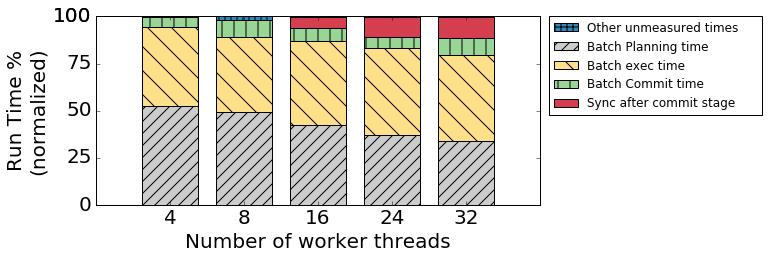

In [7]:
# dir1 = '/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/ycsb_final_theta0pt8_wtvar_lat_quecc_GS32'
# dir1 = '/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/ycsb_wtvar_lat_quecc_unpip_GS32'
dir1 = '/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_quecc_timeb'
agg_params = {'wt_hl_plan_time':'mean',
            'wt_hl_sync_plan_time':'mean',
            'wt_hl_exec_time':'mean',
            'wt_hl_sync_exec_time':'mean',
            'wt_hl_commit_time':'mean',
            'wt_hl_sync_commit_time':'mean',
            'wt_hl_cleanup_time':'mean',
            'exec_batch_proc_time':'mean',
#             'tput':'mean'
           }
resFiles = os.listdir(dir1)
i = 0
for fn1 in resFiles:    
#     regex = "(pa(\d+)_)([A-Za-z]+|\d+)_pt(\d+)_et(\d+)_(\d+)_?(pptstrict|pptnonstrict)?_([A-Za-z]+)_(c|s)_t(\d+)_(\d+)(_(\d+))?.txt"
#     rsize_re = "(\d+)Brec_.+"
    regex = "thread_count@(\d+)__"
    m = re.search(regex,fn1)
    if m:
        wt_cnt = int(m.group(1))
    else:
        wt_cnt = 0
#     print(wt_cnt)    
    m = re.search(regex,fn1)
    if True:
#         print(fn1)
        time_data = exetract_breakdown_from_file(dir1+"/"+fn1, wt_cnt)
#         time_data = view_exec_from_file(dir1+"/"+fn1)
#         print(time_data)
#         del time_data['wt_hl_sync_plan_time']
        for t in time_data:
            alen = len(time_data[t])            
            if alen != int(wt_cnt):
                print('{}={},{}'.format(t,alen,wt_cnt))
            
        df = pd.DataFrame(time_data)
        df['g_thread_cnt'] = wt_cnt
#         print(df)
#         df = df.groupby('g_thread_cnt').agg(agg_params)
        
        if i == 0:
            combined = df
        else:
            combined = pd.concat([combined,df])
        i = i + 1
combined = combined.groupby('g_thread_cnt').agg(agg_params)
# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_quecc_timeb"
# ycsb_df = init_df(ycsb_data);

# combined = ycsb_df

plot_exec_times_hl_wt_agg(combined)
combined        

[1.0]
['MVCC', 'NOWAIT', 'QUECC', 'QUECC-25', 'QUECC-50', 'SILO', 'TIMESTAMP', 'WAITDIE']
[1.0]


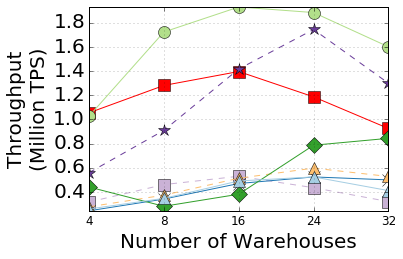

In [9]:
agg_req_normal = {'tput':'mean','phys_mem_usage':'mean','trial_no':'count'}
agg_req = agg_req_normal
us = 1000000
q_pipelined = False
pd.options.display.float_format = '{:,.2f}'.format

grp_indexes = ['cc_alg','pay_perc', 'worker_cnt', 'pt_perc']
figoutdir = '/Users/qadahtm/Google Drive/MBP2/PhDResearch/QueCC/paper_figs/'


# outfname = '{}tpcc-whvar-payp0-GS32.pdf'.format(figoutdir)
# outfname = '{}tpcc-whvar-payp50-GS32.pdf'.format(figoutdir)
outfname = '{}tpcc-whvar-payp100-GS32.pdf'.format(figoutdir)


# tpcc_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/tpcc_whvar_payp0_pip_unpip_GS32"
# tpcc_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/tpcc_whvar_payp50_pip_unpip_GS32"
tpcc_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/tpcc_whvar_payp100_pip_unpip_GS32"
# tpcc_df = pd.DataFrame(parse_directory(tpcc_data));
tpcc_df = pd.concat([pd.DataFrame(),pd.DataFrame(parse_directory(tpcc_data))]);
# tpcc_df['cc_alg'] = tpcc_df['cc_alg']+tpcc_df['pt_perc']
tpcc_df.loc[(tpcc_df['cc_alg'] == "QUECC") & (tpcc_df['pt_perc'] == 50),'cc_alg'] = 'QUECC-50'
tpcc_df.loc[(tpcc_df['cc_alg'] == "QUECC") & (tpcc_df['pt_perc'] == 25),'cc_alg'] = 'QUECC-25'
# tpcc_df = pd.concat([tpcc_df,pd.DataFrame(parse_directory(tpcc_data))]);
# tpcc_df.loc[(tpcc_df['cc_alg'] == "QUECC") & (tpcc_df['pt_perc'] == 100),'cc_alg'] = 'QUECC-100'

tpcc_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/tpcc_whvar_paypall_silo_nw_GS32"
tpcc_df = pd.concat([tpcc_df,pd.DataFrame(parse_directory(tpcc_data))]);
# tpcc_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/tpcc_wtvar_silo_nw_1_GS32"
# tpcc_df = pd.concat([tpcc_df,pd.DataFrame(parse_directory(tpcc_data))]);
tpcc_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/tpcc_whvar_paypall_tsalgs_GS32"
tpcc_df = pd.concat([tpcc_df,pd.DataFrame(parse_directory(tpcc_data))]);

#drop OCC
tpcc_df = tpcc_df[tpcc_df['cc_alg'] != 'OCC']

# tpcc_df = tpcc_df[tpcc_df['batch_size'] == 8192]
tpcc_df = tpcc_df[tpcc_df['batch_size'] == 10368]

# tpcc_df = tpcc_df[tpcc_df['pay_perc'] == 0.0]
# tpcc_df = tpcc_df[tpcc_df['pay_perc'] == 0.5]
tpcc_df = tpcc_df[tpcc_df['pay_perc'] == 1.0]
# print(tpcc_df['batch_size'])

# tpcc_df = tpcc_df[tpcc_df['pt_perc'] >= 50]
combined = tpcc_df

plot_tpcc_whvar(combined,'test')


In [196]:
#Plotting YCSB results

def init_df(path):
    return pd.DataFrame(parse_directory_cicada(path))

def join_df(df,path):
    return  pd.concat([df,pd.DataFrame(parse_directory_cicada(path))]);


ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_wpvar"
ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_quecc_thetavar_optvar_wpvar_2"

ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_thetavar_2"

#thetavar
# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_all_thetavar_new"
# ycsb_df = init_df(ycsb_data);



# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_wpvar_theta0"
# ycsb_df = join_df(ycsb_df, ycsb_data);

#optvar thetapt6, thetapt8
# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_all_thetapt6_optvar"
# ycsb_df = init_df(ycsb_data);
# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_all_thetapt6pt8_optvar"
# ycsb_df = init_df(ycsb_data);


# ycsb_df = ycsb_df[ycsb_df['cc_alg'] != 'TICTOC']
# ycsb_df = ycsb_df[ycsb_df['cc_alg'] != 'SILO']
# ycsb_df = ycsb_df[ycsb_df['cc_alg'] != 'QUECC']


# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_nowait_rerun_thetapt6_opt32"
# ycsb_df = join_df(ycsb_df, ycsb_data);
# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_all_thetapt8_optvar"
# ycsb_df = join_df(ycsb_df, ycsb_data);

# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_others_optvar"
# ycsb_df = join_df(ycsb_df, ycsb_data);
# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_others_rerun_opt32_theta99"
# ycsb_df = join_df(ycsb_df, ycsb_data);
# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_nowait_rerun_opt32_theta99"
# ycsb_df = join_df(ycsb_df, ycsb_data);
# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_mica_rerun_opt32_theta99"
# ycsb_df = join_df(ycsb_df, ycsb_data);
# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_quecc_thetavar_opt1_wpvar"
# ycsb_df = join_df(ycsb_df, ycsb_data);
# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_nowait_rerun_opt20_theta99"
# ycsb_df = join_df(ycsb_df, ycsb_data);
# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_quecc_thetavar_optvar_wpvar_2"
# ycsb_df = join_df(ycsb_df, ycsb_data);

# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_quecc_silo_tictoc_rerun_thetapt6_optvar"
# ycsb_df = join_df(ycsb_df, ycsb_data);

#optvar thetapt0
# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_all_thetapt0_optvar"
# ycsb_df = init_df(ycsb_data);


#wpvar
# wpvar_thetapt6
# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_all_thetapt6_wpvar"
# ycsb_df = init_df(ycsb_data);

# wpvar_thetapt8
# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_all_thetapt8_wpvar"
# ycsb_df = init_df(ycsb_data);

# wpvar_thetapt6pt8
# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_ycsb_all_thetapt6pt8_wpvar"
# ycsb_df = init_df(ycsb_data);

# wpvar_theta0
# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_all_thetapt0_wpvar"
# ycsb_df = init_df(ycsb_data);

# wpvar_thetapt99
# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_all_thetapt99_wpvar"
# ycsb_df = init_df(ycsb_data);

# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_nowait_silo_ermia_rerun_wpvar"
# ycsb_df = join_df(ycsb_df, ycsb_data);

#wtvar, thetapt99
# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_all_wtvar_thetapt99"
# ycsb_df = init_df(ycsb_data);
# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_quecc_rerun_wt4"
# ycsb_df = join_df(ycsb_df, ycsb_data);

#wtvar, thetapt6pt8
# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_ycsb_all_wtvar_thetapt6pt8"
# ycsb_df = init_df(ycsb_data);

#wtvar, theta0
# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_ycsb_all_wtvar_thetapt0"
# ycsb_df = init_df(ycsb_data);


#resizevar, thetapt99
# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_all_recsizevar_thetapt99"
# ycsb_df = init_df(ycsb_data);

# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_nowait_silo_rerun_recsize2000"
# ycsb_df = join_df(ycsb_df, ycsb_data);

#resizevar, theta0
# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_all_thetapt0_recsizevar"
# ycsb_df = init_df(ycsb_data);
# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_ycsb_quecc_theta0_recsize2000"
# ycsb_df = join_df(ycsb_df, ycsb_data);

# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_all_thetapt6pt8_recsizevar"
# ycsb_df = init_df(ycsb_data);
# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_ycsb_quecc_thetapt6pt8_recsize2000"
# ycsb_df = join_df(ycsb_df, ycsb_data);

#bsizevar
# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_quecc_bsizevar"
# ycsb_df = init_df(ycsb_data);


#wt_tbreak
# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_quecc_timeb"
# ycsb_df = init_df(ycsb_data);


# ycsb_df = ycsb_df[ycsb_df['zipf_theta'] == '0.6']
# ycsb_df = ycsb_df[ycsb_df['zipf_theta'] == '0.8']

# combined = ycsb_df


# combined['rec_accessed'] = combined['tput']*combined['req_cnt']
# combined['abort_perc'] = (combined['abort_cnt'])/(combined['abort_cnt']+combined['txn_cnt'])
# combined['abort_rate'] = 0.0
# combined.loc[combined['cc_alg'] == 'QUECC','abort_rate'] = 0.0
# combined.loc[combined['cc_alg'] == 'QUECC','abort_perc'] = 0.0
agg_req_normal = {'tput':'mean','abort_perc':'mean', 'abort_cnt':'mean', 'rec_accessed':'mean', 'txn_cnt':'mean', 'avg_lat':'mean', '95th_lat':'mean', 'seq_no':'count'}
# grp_indexes = ['cc_alg','batch_size', 'rec_size', 'worker_cnt','zipf_theta','write_perc','req_cnt']
grp_indexes = ['cc_alg','rec_size', 'worker_cnt','zipf_theta','write_perc','req_cnt']

# combined = combined[combined['write_perc'] == '0.50']
# combined = combined[combined['write_perc'] > '0.20']


# combined = combined[combined['zipf_theta'] != '0.3']
# combined = combined[combined['zipf_theta'] != '0.9']

# combined = combined[combined['zipf_theta'] == '0.0']
# combined = combined[combined['zipf_theta'] == '0.5']
# combined = combined[combined['zipf_theta'] == '0.6']
# combined = combined[combined['zipf_theta'] == '0.7']
# combined = combined[combined['zipf_theta'] == '0.8']
# combined = combined.query('zipf_theta == "0.8" or zipf_theta == "0.6"')
# combined = combined[combined['zipf_theta'] == '0.99']
#
# combined = combined[combined['cc_alg'] != 'ERMIA-SI_SSN-REF']
# combined = combined[combined['cc_alg'] != 'WAIT_DIE']
# combined = combined[combined['cc_alg'] != 'DL_DETECT']
# combined = combined[combined['cc_alg'] == 'NO_WAIT']
# combined = combined[combined['cc_alg'] == 'TICTOC']
# combined = combined[combined['cc_alg'] == 'QUECC']
# combined = combined.query('cc_alg == "TICTOC" or cc_alg == "QUECC" or cc_alg == "SILO"')


# combined = combined[combined['req_cnt'] == 16]
# combined = combined[combined['req_cnt'] != 32]

# grouped_f = combined.groupby(grp_indexes).agg(agg_req_normal)

figoutdir = '/Users/qadahtm/Google Drive/MBP2/PhDResearch/QueCC/cicada_paper_figs/'
# print(grouped_f.index)
# plot_ycsb_wpvar(combined,outfname)

#optvar
# outfname = '{}ycsb-optvar-theta0-GS32.pdf'.format(figoutdir)
# plot_ycsb_optvar(combined,outfname)
# outfname = '{}ycsb-optvar-thetapt6-GS32.pdf'.format(figoutdir)
# plot_ycsb_optvar(combined,outfname)
# outfname = '{}ycsb-optvar-thetapt8-GS32.pdf'.format(figoutdir)
# plot_ycsb_optvar(combined,outfname)
# outfname = '{}ycsb-optvar-thetapt99-GS32.pdf'.format(figoutdir)
# plot_ycsb_optvar(combined,outfname)
# outfname = '{}ycsb-optvar-thetapt99-arate-GS32.pdf'.format(figoutdir)
# plot_ycsb_optvar(combined,outfname,plot_abort=True)

# outfname = '{}ycsb-lgd-GS32.pdf'.format(figoutdir)
# plot_ycsb_optvar(combined,outfname)

#thetavar
# outfname = '{}ycsb-thetavar-GS32.pdf'.format(figoutdir)
# plot_ycsb_thetavar(combined,outfname)
# outfname = '{}ycsb-thetavar-arate-GS32.pdf'.format(figoutdir)
# plot_ycsb_thetavar(combined,outfname, plot_abort=True)

#wpvar
# outfname = '{}ycsb-wpvar-thetapt6-GS32.pdf'.format(figoutdir)
# plot_ycsb_wpvar(combined,outfname)
# outfname = '{}ycsb-wpvar-thetapt8-GS32.pdf'.format(figoutdir)
# plot_ycsb_wpvar(combined,outfname)
# outfname = '{}ycsb-wpvar-theta0-GS32.pdf'.format(figoutdir)
# plot_ycsb_wpvar(combined,outfname)


# outfname = '{}ycsb-wpvar-thetapt8-GS32.pdf'.format(figoutdir)
# plot_ycsb_wpvar(combined,outfname)

# outfname = '{}ycsb-wpvar-thetapt99-GS32.pdf'.format(figoutdir)
# plot_ycsb_wpvar(combined,outfname)
# outfname = '{}ycsb-wpvar-thetapt99-arate-GS32.pdf'.format(figoutdir)
# plot_ycsb_wpvar(combined,outfname,True)

#wtvar
# outfname = '{}ycsb-wtvar-thetapt99-GS32.pdf'.format(figoutdir)
# plot_ycsb_wtvar(combined,outfname)
# outfname = '{}ycsb-wtvar-thetapt99-arate-GS32.pdf'.format(figoutdir)
# plot_ycsb_wtvar(combined,outfname, plot_abort=True)

# outfname = '{}ycsb-wtvar-thetapt6-GS32.pdf'.format(figoutdir)
# plot_ycsb_wtvar(combined,outfname)

# outfname = '{}ycsb-wtvar-thetapt8-GS32.pdf'.format(figoutdir)
# plot_ycsb_wtvar(combined,outfname)

# outfname = '{}ycsb-wtvar-theta0-GS32.pdf'.format(figoutdir)
# plot_ycsb_wtvar(combined,outfname)


#recsizevar
# outfname = '{}ycsb-recsizevar-thetapt99-GS32.pdf'.format(figoutdir)
# plot_ycsb_recsizevar(combined,outfname)
# outfname = '{}ycsb-recsizevar-thetapt99-arate-GS32.pdf'.format(figoutdir)
# plot_ycsb_recsizevar(combined,outfname, plot_abort=True)

# outfname = '{}ycsb-recsizevar-theta0-GS32.pdf'.format(figoutdir)
# plot_ycsb_recsizevar(combined,outfname)

# outfname = '{}ycsb-recsizevar-thetapt6-GS32.pdf'.format(figoutdir)
# plot_ycsb_recsizevar(combined,outfname)

# outfname = '{}ycsb-recsizevar-thetapt8-GS32.pdf'.format(figoutdir)
# plot_ycsb_recsizevar(combined,outfname)

# outfname = '{}ycsb-recsizevar-thetapt6-GS32.pdf'.format(figoutdir)
# plot_ycsb_recsizevar(combined,outfname)

# outfname = '{}ycsb-recsizevar-thetapt8-GS32.pdf'.format(figoutdir)
# plot_ycsb_recsizevar(combined,outfname)

#bsizevar
# lat_lines = ['avg_lat']
# outfname = '{}ycsb-bsizevar-thetapt99-lat-GS32.pdf'.format(figoutdir)
# plot_ycsb_bsizevar(combined,outfname,lat_lines)
# lat_lines = ['tput']
# outfname = '{}ycsb-bsizevar-thetapt99-GS32.pdf'.format(figoutdir)
# plot_ycsb_bsizevar(combined,outfname,lat_lines)

#tbreak




# grouped_f

# combined['write_perc']
# combined
# grouped_f['tput'].sort_values(ascending=False)
# grouped_f['rec_accessed'].sort_values(ascending=False)
# d= 2.71/0.88
# d
# (2.64/1.68,2.32/0.56,2.17/0.48)
# (2.44/0.85)

In [1210]:
# QCD experiments
g_grp_indexes = ['workload','cc_alg','node_cnt','node_type','mpr', 'batch_size', 'zipf_theta', 'ppt_cnt', 'req_cnt', 'write_perc']
g_aggs = {'tput':'sum', 'seq_no':'count','txn_run_avg_time':'mean','ccl50':'mean', 'ccl95':'mean', 'ccl99':'mean'}
figoutdir = '/Users/qadahtm/Google Drive/MBP2/PhDResearch/EpochCC/qcd-images/'

test_res_dir = '/Users/qadahtm/Dev/halstead/deneva_project/qcd-results/exp_results2'
all_dir_df = pd.DataFrame(parse_directory_expdb(test_res_dir))
#exclude Maat and Wait-Die for now
ycsb_dir_df = all_dir_df[all_dir_df['workload'] == 'YCSB']
tpcc_dir_df = all_dir_df[all_dir_df['workload'] == 'TPCC']


ycsb_dir_df = ycsb_dir_df[ycsb_dir_df['cc_alg'] != 'MAAT']
ycsb_dir_df = ycsb_dir_df[ycsb_dir_df['cc_alg'] != 'WAIT_DIE']

ycsb_server_df = ycsb_dir_df[ycsb_dir_df['node_type'] == 'Server']
ycsb_client_df = ycsb_dir_df[ycsb_dir_df['node_type'] == 'Client']

# gby_all_alg = ycsb_dir_df.groupby(grp_indexes).agg(aggs)
# gby_all_alg['trial_cnt'] = gby_all_alg['seq_no']/16
# ycsb_dir_df
# gby_all_alg

In [1051]:
aggs_abort = {'tput':'sum', 'seq_no':'count','txn_run_avg_time':'mean','ccl50':'mean', 'ccl95':'mean', 'ccl99':'mean',
              'total_txn_commit_cnt':'sum', 'total_txn_abort_cnt':'sum', 'abort_rate':'mean'}
grp_indexes = ['cc_alg','node_cnt','node_type','mpr', 'batch_size', 'zipf_theta', 'ppt_cnt', 'write_perc', 'seq_btimer']
gby_all_abort = ycsb_server_df.groupby(g_grp_indexes).agg(aggs_abort)
test_df = ycsb_client_df.groupby(grp_indexes, as_index=False).agg(aggs)
# ycsb_server_df
gby_all_abort

tput  \
workload cc_alg    node_cnt node_type mpr  batch_size zipf_theta ppt_cnt req_cnt write_perc                
YCSB     CALVIN    16       Server    0.00 10368      0.00       8       16      0.50       1,108,779.93   
                                                                 16      16      0.50       2,190,489.99   
                                                      0.30       16      16      0.50       1,097,772.55   
                                                      0.60       16      16      0.50       1,113,156.60   
                                                      0.80       8       16      0.50       1,229,747.45   
                                                                 16      16      0.50       1,235,187.31   
                                                      0.90       16      16      0.50       1,337,762.19   
                                                      0.95       8       16      0.00         697,413.35   
                                                                                 0.05         704,230.15   
                                                                                 0.20         725,492.91   
                                                                                 0.50       1,341,987.71   
                                                                                 0.80         606,575.70   
                                                                                 0.95         601,167.66   
                                                                 16      16      0.50       2,741,291.04   
                                                      0.99       16      16      0.50       1,272,514.70   
                                      0.10 5040       0.95       16      16      0.50       1,922,749.84   
                                           10368      0.00       8       16      0.50       1,505,168.16   
                                                                 16      16      0.50       2,024,602.10   
                                                      0.80       8       16      0.50       1,631,613.71   
                                                      0.95       8       16      0.00         933,491.15   
                                                                                 0.05         946,691.56   
                                      0.15 10368      0.00       8       16      0.50       1,680,624.81   
                                                                 16      16      0.50       1,594,953.43   
                                                      0.80       8       16      0.50       1,814,213.88   
                                                      0.95       8       16      0.00       1,027,043.33   
                                                                                 0.05       1,002,968.31   
                                                                                 0.20       1,031,519.23   
                                                                 16      16      0.50       1,541,195.88   
                                      0.50 256        0.00       8       2       0.50         450,837.52   
                                                                         4       0.50         890,641.38   
...                                                                                                  ...   
         TIMESTAMP 16       Server    0.50 10368      0.00       8       16      0.95         106,471.97   
                                                                 12      16      0.50         115,926.94   
                                                                 16      16      0.50          97,426.58   
                                                      0.95       8       16      0.00         171,615.12   
                                                                                 0.05         126,282.45

In [1472]:
# tpcc_qcd
# load TPC-C data 
g_tpcc_grp_indexes = ['workload','cc_alg','node_cnt','node_type','mpr', 'bmap_len', 'wh_cnt', 'batch_size','ppt_cnt','pay_perc']

tpcc_dir = '/Users/qadahtm/Dev/halstead/deneva_project/qcd-results/exp_results_qc_tpcc'
all_tpcc_df = pd.DataFrame(parse_directory_expdb(tpcc_dir))
all_tpcc_df = all_tpcc_df.groupby(g_tpcc_grp_indexes, as_index=False).agg(g_aggs)
# all_tpcc_df

In [1486]:
# tpcc_qcd
def plot_barh_tpcc_qcd(combined,outfname,plot_abort=False):
    us = 1000000
    agg_req = {'tput':'mean', 'seq_no':'count','abort_perc':'mean', 'abort_cnt':'mean', 'txn_cnt':'mean'}
    grp_indexes = ['cc_alg', 'worker_cnt']
    pd.options.display.float_format = '{:,.2f}'.format
    grouped_f = combined.groupby(grp_indexes).agg(agg_req)

    plt.figure(figsize=(10,4))
    plt.grid(True)

    algs = list(grouped_f.index.levels[0])
    pc =0
    # print(algs)
    # print(ztheta)
    doplot = True
    line_labels = []
    line_yvals = []
    line_ayvals = []
    line_xvals = []
    line_theta = []
    ptr = 100
    bcolor = []
    for a in algs:
        ll = a
        print(ll)
#         print(t)
        line_labels.append(fix_lgd_label(ll))
        bcolor.append(ls_dict[ll]['color'])
        line_yvals.append(grouped_f.loc[a]['tput'])
        line_ayvals.append(grouped_f.loc[a]['abort_perc'])
        
    ax = plt.subplot(111)
    
#     objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')

#     performance = [10,8,6,4,2,1]
 
#     plt.barh(y_pos, performance, align='center', alpha=0.5)
#     plt.yticks(y_pos, objects)
#     plt.xlabel('Usage')
#     plt.title('Programming language usage')
    if plot_abort:
        bvals = list(grouped_f['abort_perc']*100)
        _xlabel = 'Abort Percentage'
    else:
        bvals = list(grouped_f['tput'])
        _xlabel = 'Throughput (Million TPS)'
        
    y_pos = np.arange(len(algs))    
    ax.barh(y_pos, bvals, align='center', alpha=0.5, color=bcolor)
    plt.yticks(y_pos,line_labels)

    plt.xlabel(_xlabel)
    plt.grid(True)
    plt.tight_layout()    
#     plt.savefig(outfname,format='pdf', bbox_inches='tight')
    plt.savefig(outfname,format='pdf', bbox_inches='tight')

def plot_tpcc_mprvar_qcd(combined,outfname, lat_lines):
    plt.figure(figsize=(6,6))
    plt.rc('grid', linestyle="--",alpha=0.5)
    plt.grid(True)
    us = 1000000
    pd.options.display.float_format = '{:,.2f}'.format
    grouped_f = combined
    algs = list(grouped_f.index.levels[0])
    thetavals = list(grouped_f.index.levels[1])

    pc =0
#     print(algs)
    # print(ztheta)
    doplot = True
    line_labels = []
    line_yvals = []
    line_xvals = []
    line_theta = []
    line2_yvals = []
    line2_xvals = []

    for latv in lat_lines:
#         print('preparing lat: {}'.format(latv))
        for a in algs:
            ll = a
            line_labels.append(ll)
            yvals = grouped_f.loc[a][latv]
#             if latv == 'tput':
#                 yvals = list(map(lambda x: x/1000000,yvals))
                
            line_yvals.append(yvals)
            thetavals = list(map(lambda x: int(x*100), thetavals))
            line_xvals.append(thetavals)

        
#     print(line_xvals)
#     print(line_yvals)
    ax = plt.subplot(111)
    lgds = [];
    # ax2 = ax.twinx()
    x_ticks = list(range(len(line_xvals[0])))
    ax2 = ax
    for i in range(len(line_labels)):
#     ax.plot(line_xvals[i],line_yvals[i], ls_tmp, label=line_labels[i])
        m = re.search('Lat', line_labels[i])
#         print(line_labels[i])
        if latv.find('ccl') != -1:
#             print('plotting lat')
            ls_tmp = ls_dict_lat[line_labels[i]]
            lgd_t, = ax.plot(x_ticks,line_yvals[i], marker=ls_tmp['marker'],linewidth=4.0, markersize=12, linestyle=ls_tmp['linestyle'], color=ls_tmp['color'], markeredgewidth=0.5,markeredgecolor='black',
                             label=fix_lgd_label(line_labels[i]))
            lgds.append(lgd_t)
    #         ax.set_xscale('log', basex=2)
            ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.f'))
            ax.xaxis.set_tick_params(labelsize=g_label_size)
#             ax.yaxis.set_tick_params(labelsize=g_label_size)
            ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%,.d'))
            ax.set_ylabel('Average Latency (Seconds)',fontsize=16)
            ax.set_xlabel(r'% of Multi-partition Transactions', fontsize=16)
            ax.margins(0.0)
            lgd = ax.legend(lgds,[p_.get_label() for p_ in lgds],loc=8,ncol=1, fontsize=12,
                            bbox_to_anchor=(0.05, 0.65, 0.4, 0.0), mode="expand")
        else:
#             print('plotting tput')
    #         ax2.set_ylim(0,3.2)
            ls_tmp = ls_dict[line_labels[i]]
            l, = ax2.plot(x_ticks,line_yvals[i], marker=ls_tmp['marker'],linewidth=4.0, markersize=12, linestyle=ls_tmp['linestyle'], color=ls_tmp['color'], markeredgewidth=0.5,markeredgecolor='black',
                          label=fix_lgd_label(line_labels[i]))
            lgds.append(l)
            ax2.set_yscale('log')
#             ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%4.1f'))
            ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.d'))
            ax2.xaxis.set_tick_params(labelsize=g_label_size)
#             ax2.yaxis.set_tick_params(labelsize=g_label_size)
            ax2.set_xlabel(r'% of Multi-partition Transactions', fontsize=16)
            ax2.set_ylabel('System Throughput (txn/sec)', fontsize=16) 
            ax2.margins(0.0)
#             lgd = ax.legend(lgds,[p_.get_label() for p_ in lgds],loc=8,ncol=2, fontsize=12,
#                             bbox_to_anchor=(0.25, 0.72, 0.75, 0.0), mode="expand")

    plt.xticks(x_ticks,line_xvals[0])
#     plt.savefig(outfname,format='pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.savefig(outfname,format='pdf')
    
def plot_tpcc_hbar_qcd(grouped_f, outfname):

    plt.figure(figsize=(10,6))
    plt.grid(True)

    algs = list(set(grouped_f.index.get_level_values(0)))
    print(algs)
    bsize = list(set(grouped_f.index.get_level_values(1)))
    print(bsize)
    pc =0
    # print(algs)
    # print(ztheta)
    doplot = True
    line_labels = []
    line_yvals = []
    line_ayvals = []
    line_xvals = []
    line_theta = []
    ptr = 100
    bcolor = []

    plot_abort = False

    a = 'QUECC'
    qc = grouped_f.loc(a)
    

    for a in algs:        
#         bs = grouped_f.loc[a]
        ll = a
        if a != 'QUECC':
            bs = 10368
        else:
            bs = 161280
        print(ll)
    #         print(t)
        line_labels.append(fix_lgd_label(ll))
        bcolor.append(ls_dict[ll]['color'])
        line_yvals.append((grouped_f.loc[a,bs]['tput'])/1000)
        if plot_abort:
            line_ayvals.append(grouped_f.loc[a,bs]['abort_perc'])
        
#         if a != 'QUECC':
#             ll = a
#             bs = 10368
#             print(ll)
#         #         print(t)
#             line_labels.append(fix_lgd_label(ll))
#             bcolor.append(ls_dict[ll]['color'])
#             line_yvals.append(grouped_f.loc[a,bs]['tput'])
#             if plot_abort:
#                 line_ayvals.append(grouped_f.loc[a,bs]['abort_perc'])
#         else:
#             for bs in bsize:                
#                 if bs == 10368:
#                     continue
# #                     ll = '{}-10K'.format(a)
#                 elif bs == 161280:
#                     ll = '{}-160K'.format(a)
#                 elif bs == 80640:
#                     continue
#                     ll = '{}-80K'.format(a)
#                 else:
#                     raise ValueError("{} batch size error".format(bs))
#                 print(ll)
#                 line_labels.append(fix_lgd_label(ll))
#                 bcolor.append(ls_dict[ll]['color'])
#                 line_yvals.append(grouped_f.loc[a,bs]['tput'])
                
    print(line_labels)
    print(line_yvals)
    
    ax = plt.subplot(111)
#     x_ticks = range(len())
    if plot_abort:
        bvals = list(grouped_f['abort_perc']*100)
        _xlabel = 'Abort Percentage'
    else:
        bvals = list(grouped_f['tput'])
        _xlabel = r'Transactions per Seconds'

    y_pos = np.arange(len(line_labels))    
    ax.barh(y_pos, line_yvals, align='center', alpha=0.5, color=bcolor)
    ax.set_xscale('log')
    plt.yticks(y_pos,line_labels)

    plt.xlabel(_xlabel)
    # plt.title("2 Servers, 2 Clients, MPR=0.5")
#     plt.title(title)
    plt.grid(True)
    plt.tight_layout()   
    plt.savefig(outfname,format='pdf')

l_tpcc_grb_indeses = ['cc_alg', 'batch_size', 'bmap_len','wh_cnt','mpr','ppt_cnt','pay_perc','node_cnt','node_cnt']
# l_tpcc_grb_indeses = ['cc_alg', 'batch_size']
l_aggs = {'tput':'mean', 'seq_no':'mean','txn_run_avg_time':'mean','ccl50':'mean', 'ccl95':'mean', 'ccl99':'mean'}

tpcc_client_df = all_tpcc_df[all_tpcc_df['node_type'] == 'Client']
# tpcc_mpr15_df = tpcc_client_df[tpcc_client_df['pay_perc'] == 0.0]


tpcc_df_qc_test = tpcc_client_df[tpcc_client_df['cc_alg'] == 'QUECC']
# tpcc_df_qc_test = tpcc_df_qc_test[tpcc_df_qc_test['bmap_len'] == 16]
tpcc_df_qc_test = tpcc_df_qc_test[tpcc_df_qc_test['batch_size'] != 10368]
# tpcc_df_qc_test = tpcc_df_qc_test[tpcc_df_qc_test['batch_size'] == 161280]
# tpcc_df_qc_test = tpcc_df_qc_test[tpcc_df_qc_test['mpr'] == 1.0]

tpcc_df_test = tpcc_client_df[tpcc_client_df['cc_alg'] != 'QUECC']

# tpcc_df_test = tpcc_df_test[tpcc_df_test['node_cnt'] == 16]

# tpcc_df_test = tpcc_df_test[tpcc_df_test['batch_size'] != 40320]
# tpcc_df_test = tpcc_df_test[tpcc_df_test['batch_size'] != 322560]
# tpcc_df_test = tpcc_df_test[tpcc_df_test['batch_size'] != 10368]

tpcc_df_test = pd.concat([tpcc_df_test,tpcc_df_qc_test])
# tpcc_df_test = tpcc_df_test[tpcc_df_test['mpr'] == 0.15]
tpcc_df_test = tpcc_df_test[tpcc_df_test['mpr'] == 1.0]
# tpcc_df_test = tpcc_df_test[tpcc_df_test['pay_perc'] == 0.0]
tpcc_df_test = tpcc_df_test[tpcc_df_test['node_cnt'] == 16]
# tpcc_df_test = tpcc_df_test[tpcc_df_test['ppt_cnt'] == 16]


# tpcc_df_test = tpcc_client_df

# tpcc_mprvar_df = tpcc_mprvar_df[tpcc_mprvar_df['cc_alg'] != 'MVCC']
# tpcc_mprvar_df = tpcc_mprvar_df[tpcc_mprvar_df['cc_alg'] != 'TIMESTAMP']

# gby = tpcc_client_df.groupby(l_tpcc_grb_indeses).agg(l_aggs)

gby = tpcc_df_test.groupby(l_tpcc_grb_indeses).agg(l_aggs)
# gby = tpcc_mpr15_df.groupby(l_tpcc_grb_indeses).agg(g_aggs)
# gby = tpcc_mprvar_df.groupby(l_tpcc_grb_indeses).agg(g_aggs)


# lat_lines = ['ccl50']
# outfname = '{}tpcc-mprvar-payp0-lat.pdf'.format(figoutdir)
# outfname = '{}tpcc-mprvar-payppt5-lat.pdf'.format(figoutdir)
# outfname = '{}tpcc-mprvar-payp1-lat.pdf'.format(figoutdir)

# lat_lines = ['tput']
# outfname = '{}tpcc-mprvar-payp0-tput.pdf'.format(figoutdir)
# outfname = '{}tpcc-mprvar-payppt5-tput.pdf'.format(figoutdir)
# outfname = '{}tpcc-mprvar-payp1-tput.pdf'.format(figoutdir)

# outfname = '{}tpcc-payp1-tput.pdf'.format(figoutdir)
# outfname = '{}tpcc-payp1-mpr1-tput.pdf'.format(figoutdir)
outfname = '{}tpcc-payp0-mpr1-tput.pdf'.format(figoutdir)

# plot_tpcc_mprvar_qcd(gby,outfname,lat_lines)
# plot_tpcc_hbar_qcd(gby,outfname)
gby
# gby.loc['QUECC']
# gby
# gby['tput'].sort_values(ascending=False)
# s = 2620110.30/302660.2
# s
# tpcc_df_qc_test

tput  \
cc_alg    batch_size bmap_len wh_cnt mpr  ppt_cnt pay_perc node_cnt node_cnt                
CALVIN    10368      1        64     1.00 2       0.00     16       16         302,660.27   
                                                  0.50     16       16         378,477.07   
                                                  1.00     16       16         884,752.78   
                                          16      0.00     16       16          73,959.42   
                                                  0.50     16       16          86,116.72   
                                                  1.00     16       16         799,884.00   
MVCC      10368      1        64     1.00 2       0.00     16       16           3,284.73   
                                                  0.50     16       16          10,363.47   
                                                  1.00     16       16          32,116.18   
                                          16      0.00     16       16          45,138.88   
                                                  0.50     16       16          20,007.73   
                                                  1.00     16       16          31,892.07   
NO_WAIT   10368      1        64     1.00 2       0.00     16       16          33,349.72   
                                                  0.50     16       16          11,017.53   
                                                  1.00     16       16          10,117.02   
                                          16      0.00     16       16          27,751.28   
                                                  0.50     16       16           6,239.90   
                                                  1.00     16       16          10,315.17   
QUECC     80640      1        64     1.00 2       0.00     16       16         286,523.97   
                                                  0.50     16       16         280,896.00   
                                          16      0.00     16       16          40,320.00   
                                                  0.50     16       16          83,328.00   
                                                  1.00     16       16       1,945,826.58   
                     16       64     1.00 2       0.00     16       16         303,744.00   
                                                  0.50     16       16         580,500.87   
                                          16      0.00     16       16          43,008.00   
                                                  0.50     16       16          84,696.02   
                                                  1.00     16       16       1,921,937.23   
          161280     1        64     1.00 2       0.00     16       16         276,839.67   
                                                  0.50     16       16         524,189.32   
                                                  1.00     16       16       2,407,223.10   
                                          16      0.00     16       16          43,008.00   
                                                  0.50     16       16          80,640.00   
                                                  1.00     16       16       2,174,788.06   
                     16       64     1.00 2       0.00     16       16         281,606.83   
                                                  0.50     16       16         547,795.21   
                                          16      0.00     16       16          43,008.00   
                                                  0.50     16       16          86,016.00   
                                                  1.00     16       16       2,360,438.58   
          322560     1        64     1.00 2       0.00     16       16         258,048.00   
                                                  0.50     16       16         483,840.00   
                                          16      0.00     16       16          43,008

['QUECC']
preparing lat: tput
0.0
1.0
SPT
plotting tput
MPT
plotting tput


tput  seq_no  txn_run_avg_time  ccl50  ccl95  \
cc_alg batch_size mpr                                                         
QUECC  10368      0.00   475,131.98       2              2.79   2.80   2.91   
                  1.00   365,594.15       2              3.63   3.62   3.81   
       40320      0.00 1,575,542.98       2              3.28   3.28   3.41   
                  1.00 1,901,362.61       2              2.72   2.72   2.80   
       80640      0.00 2,113,896.81       2              4.89   4.88   5.00   
                  1.00 2,263,098.04       2              4.56   4.60   4.68   
       161280     0.00 1,822,117.18       2             11.32  11.29  11.59   
                  1.00 1,815,892.88       2             11.35  11.35  11.46   
       322560     0.00 1,523,004.73       2             27.16  27.15  27.40   
                  1.00 1,493,350.48       2             27.72  27.68  28.57   

                        ccl99  
cc_alg batch_size mpr          
QUECC  10368      0.00   2.94  
                  1.00   3.90  
       40320      0.00   3.46  
                  1.00   2.83  
       80640      0.00   5.05  
                  1.00   4.71  
       161280     0.00  11.64  
                  1.00  11.51  
       322560     0.00  27.54  
                  1.00  29.09

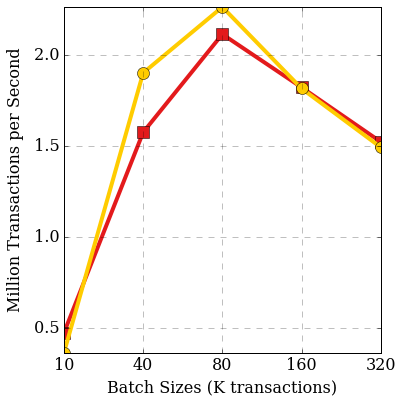

In [1346]:
#bsizevar

def plot_ycsb_bsizevar_qcd(combined,outfname, lat_lines):
    plt.figure(figsize=(6,6))
    plt.rc('grid', linestyle="--",alpha=0.5)
    plt.grid(True)
    us = 1000000
    pd.options.display.float_format = '{:,.2f}'.format
    grouped_f = combined
    algs = list(grouped_f.index.levels[0])
    bsize = list(grouped_f.index.levels[1])
    mprs = list(grouped_f.index.levels[2])
    
#     algs = list(grouped_f.index.labels[0])
#     bsize = list(grouped_f.index.labels[1])
#     mprs = list(grouped_f.index.labels[2])
    # print(ztheta)
    pc =0
    print(algs)
    # print(ztheta)
    doplot = True
    line_labels = []
    line_yvals = []
    line_xvals = []
    line_theta = []
    line2_yvals = []
    line2_xvals = []

    for latv in lat_lines:
        print('preparing lat: {}'.format(latv))
        for a in algs:
            for mpr in mprs:
                xvals =[]
                yvals =[]
                print(mpr)
                if mpr == 0.0:
                    w = 'SPT'
                else:
                    w = 'MPT'
#                 if latv == 'ccl50':
#                     ll = '{}-AVG-Lat'.format(w)
#                 else:
#                     m = re.search('ccl(\d+)', latv)
#                     if m:
#                         ll = '{}-Lat{}\'tile'.format(w,m.group(1))
#                     else:
                ll = w
                line_labels.append(ll)
                for t in bsize:
#                     print('({},{},{})'.format(a,t,mpr))
                    yvals.append(grouped_f.loc[(a,t,mpr)][latv])
                    xvals.append(t)
                
                if latv == 'tput':
                    yvals = list(map(lambda x: x/1000000,yvals))
                line_yvals.append(yvals)
                xvals = list( map(lambda x : int(x/10000)*10 if x >= 10000 else int(x/1000), xvals))
                line_xvals.append(xvals)

        
#     print(line_xvals)
#     print(line_yvals)
    ax = plt.subplot(111)
    lgds = [];
    # ax2 = ax.twinx()
    x_ticks = list(range(len(line_xvals[0])))
    ax2 = ax
    for i in range(len(line_labels)):
#     ax.plot(line_xvals[i],line_yvals[i], ls_tmp, label=line_labels[i])
        m = re.search('Lat', line_labels[i])
        print(line_labels[i])
        if latv.find('ccl') != -1:
            print('plotting lat')
            ls_tmp = ls_dict_lat[line_labels[i]]
            lgd_t, = ax.plot(x_ticks,line_yvals[i], marker=ls_tmp['marker'],linewidth=4.0, markersize=12, linestyle=ls_tmp['linestyle'], color=ls_tmp['color'], markeredgewidth=0.5,markeredgecolor='black', label=line_labels[i])
            lgds.append(lgd_t)
    #         ax.set_xscale('log', basex=2)
            ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.f'))
            ax.xaxis.set_tick_params(labelsize=g_label_size)
            ax.yaxis.set_tick_params(labelsize=g_label_size)
            ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%dK'))
            ax.set_ylabel('Seconds',fontsize=16)
            ax.set_xlabel('Batch Sizes (K transactions)',fontsize=16)
            ax.margins(0.0)
            lgd = ax.legend(lgds,[p_.get_label() for p_ in lgds],loc=8,ncol=2, fontsize=12,
                            bbox_to_anchor=(0.02, 0.9, 0.8, 0.0), mode="expand")
        else:
            print('plotting tput')
    #         ax2.set_ylim(0,3.2)
            ls_tmp = ls_dict[line_labels[i]]
            l, = ax2.plot(x_ticks,line_yvals[i], marker=ls_tmp['marker'], linewidth=4.0, markersize=12, linestyle=ls_tmp['linestyle'], color=ls_tmp['color'], markeredgewidth=0.5,markeredgecolor='black', label=line_labels[i])
            lgds.append(l)
    #         ax2.set_xscale('log', basex=2)
            ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%4.1f'))
            ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('%dK'))
            ax2.xaxis.set_tick_params(labelsize=g_label_size)
            ax2.yaxis.set_tick_params(labelsize=g_label_size)
            ax2.set_xlabel('Batch Sizes (K transactions)', fontsize=16)
            ax2.set_ylabel('Million Transactions per Second', fontsize=16) 
            ax2.margins(0.0)
#             lgd = ax.legend(lgds,[p_.get_label() for p_ in lgds],loc=8,ncol=2, fontsize=12,
#                             bbox_to_anchor=(0.25, 0.02, 0.75, 0.0), mode="expand")

    plt.xticks(x_ticks,line_xvals[0])
    plt.tight_layout()
#     plt.savefig(outfname,format='pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.savefig(outfname,format='pdf')


ycsb_bsize_df = ycsb_dir_df[ycsb_dir_df['zipf_theta'] == 0.0]
ycsb_bsize_df = ycsb_bsize_df[ycsb_bsize_df['cc_alg'] == 'QUECC']
ycsb_bsize_df = ycsb_bsize_df[ycsb_bsize_df['ppt_cnt'] == 16]
ycsb_bsize_df = ycsb_bsize_df[ycsb_bsize_df['req_cnt'] == 16]
ycsb_bsize_df = ycsb_bsize_df[ycsb_bsize_df['write_perc'] == 0.5]
ycsb_bsize_df = ycsb_bsize_df[ycsb_bsize_df['mpr'] != 0.5]
ycsb_bsize_df = ycsb_bsize_df[ycsb_bsize_df['node_type'] == 'Client']
ycsb_bsize_df = ycsb_bsize_df.groupby(g_grp_indexes, as_index=False).agg(g_aggs)

grp_indexes = ['cc_alg', 'batch_size','mpr']
l_aggs = {'tput':'mean', 'seq_no':'mean','txn_run_avg_time':'mean','ccl50':'mean', 'ccl95':'mean', 'ccl99':'mean'}

lat_lines = ['ccl99']
outfname = '{}ycsb-bsizevar-thetapt0-lat.pdf'.format(figoutdir)

lat_lines = ['tput']
outfname = '{}ycsb-bsizevar-thetapt0-tput.pdf'.format(figoutdir)

gby = ycsb_bsize_df.groupby(grp_indexes).agg(l_aggs)
# gby['trial_cnt'] = gby['seq_no']/16

plot_ycsb_bsizevar_qcd(gby,outfname,lat_lines)
gby
# gby.loc[('QUECC',10368,0.0)]['ccl50']
# gby.iloc[0]
# ycsb_bsize_df

tput  \
cc_alg     zipf_theta ppt_cnt mpr  batch_size seq_btimer write_perc                
CALVIN     0.00       16      1.00 10368      0          0.50          43,199.52   
           0.30       16      1.00 10368      0          0.50          39,332.41   
           0.60       16      1.00 10368      0          0.50          41,324.88   
           0.80       16      1.00 10368      0          0.50          38,689.18   
           0.90       16      1.00 10368      0          0.50          42,832.53   
           0.95       16      1.00 10368      0          0.50          41,831.69   
           0.99       16      1.00 10368      0          0.50          39,548.29   
CALVIN-200 0.00       16      1.00 10368      200        0.50          27,789.00   
           0.30       16      1.00 10368      200        0.50          27,970.52   
           0.60       16      1.00 10368      200        0.50          27,772.52   
           0.80       16      1.00 10368      200        0.50          27,907.57   
           0.90       16      1.00 10368      200        0.50          27,415.41   
           0.95       16      1.00 10368      200        0.50          29,328.14   
           0.99       16      1.00 10368      200        0.50          28,300.88   
MVCC       0.00       16      1.00 10368      0          0.50          20,658.70   
           0.30       16      1.00 10368      0          0.50          21,023.19   
           0.60       16      1.00 10368      0          0.50          20,702.15   
           0.80       16      1.00 10368      0          0.50           8,966.42   
           0.90       16      1.00 10368      0          0.50           3,075.30   
           0.95       16      1.00 10368      0          0.50           1,844.62   
           0.99       16      1.00 10368      0          0.50           1,267.16   
NO_WAIT    0.00       16      1.00 10368      0          0.50          22,388.21   
           0.30       16      1.00 10368      0          0.50          23,478.96   
           0.60       16      1.00 10368      0          0.50          23,770.18   
           0.80       16      1.00 10368      0          0.50          24,842.62   
           0.90       16      1.00 10368      0          0.50          26,429.16   
           0.95       16      1.00 10368      0          0.50          25,939.34   
           0.99       16      1.00 10368      0          0.50          25,665.02   
QUECC      0.00       16      1.00 80640      0          0.50       1,131,549.02   
           0.30       16      1.00 80640      0          0.50         976,216.08   
           0.60       16      1.00 80640      0          0.50         839,604.51   
           0.80       16      1.00 80640      0          0.50         761,972.51   
           0.90       16      1.00 80640      0          0.50         767,494.50   
           0.95       16      1.00 80640      0          0.50         782,353.49   
           0.99       16      1.00 80640      0          0.50         798,945.51   
TIMESTAMP  0.00       16      1.00 10368      0          0.50          20,233.41   
           0.30       16      1.00 10368      0          0.50          19,788.48   
           0.60       16      1.00 10368      0          0.50          21,708.67   
           0.80       16      1.00 10368      0          0.50           8,962.16   
           0.90       16      1.00 10368      0          0.50           3,113.21   
           0.95       16      1.00 10368      0          0.50           1,812.87   
           0.99       16      1.00 10368      0          0.50           1,260.72   

                                                                     seq_no  \
cc_alg     zipf_theta ppt_cnt mpr  batch_size seq_btimer write_perc           
CALVIN     0.00       16      1.00 10368      0          0.50             2   
           0.30       16      1.00 10368      0          0.50             2   
           0.60       16      1.00 10368      0          0.50  

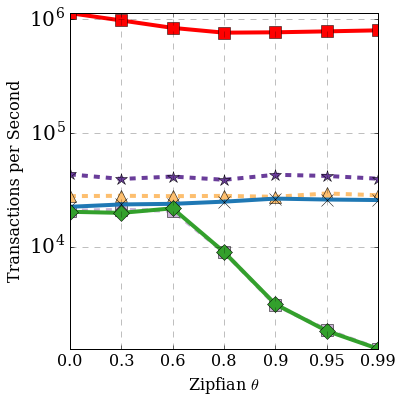

In [1344]:
#thetavar
def plot_ycsb_thetavar_qcd(combined,outfname, lat_lines):
    plt.figure(figsize=(6,6))
    plt.rc('grid', linestyle="--",alpha=0.5)
    plt.grid(True)
    us = 1000000
    pd.options.display.float_format = '{:,.2f}'.format
    grouped_f = combined
    algs = list(grouped_f.index.levels[0])
    thetavals = list(grouped_f.index.levels[1])

    pc =0
#     print(algs)
    # print(ztheta)
    doplot = True
    line_labels = []
    line_yvals = []
    line_xvals = []
    line_theta = []
    line2_yvals = []
    line2_xvals = []

    for latv in lat_lines:
#         print('preparing lat: {}'.format(latv))
        for a in algs:
            ll = a
            line_labels.append(ll)
            yvals = grouped_f.loc[a][latv]
#             if latv == 'tput':
#                 yvals = list(map(lambda x: x/1000000,yvals))
                
            line_yvals.append(yvals)
            line_xvals.append(thetavals)

        
#     print(line_xvals)
#     print(line_yvals)
    ax = plt.subplot(111)
    lgds = [];
    # ax2 = ax.twinx()
    x_ticks = list(range(len(line_xvals[0])))
    ax2 = ax
    for i in range(len(line_labels)):
#     ax.plot(line_xvals[i],line_yvals[i], ls_tmp, label=line_labels[i])
        m = re.search('Lat', line_labels[i])
#         print(line_labels[i])
        if latv.find('ccl') != -1:
#             print('plotting lat')
            ls_tmp = ls_dict_lat[line_labels[i]]
            lgd_t, = ax.plot(x_ticks,line_yvals[i], marker=ls_tmp['marker'], linewidth=4.0, markersize=12, linestyle=ls_tmp['linestyle'], color=ls_tmp['color'], markeredgewidth=0.5,markeredgecolor='black',
                             label=fix_lgd_label(line_labels[i]))
            lgds.append(lgd_t)
    #         ax.set_xscale('log', basex=2)
            ax.set_yscale('log')
#             ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.f'))
            ax.xaxis.set_tick_params(labelsize=g_label_size)
#             ax.yaxis.set_tick_params(labelsize=g_label_size)
            ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.f'))
            ax.set_ylabel('Seconds',fontsize=16)
            ax.set_xlabel(r'Zipfian $\theta$', fontsize=16)
            ax.margins(0.0)
            lgd = ax.legend(lgds,[p_.get_label() for p_ in lgds],loc=8,ncol=2, fontsize=12,
                            bbox_to_anchor=(0.05, 0.58, 0.8, 0.0), mode="expand")
            
        else:
#             print('plotting tput')
    #         ax2.set_ylim(0,3.2)
            ls_tmp = ls_dict[line_labels[i]]
            l, = ax2.plot(x_ticks,line_yvals[i], marker=ls_tmp['marker'],linewidth=4.0, markersize=12, linestyle=ls_tmp['linestyle'], color=ls_tmp['color'], markeredgewidth=0.5,markeredgecolor='black',
                          label=fix_lgd_label(line_labels[i]))
            lgds.append(l)
#             ax2.set_yscale('log', basey=10)
            ax2.set_yscale('symlog')
#             ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%4.1f'))
            ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.f'))
            ax2.xaxis.set_tick_params(labelsize=g_label_size)
#             ax2.yaxis.set_tick_params(labelsize=g_label_size)
            ax2.set_xlabel(r"Zipfian $\theta$", fontsize=16)
            ax2.set_ylabel('Transactions per Second', fontsize=16) 
            ax2.margins(0.0)
#             lgd = ax.legend(lgds,[p_.get_label() for p_ in lgds],loc=8,ncol=2, fontsize=12,
#                             bbox_to_anchor=(0.25, 0.72, 0.75, 0.0), mode="expand")

    plt.xticks(x_ticks,line_xvals[0])
    plt.tight_layout()
#     plt.savefig(outfname,format='pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.savefig(outfname,format='pdf')

ycsb_thetavar_df = ycsb_client_df[ycsb_client_df['mpr'] == 1.0]
ycsb_thetavar_df = ycsb_thetavar_df[ycsb_thetavar_df['ppt_cnt'] == 16]

ycsb_calvin_df = ycsb_thetavar_df[ycsb_thetavar_df['cc_alg'] == 'CALVIN']
ycsb_calvin200_df = ycsb_calvin_df[ycsb_calvin_df['seq_btimer'] == 200]
ycsb_calvin_df = ycsb_calvin_df[ycsb_calvin_df['seq_btimer'] == 0]
ycsb_calvin200_df['cc_alg'] = 'CALVIN-200'
# ycsb_thetavar_df = ycsb_thetavar_df[ycsb_thetavar_df['write_perc'] == 0.5]

ycsb_thetavar_qc_df = ycsb_thetavar_df[ycsb_thetavar_df['cc_alg'] == 'QUECC']
ycsb_thetavar_df = ycsb_thetavar_df[ycsb_thetavar_df['cc_alg'] != 'QUECC']
ycsb_thetavar_df = ycsb_thetavar_df[ycsb_thetavar_df['cc_alg'] != 'CALVIN']
ycsb_thetavar_qc_df = ycsb_thetavar_qc_df[ycsb_thetavar_qc_df['batch_size'] == 80640]

ycsb_thetavar_df  = pd.concat([ycsb_thetavar_df,ycsb_thetavar_qc_df, ycsb_calvin200_df, ycsb_calvin_df])
ycsb_thetavar_df = ycsb_thetavar_df[ycsb_thetavar_df['write_perc'] == 0.5]

grp_indexes = ['cc_alg', 'zipf_theta', 'ppt_cnt', 'mpr','batch_size','seq_btimer', 'write_perc']
l_aggs = {'tput':'mean', 'seq_no':'count','txn_run_avg_time':'mean','ccl50':'mean', 'ccl95':'mean', 'ccl99':'mean'}

lat_lines = ['ccl99']
outfname = '{}ycsb-thetavar-lat.pdf'.format(figoutdir)

lat_lines = ['tput']
outfname = '{}ycsb-thetavar-tput.pdf'.format(figoutdir)

gby = ycsb_thetavar_df.groupby(grp_indexes).agg(l_aggs)
# gby['trial_cnt'] = gby['seq_no']/16

plot_ycsb_thetavar_qcd(gby,outfname,lat_lines)

# gby['tput'].sort_values(ascending=False)
gby

tput  \
cc_alg    mpr  zipf_theta ppt_cnt batch_size seq_btimer write_perc req_cnt node_cnt                
CALVIN    0.00 0.00       8       10368      0          0.50       16      16         554,385.55   
          0.10 0.00       8       10368      0          0.50       16      16         442,547.49   
          0.15 0.00       8       10368      0          0.50       16      16         410,009.91   
          0.50 0.00       8       10368      0          0.50       16      16         178,145.03   
          0.75 0.00       8       10368      0          0.50       16      16         126,330.84   
          1.00 0.00       8       10368      0          0.50       16      16          93,468.02   
MVCC      0.00 0.00       8       10368      0          0.50       16      16       1,075,416.89   
          0.10 0.00       8       10368      0          0.50       16      16         314,159.12   
          0.15 0.00       8       10368      0          0.50       16      16         227,320.54   
          0.50 0.00       8       10368      0          0.50       16      16          68,263.98   
          0.75 0.00       8       10368      0          0.50       16      16          44,867.94   
          1.00 0.00       8       10368      0          0.50       16      16          32,689.15   
NO_WAIT   0.00 0.00       8       10368      0          0.50       16      16       1,104,726.99   
          0.10 0.00       8       10368      0          0.50       16      16         296,839.43   
          0.15 0.00       8       10368      0          0.50       16      16         212,862.35   
          0.50 0.00       8       10368      0          0.50       16      16          72,949.62   
          0.75 0.00       8       10368      0          0.50       16      16          47,774.02   
          1.00 0.00       8       10368      0          0.50       16      16          33,882.57   
QUECC     0.00 0.00       8       80640      0          0.50       16      16       1,047,634.16   
          0.10 0.00       8       80640      0          0.50       16      16         755,310.21   
          0.15 0.00       8       80640      0          0.50       16      16         812,246.08   
          0.50 0.00       8       80640      0          0.50       16      16       1,177,333.21   
          0.75 0.00       8       80640      0          0.50       16      16       1,163,752.62   
          1.00 0.00       8       80640      0          0.50       16      16       1,147,508.85   
TIMESTAMP 0.00 0.00       8       10368      0          0.50       16      16       1,110,147.15   
          0.10 0.00       8       10368      0          0.50       16      16         298,569.94   
          0.15 0.00       8       10368      0          0.50       16      16         218,682.70   
          0.50 0.00       8       10368      0          0.50       16      16          64,582.34   
          0.75 0.00       8       10368      0          0.50       16      16          44,894.69   
          1.00 0.00       8       10368      0          0.50       16      16          32,087.27   

                                                                                     seq_no  \
cc_alg    mpr  zipf_theta ppt_cnt batch_size seq_btimer write_perc req_cnt node_cnt           
CALVIN    0.00 0.00       8       10368      0          0.50       16      16             2   
          0.10 0.00       8       10368      0          0.50       16      16             2   
          0.15 0.00       8       10368      0          0.50       16      16             2   
          0.50 0.00       8       10368      0          0.50       16      16             2   
          0.75 0.00       8       10368      0          0.50       16      16             2   
          1.00 0.00       8       10368      0          0.50       16      16             2   
MVCC      0.00 0.00       8       10368      0          0.50       16      16             2   
          0.10 0.00       8       10

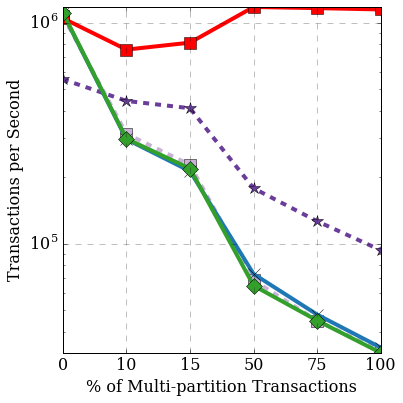

In [1340]:
#mprvar
def plot_ycsb_mprvar_qcd(combined,outfname, lat_lines):
    plt.figure(figsize=(6,6))
    plt.rc('grid', linestyle="--",alpha=0.5)
    plt.grid(True)
    us = 1000000
    pd.options.display.float_format = '{:,.2f}'.format
    grouped_f = combined
    algs = list(grouped_f.index.levels[0])
    thetavals = list(grouped_f.index.levels[1])

    pc =0
#     print(algs)
    # print(ztheta)
    doplot = True
    line_labels = []
    line_yvals = []
    line_xvals = []
    line_theta = []
    line2_yvals = []
    line2_xvals = []

    for latv in lat_lines:
#         print('preparing lat: {}'.format(latv))
        for a in algs:
            ll = a
            line_labels.append(ll)
            yvals = grouped_f.loc[a][latv]
#             if latv == 'tput':
#                 yvals = list(map(lambda x: x/1000000,yvals))
                
            line_yvals.append(yvals)
            thetavals = list(map(lambda x: int(x*100), thetavals))
            line_xvals.append(thetavals)

        
#     print(line_xvals)
#     print(line_yvals)
    ax = plt.subplot(111)
    lgds = [];
    # ax2 = ax.twinx()
    x_ticks = list(range(len(line_xvals[0])))
    ax2 = ax
    for i in range(len(line_labels)):
#     ax.plot(line_xvals[i],line_yvals[i], ls_tmp, label=line_labels[i])
        m = re.search('Lat', line_labels[i])
#         print(line_labels[i])
        if latv.find('ccl') != -1:
#             print('plotting lat')
            ls_tmp = ls_dict_lat[line_labels[i]]
            lgd_t, = ax.plot(x_ticks,line_yvals[i], marker=ls_tmp['marker'],linewidth=4.0, markersize=12, linestyle=ls_tmp['linestyle'], color=ls_tmp['color'], markeredgewidth=0.5,markeredgecolor='black',
                             label=fix_lgd_label(line_labels[i]))
            lgds.append(lgd_t)
    #         ax.set_xscale('log', basex=2)
            ax.set_yscale('log')
            ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.f'))
            ax.xaxis.set_tick_params(labelsize=g_label_size)
#             ax.yaxis.set_tick_params(labelsize=g_label_size)
            ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%,.d'))
            ax.set_ylabel('Seconds',fontsize=16)
            ax.set_xlabel(r'% of Multi-partition Transactions', fontsize=16)
            ax.margins(0.0)
            lgd = ax.legend(lgds,[p_.get_label() for p_ in lgds],loc=8,ncol=1, fontsize=12,
                            bbox_to_anchor=(0.58, 0.56, 0.4, 0.0), mode="expand")
        else:
#             print('plotting tput')
    #         ax2.set_ylim(0,3.2)
            ls_tmp = ls_dict[line_labels[i]]
            l, = ax2.plot(x_ticks,line_yvals[i], marker=ls_tmp['marker'],linewidth=4.0, markersize=12, linestyle=ls_tmp['linestyle'], color=ls_tmp['color'], markeredgewidth=0.5,markeredgecolor='black',
                          label=fix_lgd_label(line_labels[i]))
            lgds.append(l)
            ax2.set_yscale('log')
#             ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%4.1f'))
            ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.d'))
            ax2.xaxis.set_tick_params(labelsize=g_label_size)
            ax2.yaxis.set_tick_params(labelsize=g_label_size)
            ax2.set_xlabel(r'% of Multi-partition Transactions', fontsize=16)
            ax2.set_ylabel('Transactions per Second', fontsize=16) 
            ax2.margins(0.0)
#             lgd = ax.legend(lgds,[p_.get_label() for p_ in lgds],loc=8,ncol=2, fontsize=12,
#                             bbox_to_anchor=(0.25, 0.72, 0.75, 0.0), mode="expand")

    plt.xticks(x_ticks,line_xvals[0])
    plt.tight_layout()
#     plt.savefig(outfname,format='pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.savefig(outfname,format='pdf')
    
#mprvar
aggs_mprvar = {'tput':'mean', 'seq_no':'count','txn_run_avg_time':'mean','ccl50':'mean', 'ccl95':'mean', 'ccl99':'mean',
               'zipf_theta':'mean'}
ycsb_mprvar_df = ycsb_client_df[ycsb_client_df['zipf_theta'] == 0.0]
# ycsb_mprvar_df = ycsb_client_df[ycsb_client_df['zipf_theta'] == 0.8]
ycsb_mprvar_df = ycsb_mprvar_df[ycsb_mprvar_df['write_perc'] == 0.5]
ycsb_mprvar_df = ycsb_mprvar_df[ycsb_mprvar_df['ppt_cnt'] == 8]
ycsb_mprvar_df = ycsb_mprvar_df[ycsb_mprvar_df['req_cnt'] == 16]

ycsb_calvin_df = ycsb_mprvar_df[ycsb_mprvar_df['cc_alg'] == 'CALVIN']
ycsb_calvin200_df = ycsb_calvin_df[ycsb_calvin_df['seq_btimer'] == 200]
ycsb_calvin_df = ycsb_calvin_df[ycsb_calvin_df['seq_btimer'] == 5]
ycsb_calvin200_df['cc_alg'] = 'CALVIN-200'
# ycsb_thetavar_df = ycsb_thetavar_df[ycsb_thetavar_df['write_perc'] == 0.5]

ycsb_mprvar_df = ycsb_mprvar_df[ycsb_mprvar_df['write_perc'] == 0.5]
ycsb_mprvar_qc_df = ycsb_mprvar_df[ycsb_mprvar_df['cc_alg'] == 'QUECC']
ycsb_mprvar_df = ycsb_mprvar_df[ycsb_mprvar_df['cc_alg'] != 'QUECC']
ycsb_mprvar_qc_df = ycsb_mprvar_qc_df[ycsb_mprvar_qc_df['batch_size'] == 80640]

ycsb_mprvar_df  = pd.concat([ycsb_mprvar_df,ycsb_mprvar_qc_df, ycsb_calvin200_df, ycsb_calvin_df])

grp_indexes = ['cc_alg', 'mpr', 'write_perc']
grp_indexes = ['cc_alg', 'mpr', 'zipf_theta', 'ppt_cnt','batch_size','seq_btimer', 'write_perc', 'req_cnt', 'node_cnt']
l_aggs = {'tput':'mean', 'seq_no':'count','txn_run_avg_time':'mean','ccl50':'mean', 'ccl95':'mean', 'ccl99':'mean'}

lat_lines = ['ccl99']
outfname = '{}ycsb-mprvar-thetapt0-lat.pdf'.format(figoutdir)
# outfname = '{}ycsb-mprvar-thetapt8-lat.pdf'.format(figoutdir)
# outfname = '{}ycsb-mprvar-thetapt95-lat.pdf'.format(figoutdir)

lat_lines = ['tput']
outfname = '{}ycsb-mprvar-thetapt0-tput.pdf'.format(figoutdir)
# outfname = '{}ycsb-mprvar-thetapt8-tput.pdf'.format(figoutdir)
# outfname = '{}ycsb-mprvar-thetapt95-tput.pdf'.format(figoutdir)

gby = ycsb_mprvar_df.groupby(grp_indexes).agg(l_aggs)
# gby['trial_cnt'] = gby['seq_no']/16

plot_ycsb_mprvar_qcd(gby,outfname,lat_lines)

gby
# ycsb_mprvar_df[ycsb_mprvar_df['cc_alg'] == 'CALVIN'].columns.values

6.568184443606987

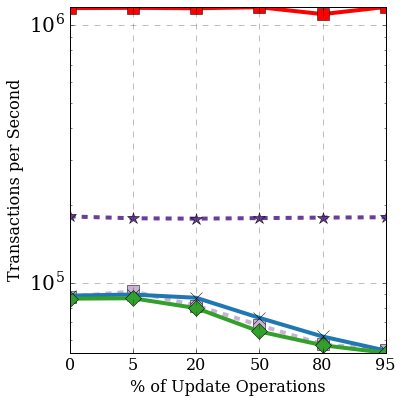

In [1341]:
#wprvar
import math;
def plot_ycsb_wprvar_qcd(combined,outfname, lat_lines):
    plt.figure(figsize=(6,6))
    plt.rc('grid', linestyle="--",alpha=0.5)
    plt.grid(True)
    us = 1000000
    pd.options.display.float_format = '{:,.2f}'.format
    grouped_f = combined
    algs = list(grouped_f.index.levels[0])
    thetavals = list(grouped_f.index.levels[1])

    pc =0
#     print(algs)
    # print(ztheta)
    doplot = True
    line_labels = []
    line_yvals = []
    line_xvals = []
    line_theta = []
    line2_yvals = []
    line2_xvals = []

    for latv in lat_lines:
#         print('preparing lat: {}'.format(latv))
        for a in algs:
            ll = a
            line_labels.append(ll)
            yvals = grouped_f.loc[a][latv]
            if latv == 'tput':
                yvals = list(map(lambda x: x,yvals))
                
            line_yvals.append(yvals)
            thetavals = list(map(lambda x: int(math.ceil((float(x))*100)), thetavals))
            thetavals = [0,5,20,50,80,95]
            line_xvals.append(thetavals)

        
#     print(line_xvals)
#     print(line_yvals)
    ax = plt.subplot(111)
    lgds = [];
    # ax2 = ax.twinx()
    x_ticks = list(range(len(line_xvals[0])))
    ax2 = ax
    for i in range(len(line_labels)):
#     ax.plot(line_xvals[i],line_yvals[i], ls_tmp, label=line_labels[i])
        m = re.search('Lat', line_labels[i])
#         print(line_labels[i])
        if latv.find('ccl') != -1:
#             print('plotting lat')
            ls_tmp = ls_dict_lat[line_labels[i]]
            lgd_t, = ax.plot(x_ticks,line_yvals[i], marker=ls_tmp['marker'], linewidth=4.0, markersize=12, linestyle=ls_tmp['linestyle'], color=ls_tmp['color'], markeredgewidth=0.5,markeredgecolor='black',
                             label=fix_lgd_label(line_labels[i]))
            lgds.append(lgd_t)
    #         ax.set_xscale('log', basex=2)
            ax.set_yscale('log')
#             ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.f'))
            ax.xaxis.set_tick_params(labelsize=g_label_size)
#             ax.yaxis.set_tick_params(labelsize=g_label_size)
            ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%,.d'))
            ax.set_ylabel('Seconds',fontsize=16)
            ax.set_xlabel(r'% of Update Operations', fontsize=16)
            ax.margins(0.0)
            lgd = ax.legend(lgds,[p_.get_label() for p_ in lgds],loc=8,ncol=1, fontsize=12,
                            bbox_to_anchor=(0.55, 0.55, 0.4, 0.0), mode="expand")
        else:
#             print('plotting tput')
    #         ax2.set_ylim(0,3.2)
            ls_tmp = ls_dict[line_labels[i]]
            l, = ax2.plot(x_ticks,line_yvals[i], marker=ls_tmp['marker'], linewidth=4.0, markersize=12, linestyle=ls_tmp['linestyle'], color=ls_tmp['color'], markeredgewidth=0.5,markeredgecolor='black',
                          label=fix_lgd_label(line_labels[i]))
            lgds.append(l)
            ax2.set_yscale('log')
#             ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%4.1f'))
            ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.d'))
            ax2.xaxis.set_tick_params(labelsize=g_label_size)
#             ax2.yaxis.set_tick_params(labelsize=g_label_size)
            ax2.set_xlabel(r'% of Update Operations', fontsize=16)
            ax2.set_ylabel('Transactions per Second', fontsize=16) 
            ax2.margins(0.0)
#             lgd = ax.legend(lgds,[p_.get_label() for p_ in lgds],loc=8,ncol=2, fontsize=12,
#                             bbox_to_anchor=(0.25, 0.72, 0.75, 0.0), mode="expand")

    plt.xticks(x_ticks,line_xvals[0])
    plt.tight_layout()
#     plt.savefig(outfname,format='pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.savefig(outfname,format='pdf')
    
#wprvar
aggs_wprvar = {'tput':'mean', 'seq_no':'count','txn_run_avg_time':'mean','ccl50':'mean', 'ccl95':'mean', 'ccl99':'mean',
               'zipf_theta':'mean'}
ycsb_wprvar_df = ycsb_client_df[ycsb_client_df['zipf_theta'] == 0.0]
ycsb_wprvar_df = ycsb_wprvar_df[ycsb_wprvar_df['mpr'] == 0.5]
# ycsb_wprvar_df = ycsb_client_df[ycsb_client_df['zipf_theta'] == 0.8]
ycsb_wprvar_df = ycsb_wprvar_df[ycsb_wprvar_df['ppt_cnt'] == 8]
ycsb_wprvar_df = ycsb_wprvar_df[ycsb_wprvar_df['req_cnt'] == 16]
ycsb_wprvar_qc_df = ycsb_wprvar_df[ycsb_wprvar_df['cc_alg'] == 'QUECC']
ycsb_wprvar_df = ycsb_wprvar_df[ycsb_wprvar_df['cc_alg'] != 'QUECC']
# ycsb_wprvar_df = ycsb_wprvar_df[ycsb_wprvar_df['cc_alg'] != 'MVCC']
# ycsb_wprvar_df = ycsb_wprvar_df[ycsb_wprvar_df['cc_alg'] != 'TIMESTAMP']
ycsb_wprvar_qc_df = ycsb_wprvar_qc_df[ycsb_wprvar_qc_df['batch_size'] == 80640]

ycsb_wprvar_df  = pd.concat([ycsb_wprvar_df,ycsb_wprvar_qc_df])

grp_indexes = ['cc_alg', 'write_perc', 'mpr']
grp_indexes = ['cc_alg','write_perc', 'mpr', 'zipf_theta', 'ppt_cnt','batch_size','seq_btimer', 'req_cnt', 'node_cnt']
l_aggs = {'tput':'mean', 'seq_no':'count','txn_run_avg_time':'mean','ccl50':'mean', 'ccl95':'mean', 'ccl99':'mean'}

lat_lines = ['ccl99']
outfname = '{}ycsb-wprvar-thetapt0-lat.pdf'.format(figoutdir)
# outfname = '{}ycsb-wprvar-thetapt8-lat.pdf'.format(figoutdir)
# outfname = '{}ycsb-wprvar-thetapt95-lat.pdf'.format(figoutdir)

lat_lines = ['tput']
outfname = '{}ycsb-wprvar-thetapt0-tput.pdf'.format(figoutdir)
# outfname = '{}ycsb-wprvar-thetapt8-tput.pdf'.format(figoutdir)
# outfname = '{}ycsb-mprvar-thetapt95-tput.pdf'.format(figoutdir)

gby = ycsb_wprvar_df.groupby(grp_indexes).agg(l_aggs)
# gby['trial_cnt'] = gby['seq_no']/16

plot_ycsb_wprvar_qcd(gby,outfname,lat_lines)

gby
# ycsb_wprvar_df
gby['tput'].sort_values(ascending=False)
s = (1179238.83)/179538.02
s

tput  \
cc_alg    ppt_cnt req_cnt write_perc mpr  zipf_theta batch_size seq_btimer node_cnt                
CALVIN    2       16      0.50       0.50 0.00       10368      0          16         454,473.89   
          4       16      0.50       0.50 0.00       10368      0          16         372,408.32   
          8       16      0.50       0.50 0.00       10368      0          16         178,145.03   
          12      16      0.50       0.50 0.00       10368      0          16         116,064.68   
          16      16      0.50       0.50 0.00       10368      0          16          85,813.56   
MVCC      2       16      0.50       0.50 0.00       10368      0          16         250,623.40   
          4       16      0.50       0.50 0.00       10368      0          16         119,416.27   
          8       16      0.50       0.50 0.00       10368      0          16          68,263.98   
          12      16      0.50       0.50 0.00       10368      0          16          59,053.41   
          16      16      0.50       0.50 0.00       10368      0          16          50,741.62   
NO_WAIT   2       16      0.50       0.50 0.00       10368      0          16         263,401.72   
          4       16      0.50       0.50 0.00       10368      0          16         122,676.58   
          8       16      0.50       0.50 0.00       10368      0          16          72,949.62   
          12      16      0.50       0.50 0.00       10368      0          16          60,729.81   
          16      16      0.50       0.50 0.00       10368      0          16          50,947.75   
QUECC     2       16      0.50       0.50 0.00       80640      0          16       1,038,176.42   
          4       16      0.50       0.50 0.00       80640      0          16       1,147,350.35   
          8       16      0.50       0.50 0.00       80640      0          16       1,177,333.21   
          12      16      0.50       0.50 0.00       80640      0          16       1,134,979.68   
          16      16      0.50       0.50 0.00       80640      0          16       1,152,030.77   
TIMESTAMP 2       16      0.50       0.50 0.00       10368      0          16         244,941.97   
          4       16      0.50       0.50 0.00       10368      0          16         117,793.07   
          8       16      0.50       0.50 0.00       10368      0          16          64,582.34   
          12      16      0.50       0.50 0.00       10368      0          16          57,980.35   
          16      16      0.50       0.50 0.00       10368      0          16          48,724.36   

                                                                                     seq_no  \
cc_alg    ppt_cnt req_cnt write_perc mpr  zipf_theta batch_size seq_btimer node_cnt           
CALVIN    2       16      0.50       0.50 0.00       10368      0          16             2   
          4       16      0.50       0.50 0.00       10368      0          16             2   
          8       16      0.50       0.50 0.00       10368      0          16             2   
          12      16      0.50       0.50 0.00       10368      0          16             2   
          16      16      0.50       0.50 0.00       10368      0          16             2   
MVCC      2       16      0.50       0.50 0.00       10368      0          16             2   
          4       16      0.50       0.50 0.00       10368      0          16             2   
          8       16      0.50       0.50 0.00       10368      0          16             2   
          12      16      0.50       0.50 0.00       10368      0          16             2   
          16      16      0.50       0.50 0.00       10368      0          16             2   
NO_WAIT   2       16      0.50       0.50 0.00       10368      0          16             2   
          4       16      0.50       0.50 0.00       10368      0          16             2   
          8       16      0.50       0.50 0.00       10368   

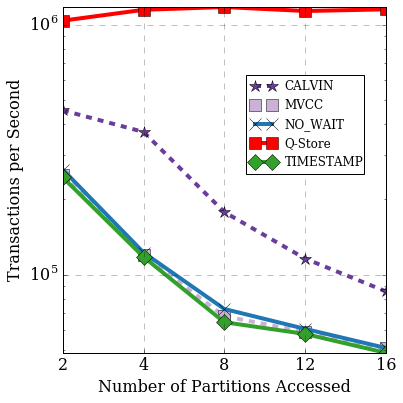

In [1337]:
#pptvar
def plot_ycsb_pptvar_qcd(combined,outfname, lat_lines):
    plt.figure(figsize=(6,6))
    plt.rc('grid', linestyle="--",alpha=0.5)
    plt.grid(True)
    us = 1000000
    pd.options.display.float_format = '{:,.2f}'.format
    grouped_f = combined
    algs = list(grouped_f.index.levels[0])
    thetavals = list(grouped_f.index.levels[1])

    pc =0
#     print(algs)
    # print(ztheta)
    doplot = True
    line_labels = []
    line_yvals = []
    line_xvals = []
    line_theta = []
    line2_yvals = []
    line2_xvals = []

    for latv in lat_lines:
#         print('preparing lat: {}'.format(latv))
        for a in algs:
            ll = a
            line_labels.append(ll)
            yvals = grouped_f.loc[a][latv]
#             if latv == 'tput':
#                 yvals = list(map(lambda x: x/1000000,yvals))
                
            line_yvals.append(yvals)
            thetavals = list(map(lambda x: int((float(x))), thetavals))
            line_xvals.append(thetavals)

        
#     print(line_xvals)
#     print(line_yvals)
    ax = plt.subplot(111)
    lgds = [];
    # ax2 = ax.twinx()
    x_ticks = list(range(len(line_xvals[0])))
    ax2 = ax
    for i in range(len(line_labels)):
#     ax.plot(line_xvals[i],line_yvals[i], ls_tmp, label=line_labels[i])
        m = re.search('Lat', line_labels[i])
#         print(line_labels[i])
        if latv.find('ccl') != -1:
#             print('plotting lat')
            ls_tmp = ls_dict_lat[line_labels[i]]
            lgd_t, = ax.plot(x_ticks,line_yvals[i], linewidth=4.0, marker=ls_tmp['marker'], markersize=12, linestyle=ls_tmp['linestyle'], color=ls_tmp['color'], markeredgewidth=0.5,markeredgecolor='black',
                             label=fix_lgd_label(line_labels[i]))
            lgds.append(lgd_t)
    #         ax.set_xscale('log', basex=2)
            ax.set_yscale('log')
#             ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.f'))
            ax.xaxis.set_tick_params(labelsize=g_label_size)
#             ax.yaxis.set_tick_params(labelsize=g_label_size)
            ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%,.d'))
            ax.set_ylabel('Seconds',fontsize=16)
            ax.set_xlabel(r'Number of Partitions Accessed', fontsize=16)
            ax.margins(0.0)
#             lgd = ax.legend(lgds,[p_.get_label() for p_ in lgds],loc=8,ncol=1, fontsize=12,
#                             bbox_to_anchor=(0.01, 0.5, 0.4, 0.0), mode="expand")
        else:
#             print('plotting tput')
    #         ax2.set_ylim(0,3.2)
            ls_tmp = ls_dict[line_labels[i]]
            l, = ax2.plot(x_ticks,line_yvals[i], linewidth=4.0, marker=ls_tmp['marker'], markersize=12, linestyle=ls_tmp['linestyle'], color=ls_tmp['color'], markeredgewidth=0.5,markeredgecolor='black',
                          label=fix_lgd_label(line_labels[i]))
            lgds.append(l)
            ax2.set_yscale('log')
#             ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%4.1f'))
            ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.d'))
            ax2.xaxis.set_tick_params(labelsize=g_label_size)
            ax2.yaxis.set_tick_params(labelsize=g_label_size)
            ax2.set_xlabel(r'Number of Partitions Accessed', fontsize=16)
            ax2.set_ylabel('Transactions per Second', fontsize=16) 
            ax2.margins(0.0)
            lgd = ax.legend(lgds,[p_.get_label() for p_ in lgds],loc=8,ncol=1, fontsize=12,
                            bbox_to_anchor=(0.55, 0.5, 0.4, 0.0), mode="expand")

    plt.xticks(x_ticks,line_xvals[0])
    plt.tight_layout()
#     plt.savefig(outfname,format='pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.savefig(outfname,format='pdf')
    
#wprvar
aggs_pptvar = {'tput':'mean', 'seq_no':'count','txn_run_avg_time':'mean','ccl50':'mean', 'ccl95':'mean', 'ccl99':'mean',
               'zipf_theta':'mean'}
ycsb_pptvar_df = ycsb_client_df[ycsb_client_df['zipf_theta'] == 0.0]
ycsb_pptvar_df = ycsb_pptvar_df[ycsb_pptvar_df['mpr'] == 0.5]
ycsb_pptvar_df = ycsb_pptvar_df[ycsb_pptvar_df['write_perc'] == 0.5]
ycsb_pptvar_df = ycsb_pptvar_df[ycsb_pptvar_df['req_cnt'] == 16]
ycsb_pptvar_df = ycsb_pptvar_df[ycsb_pptvar_df['seq_btimer'] == 0]


# ycsb_optvar_df = ycsb_client_df[ycsb_client_df['zipf_theta'] == 0.8]
ycsb_pptvar_qc_df = ycsb_pptvar_df[ycsb_pptvar_df['cc_alg'] == 'QUECC']
ycsb_pptvar_df = ycsb_pptvar_df[ycsb_pptvar_df['cc_alg'] != 'QUECC']
ycsb_pptvar_qc_df = ycsb_pptvar_qc_df[ycsb_pptvar_qc_df['batch_size'] == 80640]

ycsb_pptvar_df  = pd.concat([ycsb_pptvar_df,ycsb_pptvar_qc_df])

grp_indexes = ['cc_alg', 'ppt_cnt','req_cnt','write_perc', 'mpr', 'zipf_theta', 'batch_size','seq_btimer', 'node_cnt']
lat_lines = ['ccl99']
outfname = '{}ycsb-pptvar-thetapt0-lat.pdf'.format(figoutdir)
# outfname = '{}ycsb-pptvar-thetapt8-lat.pdf'.format(figoutdir)
# outfname = '{}ycsb-pptvar-thetapt95-lat.pdf'.format(figoutdir)

lat_lines = ['tput']
outfname = '{}ycsb-pptvar-thetapt0-tput.pdf'.format(figoutdir)
# outfname = '{}ycsb-pptvar-thetapt8-tput.pdf'.format(figoutdir)
# outfname = '{}ycsb-pptvar-thetapt95-tput.pdf'.format(figoutdir)

gby = ycsb_pptvar_df.groupby(grp_indexes).agg(aggs_pptvar)
# gby['trial_cnt'] = gby['seq_no']/16

plot_ycsb_pptvar_qcd(gby,outfname,lat_lines)

gby
# ycsb_wprvar_df
# gby['tput'].sort_values(ascending=False)
# s = (2358477.67)/359076.05
# s

otput  \
cc_alg    req_cnt write_perc mpr  zipf_theta ppt_cnt seq_btimer batch_size                 
CALVIN    1       0.50       0.50 0.00       1       0          10368         873,924.91   
          2       0.50       0.50 0.00       2       0          10368       1,504,422.68   
          4       0.50       0.50 0.00       4       0          10368       2,101,149.63   
          8       0.50       0.50 0.00       8       0          10368       1,543,118.20   
          10      0.50       0.50 0.00       10      0          10368       1,518,261.58   
          16      0.50       0.50 0.00       16      0          10368       1,373,016.93   
MVCC      1       0.50       0.50 0.00       1       0          10368       1,176,919.20   
          2       0.50       0.50 0.00       2       0          10368       1,091,858.57   
          4       0.50       0.50 0.00       4       0          10368         965,070.20   
          8       0.50       0.50 0.00       8       0          10368         755,679.60   
          10      0.50       0.50 0.00       10      0          10368         810,438.25   
          16      0.50       0.50 0.00       16      0          10368         811,866.00   
NO_WAIT   1       0.50       0.50 0.00       1       0          10368       1,201,227.99   
          2       0.50       0.50 0.00       2       0          10368       1,168,254.92   
          4       0.50       0.50 0.00       4       0          10368         954,126.47   
          8       0.50       0.50 0.00       8       0          10368         836,931.53   
          10      0.50       0.50 0.00       10      0          10368         848,996.91   
          16      0.50       0.50 0.00       16      0          10368         815,164.00   
QUECC     1       0.50       0.50 0.00       1       0          80640       1,184,395.23   
          2       0.50       0.50 0.00       2       0          80640       1,589,189.11   
          4       0.50       0.50 0.00       4       0          80640       3,342,432.86   
          8       0.50       0.50 0.00       8       0          80640       8,688,672.25   
          10      0.50       0.50 0.00       10      0          80640      10,871,823.47   
          16      0.50       0.50 0.00       16      0          80640      18,432,492.26   
TIMESTAMP 1       0.50       0.50 0.00       1       0          10368       1,170,715.02   
          2       0.50       0.50 0.00       2       0          10368         907,703.57   
          4       0.50       0.50 0.00       4       0          10368         930,433.77   
          8       0.50       0.50 0.00       8       0          10368         761,539.40   
          10      0.50       0.50 0.00       10      0          10368         825,821.75   
          16      0.50       0.50 0.00       16      0          10368         779,589.73   

                                                                                   tput  \
cc_alg    req_cnt write_perc mpr  zipf_theta ppt_cnt seq_btimer batch_size                
CALVIN    1       0.50       0.50 0.00       1       0          10368        873,924.91   
          2       0.50       0.50 0.00       2       0          10368        752,211.34   
          4       0.50       0.50 0.00       4       0          10368        525,287.41   
          8       0.50       0.50 0.00       8       0          10368        192,889.77   
          10      0.50       0.50 0.00       10      0          10368        151,826.16   
          16      0.50       0.50 0.00       16      0          10368         85,813.56   
MVCC      1       0.50       0.50 0.00       1       0          10368      1,176,919.20   
          2       0.50       0.50 0.00       2       0          10368        545,929.28   
          4       0.50       0.50 0.00       4       0          10368        241,267.55   
          8       0.50       0.50 0.00       8       0          10368         94,459.95   
          10      0.50       0.50 0.00       1

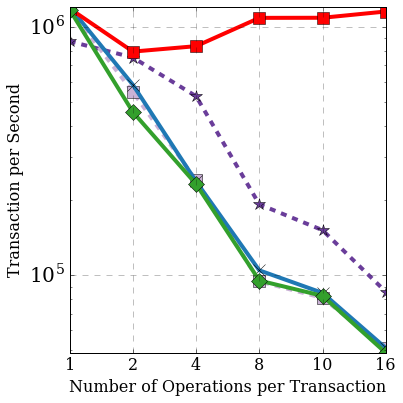

In [1329]:
#optvar
def plot_ycsb_optvar_qcd(combined,outfname, lat_lines):
    plt.figure(figsize=(6,6))
    plt.rc('grid', linestyle="--",alpha=0.5)
    plt.grid(True)
    us = 1000000
    pd.options.display.float_format = '{:,.2f}'.format
    grouped_f = combined
    algs = list(grouped_f.index.levels[0])
    thetavals = list(grouped_f.index.levels[1])

    pc =0
#     print(algs)
    # print(ztheta)
    doplot = True
    line_labels = []
    line_yvals = []
    line_xvals = []
    line_theta = []
    line2_yvals = []
    line2_xvals = []

    for latv in lat_lines:
#         print('preparing lat: {}'.format(latv))
        for a in algs:
            ll = a
            line_labels.append(ll)
            yvals = grouped_f.loc[a][latv]
#             if latv == 'tput':
#                 yvals = list(map(lambda x: x/1000000,yvals))
                
            line_yvals.append(yvals)
            thetavals = list(map(lambda x: int(x), thetavals))
            line_xvals.append(thetavals)

        
#     print(line_xvals)
#     print(line_yvals)
    ax = plt.subplot(111)
    lgds = [];
    # ax2 = ax.twinx()
    x_ticks = list(range(len(line_xvals[0])))
    ax2 = ax
    for i in range(len(line_labels)):
#     ax.plot(line_xvals[i],line_yvals[i], ls_tmp, label=line_labels[i])
        m = re.search('Lat', line_labels[i])
#         print(line_labels[i])
        if latv.find('ccl') != -1:
#             print('plotting lat')
            ls_tmp = ls_dict_lat[line_labels[i]]
            lgd_t, = ax.plot(x_ticks,line_yvals[i], marker=ls_tmp['marker'], linewidth=4.0, markersize=12, linestyle=ls_tmp['linestyle'], color=ls_tmp['color'], markeredgewidth=0.5,markeredgecolor='black',
                             label=fix_lgd_label(line_labels[i]))
            lgds.append(lgd_t)
    #         ax.set_xscale('log', basex=2)
            ax.set_yscale('log')
#             ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.f'))
            ax.xaxis.set_tick_params(labelsize=g_label_size)
#             ax.yaxis.set_tick_params(labelsize=g_label_size)
            ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%,.d'))
            ax.set_ylabel('Seconds',fontsize=16)
            ax.set_xlabel(r'Number of Operations per Transaction', fontsize=16)
            ax.margins(0.0)
            lgd = ax.legend(lgds,[p_.get_label() for p_ in lgds],loc=8,ncol=1, fontsize=12,
                            bbox_to_anchor=(0.55, 0.05, 0.4, 0.0), mode="expand")
        else:
#             print('plotting tput')
    #         ax2.set_ylim(0,3.2)
            ls_tmp = ls_dict[line_labels[i]]
            l, = ax2.plot(x_ticks,line_yvals[i], marker=ls_tmp['marker'], linewidth=4.0, markersize=12, linestyle=ls_tmp['linestyle'], color=ls_tmp['color'], markeredgewidth=0.5,markeredgecolor='black',
                          label=fix_lgd_label(line_labels[i]))
            lgds.append(l)
            ax2.set_yscale('log')
#             ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%4.1f'))
            ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.d'))
            ax2.xaxis.set_tick_params(labelsize=g_label_size)
#             ax2.yaxis.set_tick_params(labelsize=g_label_size)
            ax2.set_xlabel(r'Number of Operations per Transaction', fontsize=16)
            ax2.set_ylabel('Transaction per Second', fontsize=16) 
            ax2.margins(0.0)
#             lgd = ax.legend(lgds,[p_.get_label() for p_ in lgds],loc=8,ncol=2, fontsize=12,
#                             bbox_to_anchor=(0.25, 0.72, 0.75, 0.0), mode="expand")

    plt.xticks(x_ticks,line_xvals[0])
    plt.tight_layout()
#     plt.savefig(outfname,format='pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.savefig(outfname,format='pdf')
    
#wprvar
aggs_optvar = {'tput':'mean', 'seq_no':'count','txn_run_avg_time':'mean','ccl50':'mean', 'ccl95':'mean', 'ccl99':'mean'}

aggs_optvar_f = {'otput':'mean','tput':'mean', 'seq_no':'mean','txn_run_avg_time':'mean','ccl50':'mean', 'ccl95':'mean', 'ccl99':'mean'}

ycsb_optvar_df = ycsb_client_df[ycsb_client_df['zipf_theta'] == 0.0]
ycsb_optvar_df = ycsb_optvar_df[ycsb_optvar_df['mpr'] == 0.5]
ycsb_optvar_df = ycsb_optvar_df[ycsb_optvar_df['write_perc'] == 0.5]
ycsb_optvar_df = ycsb_optvar_df[ycsb_optvar_df['seq_btimer'] == 0]
# ycsb_optvar_df = ycsb_client_df[ycsb_client_df['zipf_theta'] == 0.8]

ycsb_optvar_df = ycsb_optvar_df[ycsb_optvar_df['ppt_cnt'] == ycsb_optvar_df['req_cnt'] ]
ycsb_optvar_qc_df = ycsb_optvar_df[ycsb_optvar_df['cc_alg'] == 'QUECC']
ycsb_optvar_calvin_df = ycsb_optvar_df[ycsb_optvar_df['cc_alg'] == 'CALVIN']

# ycsb_optvar_df = ycsb_optvar_df[(ycsb_optvar_df['cc_alg'] == 'CALVIN') & (ycsb_optvar_df['batch'] == 'CALVIN') & ycsb_optvar_df['cc_alg'] == 'CALVIN']
ycsb_optvar_df = ycsb_optvar_df[ycsb_optvar_df['cc_alg'] != 'QUECC']
ycsb_optvar_df = ycsb_optvar_df[ycsb_optvar_df['cc_alg'] != 'CALVIN']
ycsb_optvar_qc_df = ycsb_optvar_qc_df[ycsb_optvar_qc_df['batch_size'] == 80640]

ycsb_optvar_df  = pd.concat([ycsb_optvar_df,ycsb_optvar_qc_df,ycsb_optvar_calvin_df])

grp_indexes = ['cc_alg', 'req_cnt', 'mpr']
grp_indexes = ['cc_alg', 'req_cnt','write_perc', 'mpr', 'zipf_theta', 'ppt_cnt','seq_btimer', 'batch_size']

lat_lines = ['ccl99']
outfname = '{}ycsb-optvar-thetapt0-lat.pdf'.format(figoutdir)
# outfname = '{}ycsb-optvar-thetapt8-lat.pdf'.format(figoutdir)
# outfname = '{}ycsb-optvar-thetapt95-lat.pdf'.format(figoutdir)

lat_lines = ['tput']
outfname = '{}ycsb-optvar-thetapt0-tput.pdf'.format(figoutdir)
# outfname = '{}ycsb-optvar-thetapt8-tput.pdf'.format(figoutdir)
# outfname = '{}ycsb-optvar-thetapt95-tput.pdf'.format(figoutdir)
ycsb_optvar_df = ycsb_optvar_df.groupby(grp_indexes, as_index=False).agg(aggs_optvar)
ycsb_optvar_df['otput'] = ycsb_optvar_df['tput']*ycsb_optvar_df['req_cnt']
gby = ycsb_optvar_df.groupby(grp_indexes).agg(aggs_optvar_f)
# gby['trial_cnt'] = gby['seq_no']/16
# gby['tput2'] = gby['tput']*gby['req_cnt']

plot_ycsb_optvar_qcd(gby,outfname,lat_lines)

gby
# ycsb_optvar_df
# ycsb_client_df
# gby['tput'].sort_values(ascending=False)
# s = (2358477.67)/359076.05
# s
# ycsb_optvar_calvin_df[['cc_alg','batch_size', 'req_cnt','tput', 'seq_no']].sort_values(ascending=True, by='req_cnt')

tput  seq_no  \
cc_alg    node_cnt zipf_theta ppt_cnt mpr  req_cnt                        
CALVIN    2        0.00       2       0.50 16         69,998.97       2   
          4        0.00       4       0.50 16        108,284.50       2   
          8        0.00       8       0.50 16        122,401.94       2   
          16       0.00       16      0.50 16         81,597.89       2   
MVCC      2        0.00       2       0.50 16         58,229.47       2   
          4        0.00       4       0.50 16         37,593.23       2   
          8        0.00       8       0.50 16         40,541.73       2   
          16       0.00       16      0.50 16         38,880.73       2   
NO_WAIT   2        0.00       2       0.50 16         63,031.02       2   
          4        0.00       4       0.50 16         43,722.45       2   
          8        0.00       8       0.50 16         44,170.58       2   
          16       0.00       16      0.50 16         44,649.51       2   
QUECC     2        0.00       2       0.50 16        107,173.46       2   
          4        0.00       4       0.50 16        400,413.03       2   
          8        0.00       8       0.50 16        721,859.04       2   
          16       0.00       16      0.50 16      1,144,768.54       2   
TIMESTAMP 2        0.00       2       0.50 16         55,461.40       2   
          4        0.00       4       0.50 16         34,465.65       2   
          8        0.00       8       0.50 16         40,576.19       2   
          16       0.00       16      0.50 16         39,309.37       2   

                                                    txn_run_avg_time  ccl50  \
cc_alg    node_cnt zipf_theta ppt_cnt mpr  req_cnt                            
CALVIN    2        0.00       2       0.50 16                   1.20   1.08   
          4        0.00       4       0.50 16                   1.58   1.24   
          8        0.00       8       0.50 16                   2.75   2.63   
          16       0.00       16      0.50 16                   8.31   7.03   
MVCC      2        0.00       2       0.50 16                   1.52   1.12   
          4        0.00       4       0.50 16                   5.67   4.59   
          8        0.00       8       0.50 16                  10.72   7.98   
          16       0.00       16      0.50 16                  19.27  10.02   
NO_WAIT   2        0.00       2       0.50 16                   1.32   1.10   
          4        0.00       4       0.50 16                   4.61   3.66   
          8        0.00       8       0.50 16                   9.92   7.97   
          16       0.00       16      0.50 16                  17.20   9.85   
QUECC     2        0.00       2       0.50 16                   0.77   0.91   
          4        0.00       4       0.50 16                   3.22   3.22   
          8        0.00       8       0.50 16                   3.58   3.57   
          16       0.00       16      0.50 16                   4.51   4.50   
TIMESTAMP 2        0.00       2       0.50 16                   1.65   1.16   
          4        0.00       4       0.50 16                   6.25   4.88   
          8        0.00       8       0.50 16                  10.66   7.40   
          16       0.00       16      0.50 16                  19.18   9.86   

                                                    ccl95  ccl99  
cc_alg    node_cnt zipf_theta ppt_cnt mpr  req_cnt                
CALVIN    2        0.00       2       0.50 16        1.37   1.37  
          4        0.00       4       0.50 16        2.00   2.02  
          8        0.00       8       0.50 16        3.39   3.59  
          16       0.00       16      0.50 16       11.85  12.31  
MVCC      2        0.00       2       0.50 16        4.53   7.78  
          4        0.00       4       0.50 16       15.29  23.99  
          8        0.00       8       0.50 16       31.29  41.40  
          16       0.00       16      0.50 16       59.62  74.06  

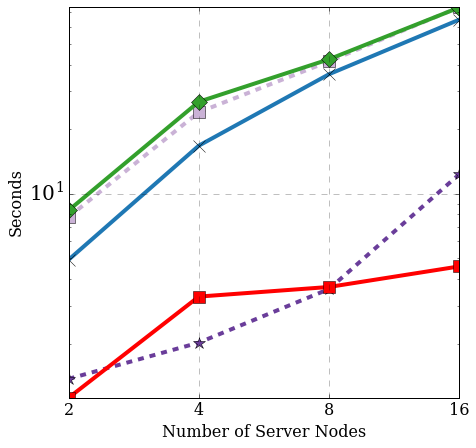

In [1180]:
#ncrvar
def plot_ycsb_ncvar_qcd(combined,outfname, lat_lines):
    plt.figure(figsize=(7,7))
    plt.rc('grid', linestyle="--",alpha=0.5)
    plt.grid(True)
    us = 1000000
    pd.options.display.float_format = '{:,.2f}'.format
    grouped_f = combined
    algs = list(grouped_f.index.levels[0])
    thetavals = list(grouped_f.index.levels[1])

    pc =0
#     print(algs)
    # print(ztheta)
    doplot = True
    line_labels = []
    line_yvals = []
    line_xvals = []
    line_theta = []
    line2_yvals = []
    line2_xvals = []

    for latv in lat_lines:
#         print('preparing lat: {}'.format(latv))
        for a in algs:
            ll = a
            line_labels.append(ll)
            yvals = grouped_f.loc[a][latv]
#             if latv == 'tput':
#                 yvals = list(map(lambda x: x/1000000,yvals))
                
            line_yvals.append(yvals)
#             thetavals = list(map(lambda x: int((float(x))), thetavals))
            line_xvals.append(thetavals)

        
#     print(line_xvals)
#     print(line_yvals)
    ax = plt.subplot(111)
    lgds = [];
    # ax2 = ax.twinx()
    x_ticks = list(range(len(line_xvals[0])))
    ax2 = ax
    for i in range(len(line_labels)):
#     ax.plot(line_xvals[i],line_yvals[i], ls_tmp, label=line_labels[i])
        m = re.search('Lat', line_labels[i])
#         print(line_labels[i])
        if latv.find('ccl') != -1:
#             print('plotting lat')
            ls_tmp = ls_dict_lat[line_labels[i]]
            lgd_t, = ax.plot(x_ticks,line_yvals[i],linewidth=4.0, marker=ls_tmp['marker'], markersize=12, linestyle=ls_tmp['linestyle'], color=ls_tmp['color'], markeredgewidth=0.5,markeredgecolor='black',
                             label=fix_lgd_label(line_labels[i]))
            lgds.append(lgd_t)
    #         ax.set_xscale('log', basex=2)
            ax.set_yscale('log')
#             ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.f'))
            ax.xaxis.set_tick_params(labelsize=g_label_size)
#             ax.yaxis.set_tick_params(labelsize=g_label_size)
            ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%,.d'))
            ax.set_ylabel('Seconds',fontsize=16)
            ax.set_xlabel(r'Number of Server Nodes', fontsize=16)
            ax.margins(0.0)
        else:
#             print('plotting tput')
    #         ax2.set_ylim(0,3.2)
            ls_tmp = ls_dict[line_labels[i]]
            l, = ax2.plot(x_ticks,line_yvals[i], linewidth=4.0, marker=ls_tmp['marker'], markersize=12, linestyle=ls_tmp['linestyle'], color=ls_tmp['color'], markeredgewidth=0.5,markeredgecolor='black',
                          label=fix_lgd_label(line_labels[i]))
            lgds.append(l)
            ax2.set_yscale('log')
#             ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%4.1f'))
            ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.d'))
            ax2.xaxis.set_tick_params(labelsize=g_label_size)
#             ax2.yaxis.set_tick_params(labelsize=g_label_size)
            ax2.set_xlabel(r'Number of Server Nodes', fontsize=16)
            ax2.set_ylabel('Transactions per Second', fontsize=16) 
            ax2.margins(0.0)
            lgd = ax.legend(lgds,[p_.get_label() for p_ in lgds],loc=8,ncol=1, fontsize=12,
                bbox_to_anchor=(0.55, 0.45, 0.4, 0.0), mode="expand")
#             lgd = ax.legend(lgds,[p_.get_label() for p_ in lgds],loc=8,ncol=2, fontsize=12,
#                             bbox_to_anchor=(0.25, 0.72, 0.75, 0.0), mode="expand")

    plt.xticks(x_ticks,line_xvals[0])
#     plt.savefig(outfname,format='pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.savefig(outfname,format='pdf')
    
#ncrvar
aggs_ncrvar = {'tput':'mean', 'seq_no':'count','txn_run_avg_time':'mean','ccl50':'mean', 'ccl95':'mean', 'ccl99':'mean'}

test_res_dir = '/Users/qadahtm/Dev/halstead/deneva_project/qcd-results/exp_results_su'
ycsb_dir_df = pd.DataFrame(parse_directory_expdb(test_res_dir))
#exclude Maat and Wait-Die for now
ycsb_dir_df = ycsb_dir_df[ycsb_dir_df['cc_alg'] != 'MAAT']
ycsb_dir_df = ycsb_dir_df[ycsb_dir_df['cc_alg'] != 'WAIT_DIE']

ycsb_server_df = ycsb_dir_df[ycsb_dir_df['node_type'] == 'Server']
ycsb_client_su_df = ycsb_dir_df[ycsb_dir_df['node_type'] == 'Client']


ycsb_ncvar_df = ycsb_client_su_df[ycsb_client_su_df['zipf_theta'] == 0.0]
# ycsb_ncvar_df = ycsb_ncvar_df[ycsb_ncvar_df['mpr'] == 0.5]
# ycsb_ncrvar_df = ycsb_ncrvar_df[ycsb_ncrvar_df['zipf_theta'] == 0.8]
ycsb_ncvar_df = ycsb_ncvar_df[ycsb_ncvar_df['ppt_cnt'] == ycsb_ncvar_df['node_cnt']]
# ycsb_ncvar_df = ycsb_ncvar_df[ycsb_ncvar_df['ppt_cnt'] == 2]
ycsb_ncvar_qc_df = ycsb_ncvar_df[ycsb_ncvar_df['cc_alg'] == 'QUECC']
ycsb_ncvar_df = ycsb_ncvar_df[ycsb_ncvar_df['cc_alg'] != 'QUECC']
# ycsb_ncvar_qc_df = ycsb_ncvar_qc_df[(ycsb_ncvar_qc_df['batch_size'] == 80640)]
# ycsb_ncvar_df['trial_factor'] = ycsb_ncvar_df['node_cnt']

ycsb_ncvar_df  = pd.concat([ycsb_ncvar_df,ycsb_ncvar_qc_df])

grp_indexes = ['cc_alg', 'node_cnt', 'zipf_theta', 'ppt_cnt', 'mpr', 'req_cnt']
lat_lines = ['ccl99']
outfname = '{}ycsb-ncvar-thetapt0-lat.pdf'.format(figoutdir)
# outfname = '{}ycsb-ncvar-thetapt8-lat.pdf'.format(figoutdir)
# outfname = '{}ycsb-ncvar-thetapt95-lat.pdf'.format(figoutdir)

# lat_lines = ['tput']
# outfname = '{}ycsb-ncvar-thetapt0-tput.pdf'.format(figoutdir)
# outfname = '{}ycsb-ncvar-thetapt8-tput.pdf'.format(figoutdir)
# outfname = '{}ycsb-ncvar-thetapt95-tput.pdf'.format(figoutdir)


# ycsb_ncvar_df = ycsb_ncvar_df[ycsb_ncvar_df['cc_alg'] == 'CALVIN']
# ycsb_ncvar_df = ycsb_ncvar_df[ycsb_ncvar_df['node_cnt'] == 4]

gby = ycsb_ncvar_df.groupby(grp_indexes).agg(aggs_ncrvar)
# gby['trial_cnt'] = gby['seq_no']/gby['trial_factor']


plot_ycsb_ncvar_qcd(gby,outfname,lat_lines)

gby

# ycsb_ncvar_df['seq_no']
# gby['tput'].sort_values(ascending=False)
# s = (2358477.67)/359076.05
# s

In [527]:
# TPCC
# path = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_all_tpcc_wh1_pp100"
# tpcc_df = init_df(path);

# path = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_all_tpcc_wh1_pp50"
# tpcc_df = init_df(path);


#Pay Perc. 0%
# path = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_all_tpcc_wh1_pp0"
# tpcc_df = init_df(path);
# tpcc_df = tpcc_df[tpcc_df['cc_alg'] != 'FOEDUS-MOCC-REF']

# path = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_foedus_rerun_tpcc_wh1_pp0"
# tpcc_df = join_df(tpcc_df,path);
path = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_all_tpcc_wt32_wh32_pp0"
tpcc_df = init_df(path);

# #Pay Perc. 50%
# path = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_all_tpcc_wh1_pp50"
# tpcc_df = init_df(path);
# tpcc_df = tpcc_df[tpcc_df['cc_alg'] != 'FOEDUS-MOCC-REF']

# path = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_foedus_rerun_tpcc_wh1_pp50"
# tpcc_df = join_df(tpcc_df,path);

# path = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_all_tpcc_wh32_pp50"
# tpcc_df = init_df(path);

#Pay Perc. 100%
# path = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_all_tpcc_wh1_pp100"
# tpcc_df = init_df(path);
# tpcc_df = tpcc_df[tpcc_df['cc_alg'] != 'FOEDUS-MOCC-REF']

# path = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_foedus_rerun_tpcc_wh1_pp100"
# tpcc_df = join_df(tpcc_df,path);

# path = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/exp_data_all_tpcc_wh32_pp100"
# tpcc_df = init_df(path);

combined = tpcc_df



combined['abort_perc'] = (combined['abort_cnt'])/(combined['abort_cnt']+combined['txn_cnt'])
combined['abort_rate'] = 0.0
# combined.loc[combined['cc_alg'] == 'QUECC','abort_rate'] = 0.0
# combined.loc[combined['cc_alg'] == 'QUECC','abort_perc'] = 0.0
agg_req_normal = {'tput':'mean','abort_perc':'mean', 'abort_cnt':'mean', 'txn_cnt':'mean', 'avg_lat':'mean', '95th_lat':'mean', 'seq_no':'count'}
# grp_indexes = ['cc_alg','batch_size', 'rec_size', 'worker_cnt','zipf_theta','write_perc','req_cnt']
grp_indexes = ['cc_alg']

combined = combined[combined['worker_cnt'] == 32]
# combined = combined[combined['cc_alg'] != 'QUECC']

grouped_f = combined.groupby(grp_indexes).agg(agg_req_normal)

figoutdir = '/Users/qadahtm/Google Drive/MBP2/PhDResearch/QueCC/cicada_paper_figs/'

combined

#0% Payment
# outfname = '{}tpcc-wt32-wh1-pp0-GS32.pdf'.format(figoutdir)
# plot_barh_tpcc_wt32(combined,outfname)

# outfname = '{}tpcc-wt32-wh1-pp0-arate-GS32.pdf'.format(figoutdir)
# plot_barh_tpcc_wt32(combined,outfname,True)

outfname = '{}tpcc-wt32-wh32-pp0-GS32.pdf'.format(figoutdir)
plot_barh_tpcc_wt32(combined,outfname)

#50% Payment
# outfname = '{}tpcc-wt32-wh1-pp50-GS32.pdf'.format(figoutdir)
# plot_barh_tpcc_wt32(combined,outfname)

# outfname = '{}tpcc-wt32-wh1-pp50-arate-GS32.pdf'.format(figoutdir)
# plot_barh_tpcc_wt32(combined,outfname,True)

# outfname = '{}tpcc-wt32-wh32-pp50-GS32.pdf'.format(figoutdir)
# plot_barh_tpcc_wt32(combined,outfname)


#100% Payment
# outfname = '{}tpcc-wt32-wh1-pp100-GS32.pdf'.format(figoutdir)
# plot_barh_tpcc_wt32(combined,outfname)

# outfname = '{}tpcc-wt32-wh1-pp100-arate-GS32.pdf'.format(figoutdir)
# plot_barh_tpcc_wt32(combined,outfname,True)

# outfname = '{}tpcc-wt32-wh32-pp100-GS32.pdf'.format(figoutdir)
# plot_barh_tpcc_wt32(combined,outfname)


grouped_f
# list(grouped_f.index.get_level_values(0))
# combined.groupby(['cc_alg'])['tput'].mean().plot(kind='bar', colormap='Paired')
# list(grouped_f['tput'])
# grouped_f['tput'].sort_values(ascending=False)
# d=4.47/1.67
# d

ValueError: arrays must all be same length

17.886335
3


,exec_batch_part_proc_time,exec_batch_proc_time,exec_entry_deq_time,exec_eq_range_check_time,exec_eq_swtich_time,exec_idle_time,exec_mem_free_time,exec_txn_commit_time,exec_txn_index_lookup_time,exec_txn_proc_time,...,plan_txn_process_time,plan_wait_time,wt_hl_cleanup_time,wt_hl_commit_time,wt_hl_exec_time,wt_hl_plan_time,wt_hl_sync_commit_time,wt_hl_sync_exec_time,wt_hl_sync_plan_time,wt_pg_sync_exec_time
0,0.0,17.886641,0.000680,0.018320,0.024199,0.002086,0.008983,0.786252,0.0,5.117637,...,11.368016,0.0,0.001931,0.787791,5.613198,11.481984,0.001373,0.000044,0.000014,0.010996
1,0.0,17.886599,0.000682,0.013836,0.014745,0.002137,0.009049,0.677099,0.0,5.086435,...,11.365279,0.0,0.001896,0.678676,5.723026,11.481288,0.001394,0.000046,0.000011,0.181582
2,0.0,17.886610,0.000685,0.013752,0.013929,0.002418,0.008931,0.671695,0.0,5.089290,...,11.339942,0.0,0.001915,0.673157,5.754250,11.455518,0.001485,0.000045,0.000011,0.203270
3,0.0,17.886628,0.000659,0.012740,0.008798,0.002089,0.008877,0.614994,0.0,5.106267,...,11.426672,0.0,0.001952,0.616507,5.723369,11.543152,0.001357,0.000047,0.000012,0.170751


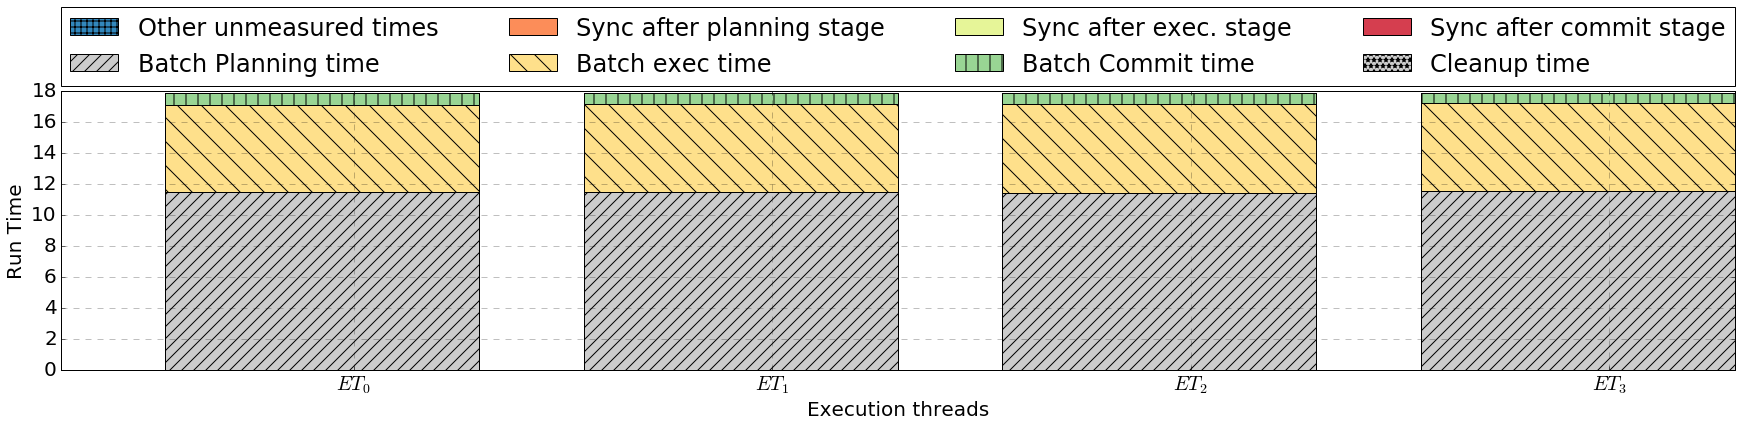

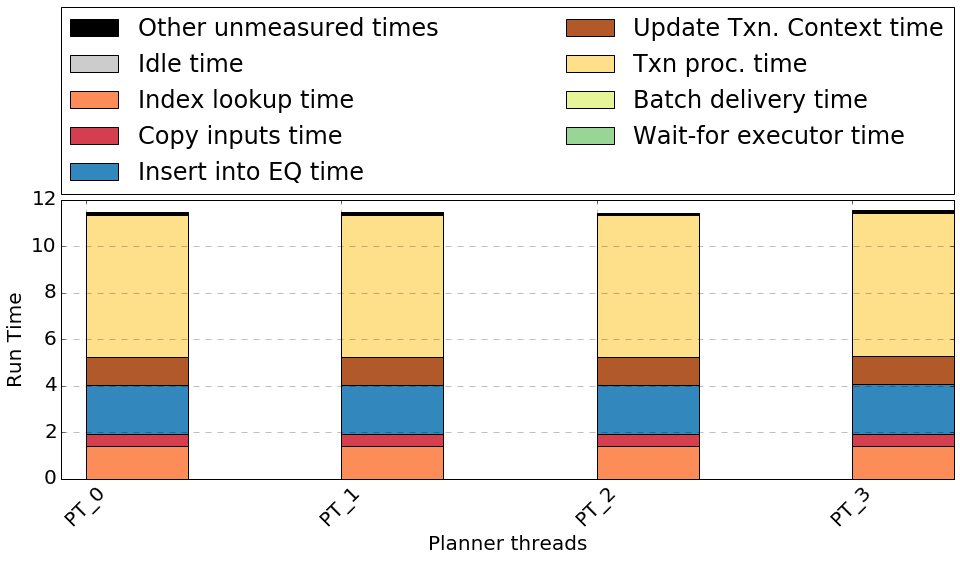

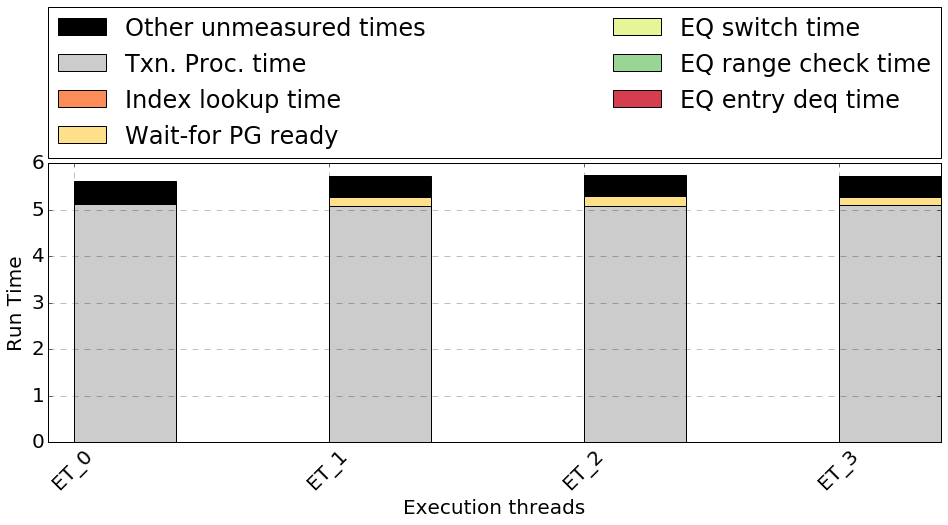

In [48]:
directory = '/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results'

datafile = directory+'/dbx1000_quecc_test.txt'
datafile = directory+'/dbx1000_quecc_test_tpcc.txt'
# datafile = directory+'/dbx1000_quecc_test_tpcc2.txt'
datafile = directory+'/dbx1000_quecc_test_tpcc3.txt'
datafile = directory+'/dbx1000_quecc_test_tpcc_wh32_ct32.txt'
datafile = directory+'/dbx1000_quecc_test_tpcc_wh32_ct32_1.txt'

# datafile = directory+'/dbx1000_quecc_test_ycsb_theta0.txt'
# datafile = directory+'/dbx1000_quecc_test_ycsb_theta0_1.txt'
# datafile = directory+'/dbx1000_quecc_test_ycsb_theta0_2.txt'
# datafile = directory+'/dbx1000_quecc_test_ycsb_thetapt3.txt'
# datafile = directory+'/dbx1000_quecc_test_ycsb_thetapt3_1.txt'
# datafile = directory+'/dbx1000_quecc_test_ycsb_thetapt99.txt'
# datafile = directory+'/dbx1000_quecc_test_ycsb_thetapt99_1.txt'
# datafile = directory+'/dbx1000_quecc_test_ycsb_thetapt99_2.txt'
# datafile = directory+'/dbx1000_quecc_test_ycsb_opt1_theta0.txt'
# datafile = directory+'/dbx1000_quecc_test_ycsb_opt1_theta0_1.txt'
# datafile = directory+'/dbx1000_quecc_test_ycsb_opt1_thetapt99.txt'
# datafile = directory+'/dbx1000_quecc_test_ycsb_opt16_theta50.txt'
datafile = directory+'/dbx1000_quecc_test_ycsb_opt16_theta0_wp0.txt'
# datafile = directory+'/dbx1000_quecc_test_ycsb_opt16_theta99_wp0.txt'

# datafile = directory+'/dbx1000_quecc_test_tpcc_wh32_ct32_roplan.txt'
# datafile = directory+'/dbx1000_quecc_test_tpcc_wh16.txt'

# datafile = directory+'/exp_data_quecc_timeb'

datafile = directory+'/time_profile_4wt_b1K.txt'
datafile = directory+'/time_profile_4wt_b10K.txt'
# datafile = directory+'/time_profile_4wt_b40K_2.txt'

e_data = view_exec_from_file(datafile)
df = pd.DataFrame(e_data)
plot_exec_times_hl_unpip(df)
plot_planner_times(df)
plot_executor_times(df)
# print(df.keys())
# df[['wt_hl_plan_time','plan_batch_process_time',
#     'plan_idle_time','plan_queue_dequeue_time','plan_txn_process_time','plan_batch_delivery_time',
#     'plan_index_lookup_time']]
# df[['wt_pg_sync_exec_time']]

# df['total_sync_time'] = df['wt_hl_sync_commit_time'] + df['wt_hl_sync_plan_time'] + df['wt_hl_sync_exec_time']
# df['wt_pg_sync_exec_time'].describe()
# df['wt_hl_sync_plan_time'].mean()/df['exec_batch_cnt'].mean()
# df['wt_hl_sync_exec_time'].mean()/df['exec_batch_cnt'].mean()
# df['wt_hl_sync_commit_time'].mean()/df['exec_batch_cnt'].mean()
# df['wt_hl_sync_exec_time'].describe()
# df['wt_hl_sync_commit_time'].describe()
# df['plan_batch_delivery_time']
# df['plan_mem_alloc_time']
df

In [176]:
data_dir_path = directory + '/exp_data_test2'
data_dir_path = directory + '/exp_data_quecc'
data_dir_path = directory + '/exp_data_quecc2'
parsed = parse_directory_cicada(data_dir_path)
# parsed
df = pd.DataFrame(parsed)
gdf = df.groupby(['cc_alg','zipf_theta'])['tput'].mean()
gdf
df

,batch_size,cc_alg,rec_size,req_cnt,run_time,seq_no,tput,vm,worker_cnt,workload,write_perc,zipf_theta
0,10368,QUECC,100,10,20.802879,0,2.990355,32,32,YCSB,0.5,0.00
1,10368,QUECC,100,10,20.977203,0,2.965505,32,32,YCSB,0.5,0.30
2,10368,QUECC,100,10,23.839896,1,2.609407,32,32,YCSB,0.5,0.00
3,10368,QUECC,100,10,23.366057,1,2.662323,32,32,YCSB,0.5,0.30
4,10368,QUECC,100,10,20.976634,1,2.965585,32,32,YCSB,0.5,0.99


In [1225]:
#2-Cl nodes, 4-S nodes t2.2xlarge
exp_data = {'cc_alg':['QUECC','QUECC','CALVIN','CALVIN','NOWAIT','NOWAIT'],
           'tput':[360,409,(227+211),(56.4+204.6),201,195],
           'trial_no':[1,2,1,2,1,2]}

#2-Cl nodes, 4-S nodes c5.2xlarge
exp_data = {'cc_alg':['QUECC','CALVIN','NOWAIT'],
           'tput':[0,(13888.233308+14040.333310),0],
           'trial_no':[1,1,1]}

#4-Cl nodes, 4-S nodes c5.2xlarge (used a small number of transaction instances)
exp_data = {'cc_alg':['NOWAIT','NOWAIT','CALVIN','CALVIN','QUECC','QUECC'],
            'tput':[(96597.865887+92754.516701+97359.533187+94267.532966)/1000,
                    (97248.549164+92720.883188+96842.267014+95748.149615)/1000,
                    (41342.983251+40623.449819+41661.749899+42479.367785)/1000,
                    (42703.566588+41484.316446+43756.766637+40353.466708)/1000,
                    (84586.816286+78625.699683+83157.967782+81849.583136)/1000,
                    (83063.966369+81347.199847+84620.533350+81086.216375)/1000],
           'trial_no':[1,2,1,2,1,2]}

#2-Cl nodes, 2-S nodes m5.2xlarge, MPR=0.5
# title="2 Servers, 2 Clients, MPR=5.0"
# exp_data = {'cc_alg':['QUECC','CALVIN','NOWAIT'],
#            'tput':[(82771.199775+82666.599707)/1000,
#                    (35891.799949+22780.733265)/1000,
#                    (29846.933265+18903.266626)/1000],
#             'mpr':[0.5,0.5,0.5],
#             'zipf_theta':[0.0,0.0,0.0],
#             'trial_no':[1,1,1]}

#2-Cl nodes, 2-S nodes c5.2xlarge, 
# MPR=1.0, 16M records per node
# title="2 Servers, 2 Clients, MPR=1.0"
# exp_data = {'cc_alg':['QUECC','CALVIN','NOWAIT'],
#            'tput':[(80252.716573+81175.333185)/1000,
#                    (31881.849945+17551.949975)/1000,
#                    (13762.649984+10669.866646)/1000],
#             'mpr':[1.0,1.0,1.0],
#             'zipf_theta':[0.0,0.0,0.0],
#             'trial_no':[1,1,1]}

# MPR=0.0, 16M records per node
# title="2 Servers, 2 Clients, MPR=0.0"
# exp_data = {'cc_alg':['QUECC','CALVIN','NOWAIT'],
#            'tput':[(84067.199885+84067.199902)/1000,
#                    (65539.117946+33478.916598)/1000,
#                    (120949.516653+61544.942279)/1000],
#             'mpr':[0.0,0.0,0.0],
#             'zipf_theta':[0.0,0.0,0.0],
#             'trial_no':[1,1,1]}

# MPR=0.0, 16M records per node
title="4 Servers, 4 Clients, MPR=0.0, Theta=0.0"
exp_data = {'cc_alg':['QUECC','CALVIN','NOWAIT'],
           'tput':[(79886.599915+79888.016512+79932.916597+79886.749675)/1000,
                   (63702.933271+62983.549895+64486.866612+60894.699894)/1000,
                   (118663.199743+118668.433213+119278.366309+114711.416261)/1000],
            'mpr':[0.0,0.0,0.0],
            'zipf_theta':[0.0,0.0,0.0],
            'trial_no':[1,1,1]}

# MPR=1.0, 16M records per node
title="4 Servers, 4 Clients, MPR=1.0, Theta=0.0"
exp_data = {'cc_alg':['QUECC','CALVIN','NOWAIT'],
           'tput':[(109542.884332+109550.550484+109533.583310+109532.449744)/1000,
                   (11550.366633+7064.049981+7994.666640+9288.266645)/1000,
                   (5561.499986+9193.499956+9011.299982+8919.549975)/1000],
            'mpr':[1.0,1.0,1.0],
            'zipf_theta':[0.0,0.0,0.0],
            'trial_no':[1,1,1]}

# MPR=1.0, 16M records per node
title="4 Servers, 4 Clients, MPR=1.0, Theta=0.6"
exp_data = {'cc_alg':['QUECC','CALVIN','NOWAIT'],
           'tput':[(86356.799822+86356.799860+86356.799845+86356.799814)/1000,
                   (11315.799976+6970.366660+8970.583322+10562.149976)/1000,
                   (5526.533317+8659.783298+7846.849992+7715.516639)/1000],
            'mpr':[1.0,1.0,1.0],
            'zipf_theta':[0.6,0.6,0.6],
            'trial_no':[1,1,1]}


# MPR=1.0, 16M records per node
title="4 Servers, 4 Clients, MPR=1.0, Theta=0.9"
exp_data = {'cc_alg':['QUECC','CALVIN','NOWAIT'],
           'tput':[(77716.799922+77716.799887+77706.233284+77716.799852)/1000,
                   (10359.949978+6695.516653+8402.733340+9779.516636)/1000,
                   (2428.899993+4231.849988+2906.116659+2486.899992)/1000],
            'mpr':[1.0,1.0,1.0],
            'zipf_theta':[0.9,0.9,0.9],
            'trial_no':[1,1,1]}

title="TPC-C Workload:\n 4 Servers, 4 Clients, MPR=0.15, 100% Payment"
exp_data = {'cc_alg':['QUECC-10K','CALVIN','NOWAIT','QUECC-80K','QUECC-160K'],
           'tput':[(45840.933258+45833.433208+45845.866606+45843.916569)/1000,
                   (84074.383154+83407.583210+85074.966380+85103.916477)/1000,
                   ((17.283333+13.500000+13.800000+12.716667)+(11.566667+14.866667+15.850000+13.250000))/2000,
                   (191936.666219+191939.932953+191932.182978+191938.249904)/1000,
                   (172643.549727+172610.132816+172616.832709+172584.166445)/1000],
            'mpr':[0.15,0.15,0.15,0.15,0.15],
            'trial_no':[1,1,1,1,1]}
#                    (81761.949514+81829.049741+81770.249786+81886.333168)/1000,

# title="TPC-C Workload: 4 Servers, 4 Clients, MPR=0.0, 100% Payment"
# exp_data = {'cc_alg':['QUECC-10K','CALVIN','NOWAIT','QUECC-80K','QUECC-160K'],
#            'tput':[(84412.799762+84412.799719+84443.933164+84369.599833)/1000,
#                    (134634.849917+132916.482959+137590.532370+130726.616590)/1000,
#                    (182184.383397+204130.132721+185815.686176+191186.566450)/1000,
#                    (192560.933381+192593.300876+192582.799249+192596.882691)/1000,
#                    (176429.416026+176417.383036+176430.499974+176413.599618)/1000],
#             'mpr':[0.0,0.0,0.0,0.0,0.0],
#             'trial_no':[1,1,1,1,1]}

# title="TPC-C Workload: 4 Servers, 4 Clients, MPR=0.0, 100% Payment"
# exp_data = {'cc_alg':['QUECC-10K','CALVIN','NOWAIT','QUECC-80K','QUECC-160K'],
#            'tput':[(84412.799762+84412.799719+84443.933164+84369.599833)/1000,
#                    (134634.849917+132916.482959+137590.532370+130726.616590)/1000,
#                    (182184.383397+204130.132721+185815.686176+191186.566450)/1000,
#                    (192560.933381+192593.300876+192582.799249+192596.882691)/1000,
#                    (176429.416026+176417.383036+176430.499974+176413.599618)/1000],
#             'mpr':[0.0,0.0,0.0,0.0,0.0],
#             'trial_no':[1,1,1,1,1]}

# title="TPC-C Workload: (Insert Disabled)\n 2 Servers, 2 Clients, MPR=0.0, 100% NewOrder"
# exp_data = {'cc_alg':['QUECC-10K','CALVIN','NOWAIT','QUECC-80K','QUECC-160K'],
#            'tput':[(128216.214513+128213.816325)/1000,
#                    (8148.266668+7769.549979)/1000,
#                    (24650.833265+28900.650527)/1000,
#                    (130920.016603+130966.649677)/1000,
#                    (126335.999501+126335.999808)/1000],
#             'mpr':[0.0,0.0,0.0,0.0,0.0],
#             'trial_no':[1,1,1,1,1]}

# title="TPC-C Workload: (Insert Disabled)\n 2 Servers, 2 Clients, MPR=0.15, 100% NewOrder"
# exp_data = {'cc_alg':['QUECC-10K','CALVIN','NOWAIT','QUECC-80K','QUECC-160K'],
#            'tput':[(0+0)/1000,
#                    (0+0)/1000,
#                    (6284.416650+6094.950007)/1000,
#                    (0+0)/1000,
#                    (0+0)/1000],
#             'mpr':[0.15,0.15,0.15,0.15,0.15],
#             'trial_no':[1,1,1,1,1]}

#2-Cl nodes, 2-S nodes c5.2xlarge, MPR=1.0
# exp_data = {'cc_alg':['QUECC','CALVIN','NOWAIT'],
#            'tput':[(0+0)/1000,
#                    (0+0)/1000,
#                   (0+0)/1000],
#            'trial_no':[1,1,1]}

qcd_df = pd.DataFrame(exp_data)
g_qcd_df = qcd_df.groupby(['cc_alg']).agg({'tput':'mean'})
list(g_qcd_df.index)
# g_qcd_df
# qcd_df


['CALVIN', 'NOWAIT', 'QUECC-10K', 'QUECC-160K', 'QUECC-80K']

CALVIN
NOWAIT
QUECC-10K
QUECC-160K
QUECC-80K


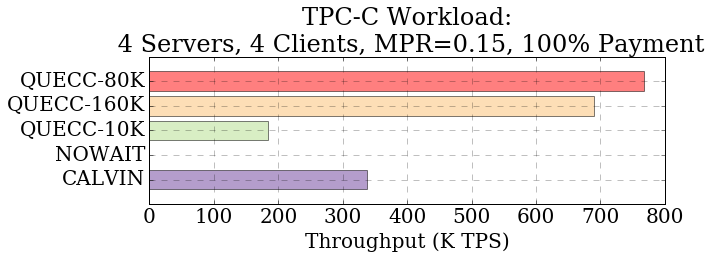

In [1226]:


grouped_f = g_qcd_df

plt.figure(figsize=(10,4))
plt.grid(True)

algs = list(grouped_f.index)
pc =0
# print(algs)
# print(ztheta)
doplot = True
line_labels = []
line_yvals = []
line_ayvals = []
line_xvals = []
line_theta = []
ptr = 100
bcolor = []

plot_abort = False
for a in algs:
    ll = a
    print(ll)
#         print(t)
    line_labels.append(fix_lgd_label(ll))
    bcolor.append(ls_dict[ll]['color'])
    line_yvals.append(grouped_f.loc[a]['tput'])
    if plot_abort:
        line_ayvals.append(grouped_f.loc[a]['abort_perc'])

ax = plt.subplot(111)
if plot_abort:
    bvals = list(grouped_f['abort_perc']*100)
    _xlabel = 'Abort Percentage'
else:
    bvals = list(grouped_f['tput'])
    _xlabel = 'Throughput (K TPS)'

y_pos = np.arange(len(algs))    
ax.barh(y_pos, bvals, align='center', alpha=0.5, color=bcolor)
plt.yticks(y_pos,line_labels)

plt.xlabel(_xlabel)
# plt.title("2 Servers, 2 Clients, MPR=0.5")
plt.title(title)
plt.grid(True)
plt.tight_layout()   
# plt.savefig(outfname,format='pdf', bbox_inches='tight')

In [88]:
g_thread_cnt = 4
g_node_cnt = 2
g_wt_cnt = g_thread_cnt*g_node_cnt
g_num_wh = 8

for i in range(g_node_cnt):
    wh_per_part = g_num_wh/g_node_cnt
    print("home_part={},start_wh={},end_wh={}".format(i,wh_per_part*i+1,(wh_per_part*i+wh_per_part)))

for i in range(g_wt_cnt):
    print('i={},i_node={}'.format(i,int(i/g_thread_cnt)))

    
for i in range(g_node_cnt):
    for j in range(g_thread_cnt):
        print('N_{},PT_{},CWPID={}'.format(i,j,(j + (i*g_thread_cnt))))
a=int(1/2)
a

home_part=0,start_wh=1.0,end_wh=4.0
home_part=1,start_wh=5.0,end_wh=8.0
i=0,i_node=0
i=1,i_node=0
i=2,i_node=0
i=3,i_node=0
i=4,i_node=1
i=5,i_node=1
i=6,i_node=1
i=7,i_node=1
N_0,PT_0,CWPID=0
N_0,PT_1,CWPID=1
N_0,PT_2,CWPID=2
N_0,PT_3,CWPID=3
N_1,PT_0,CWPID=4
N_1,PT_1,CWPID=5
N_1,PT_2,CWPID=6
N_1,PT_3,CWPID=7


0